In [46]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy 
from scipy.spatial import distance
import icecube.wavereform
import csv
from ast import literal_eval
mpl.rcParams['font.size'] = 20

/tmp/ipykernel_5355/2359364841.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10,10))


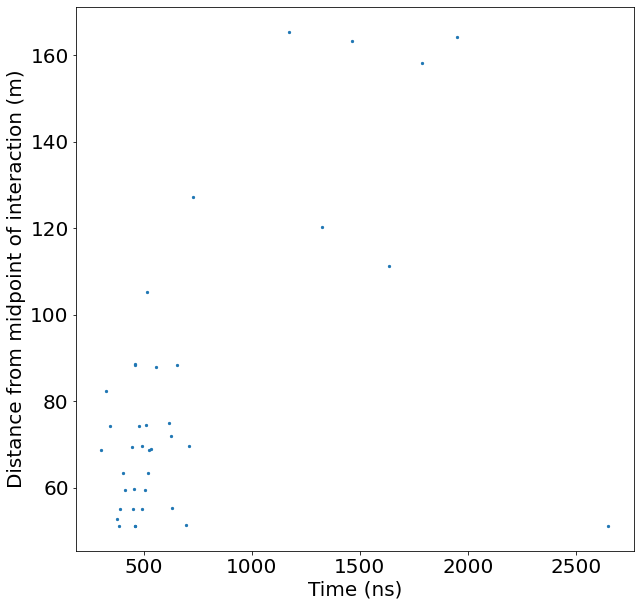

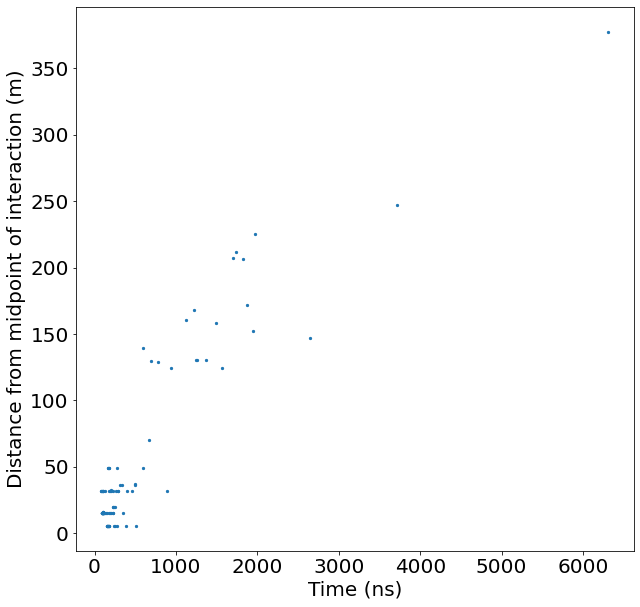

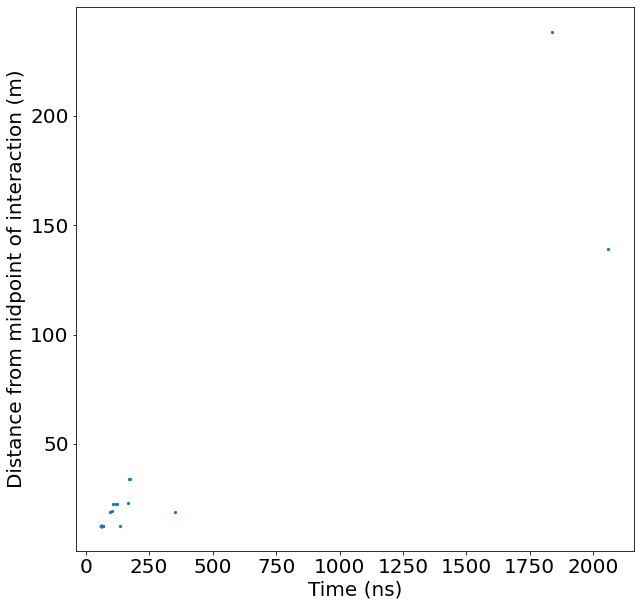

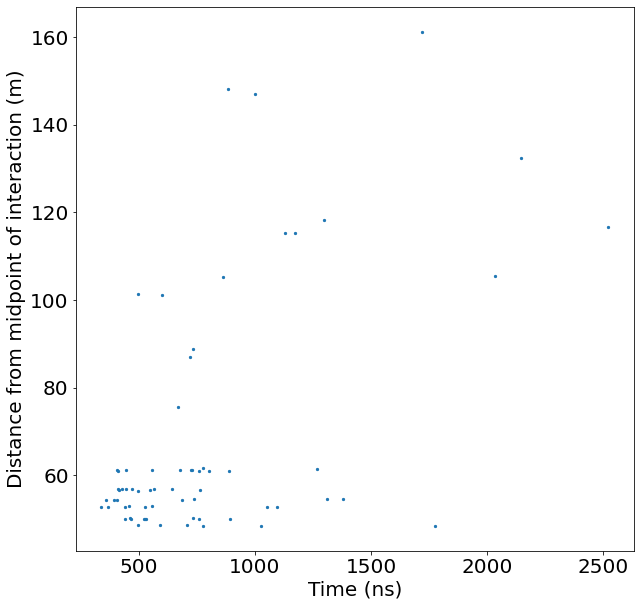

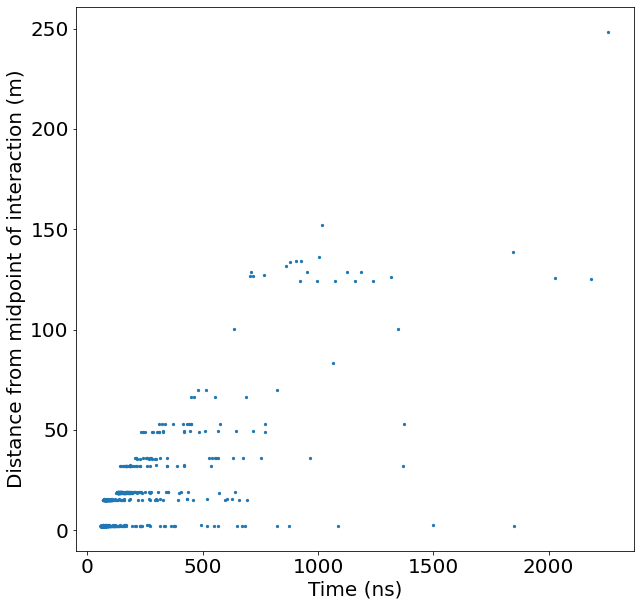

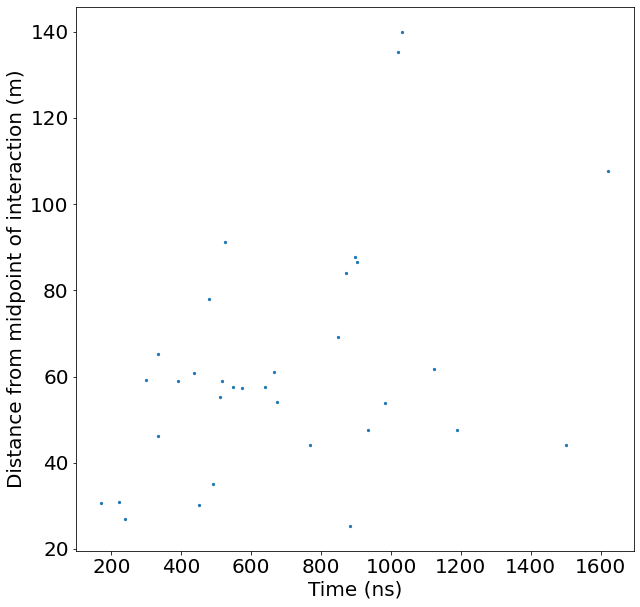

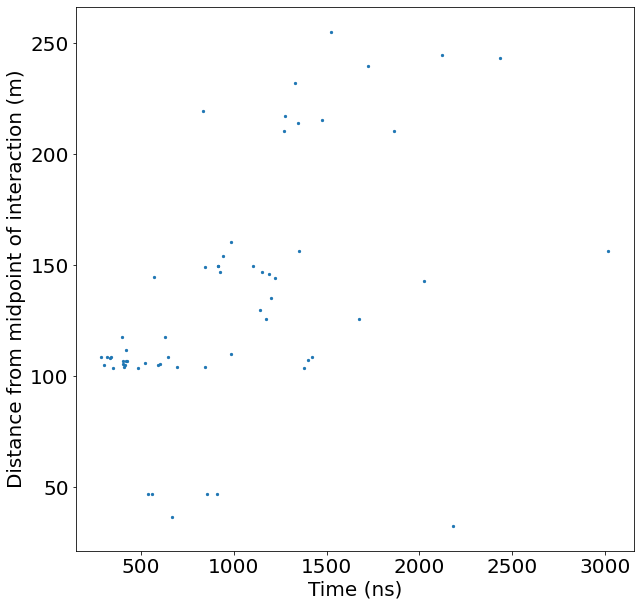

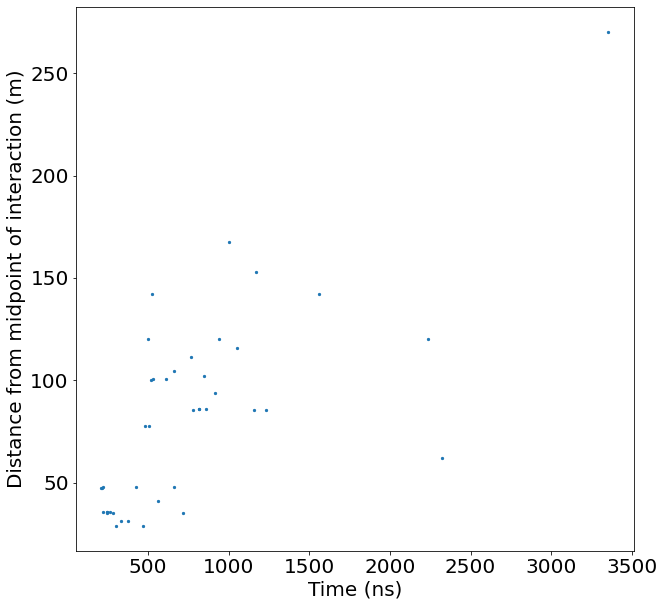

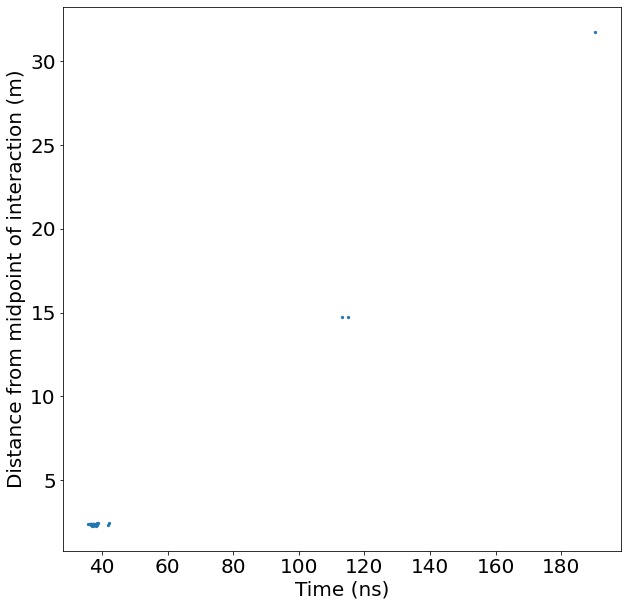

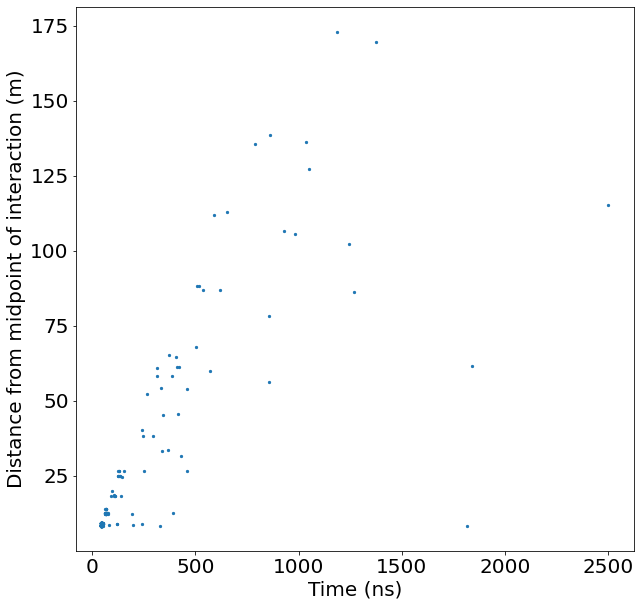

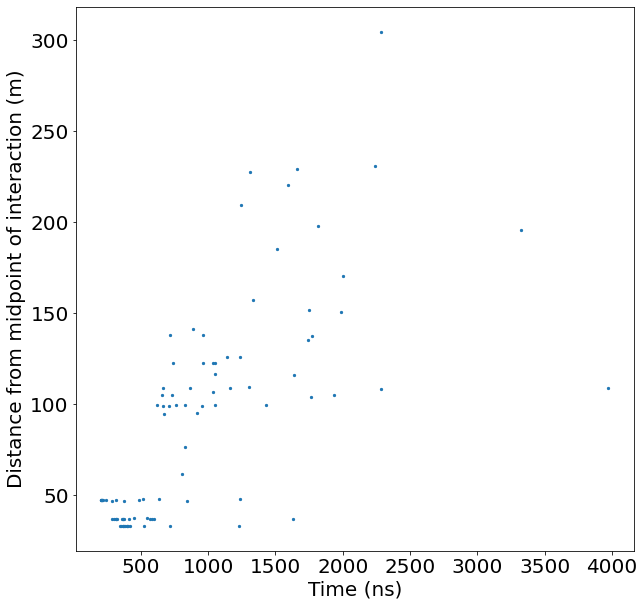

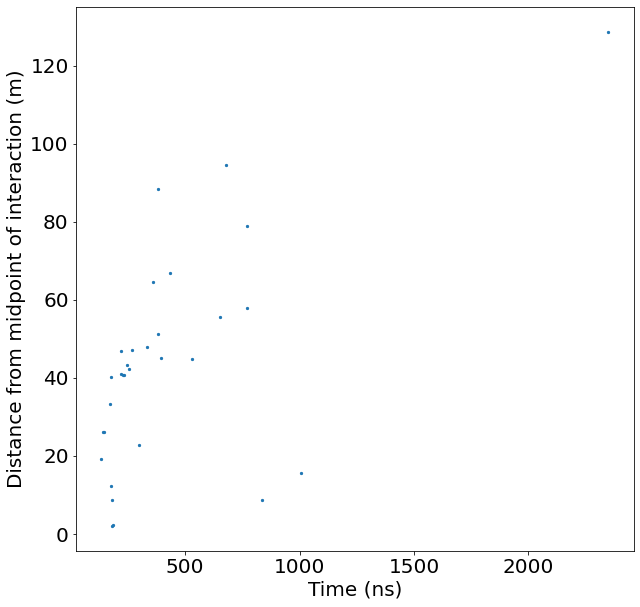

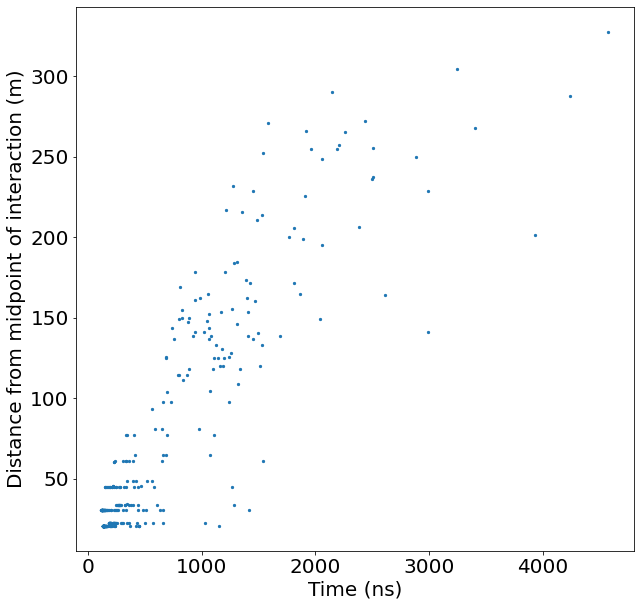

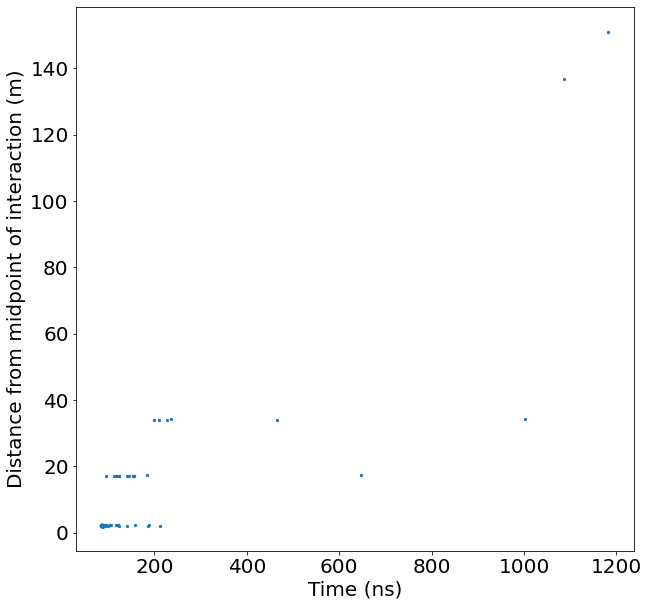

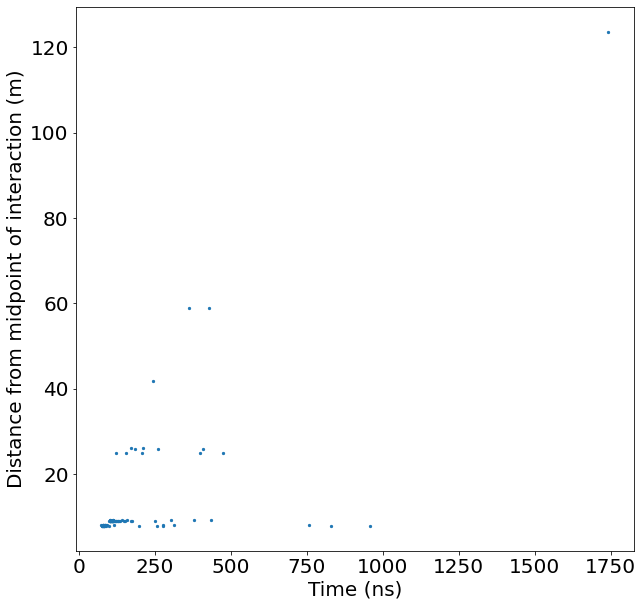

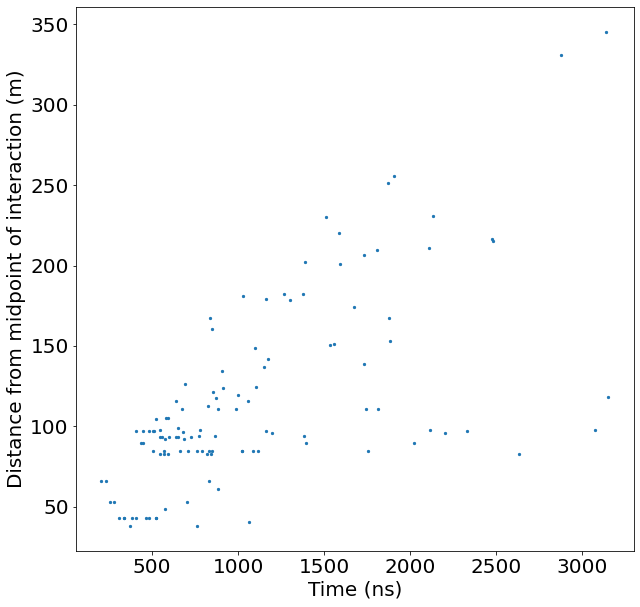

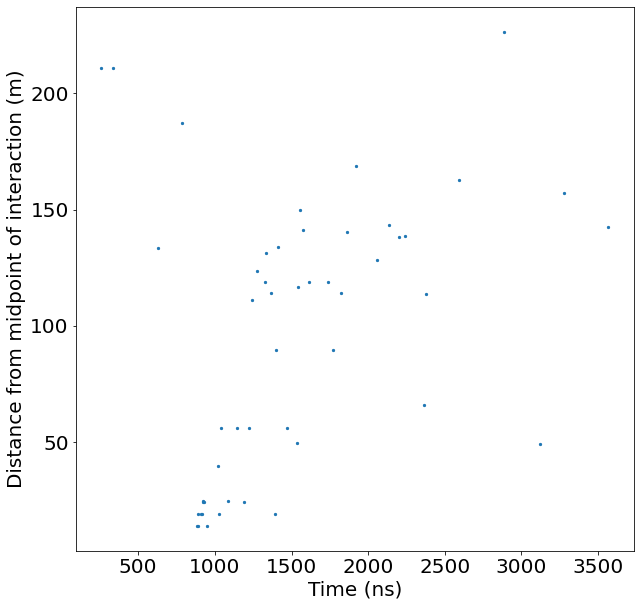

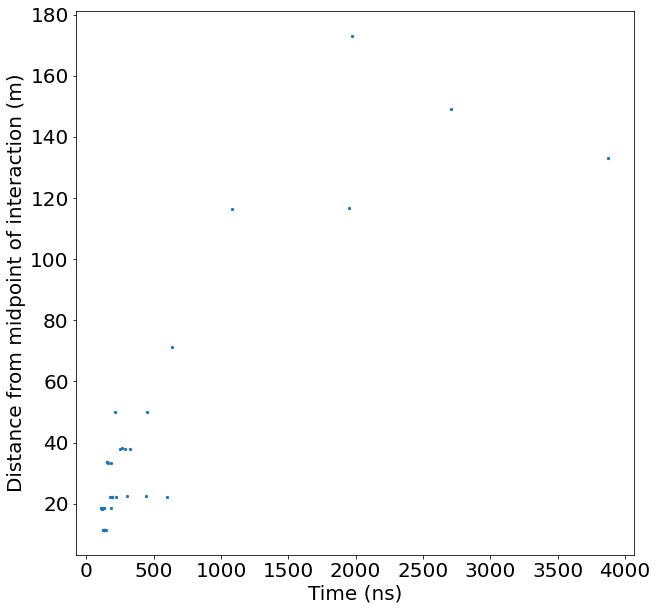

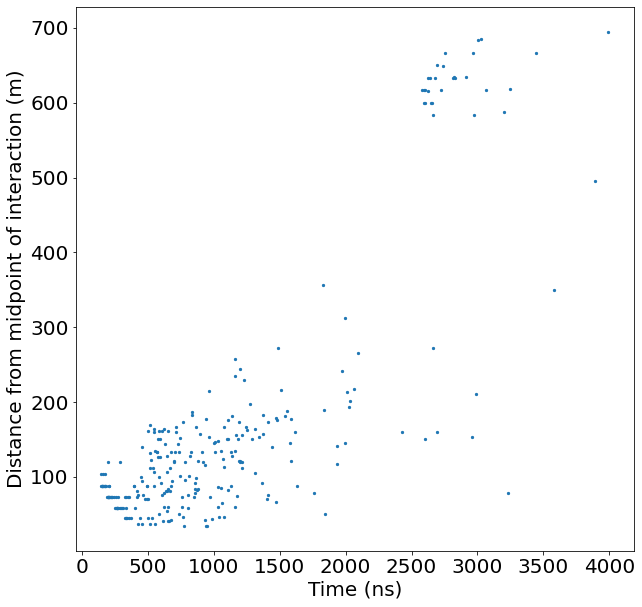

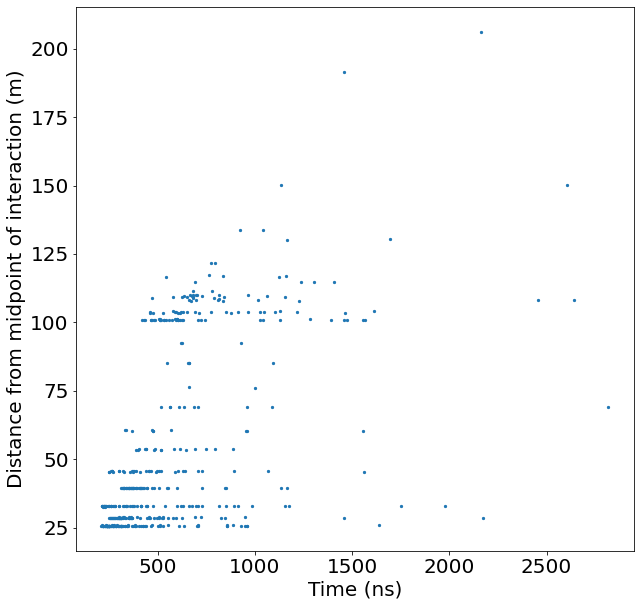

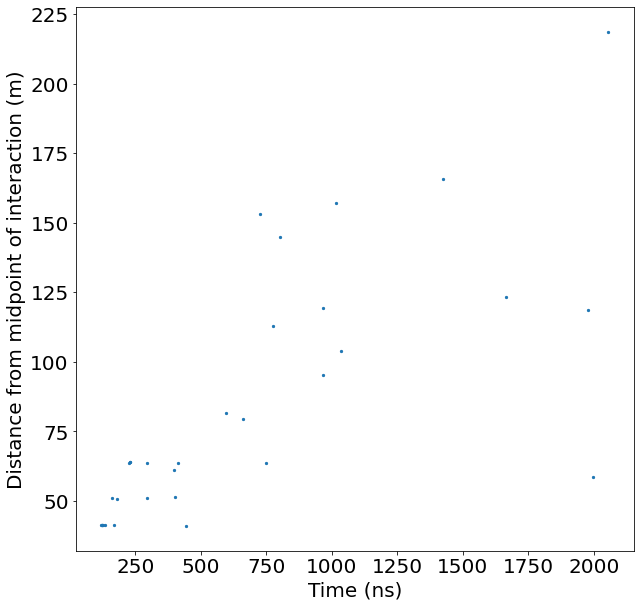

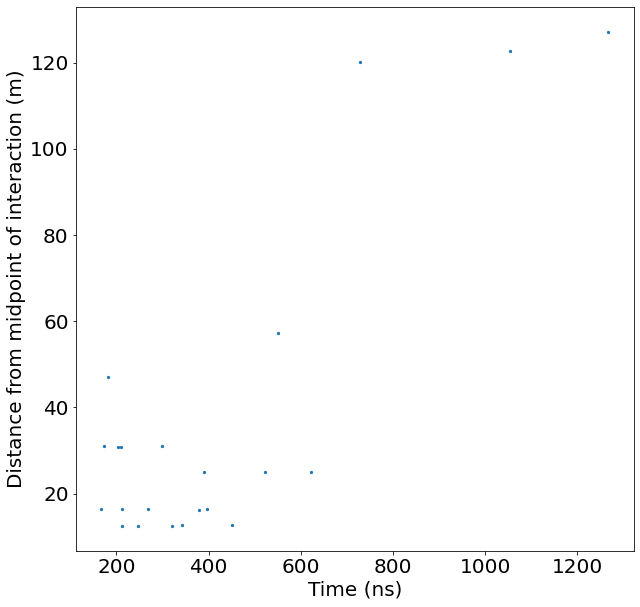

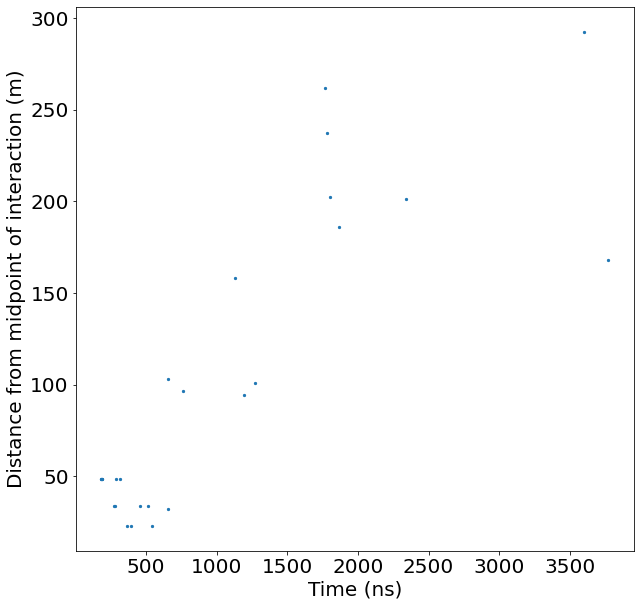

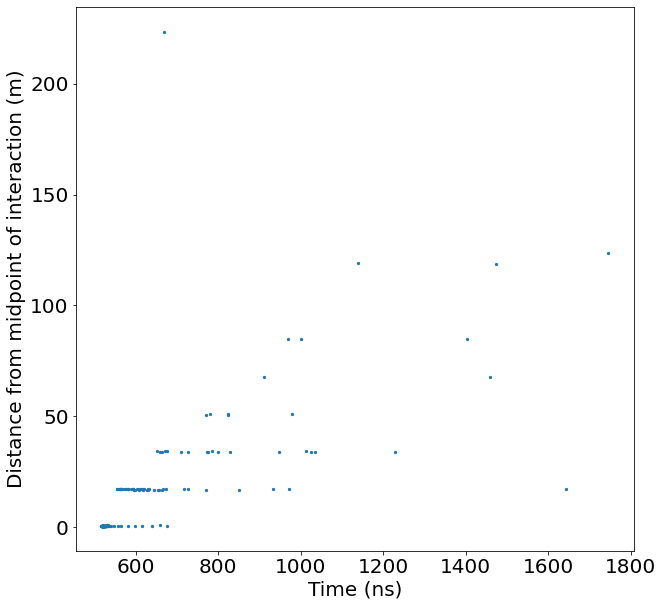

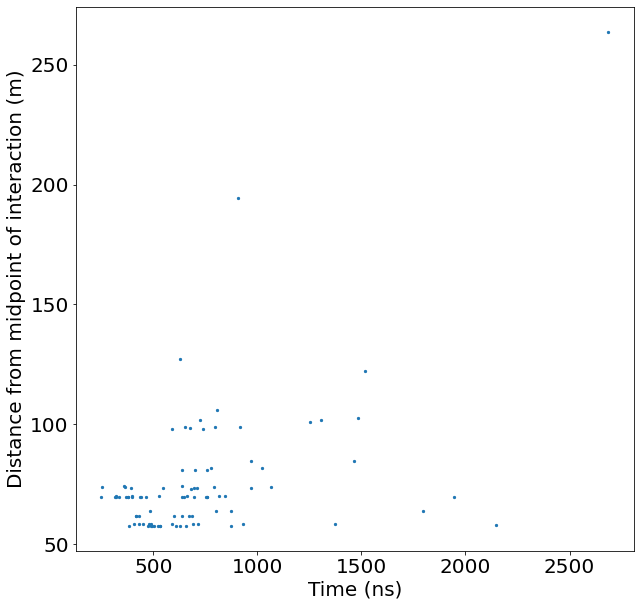

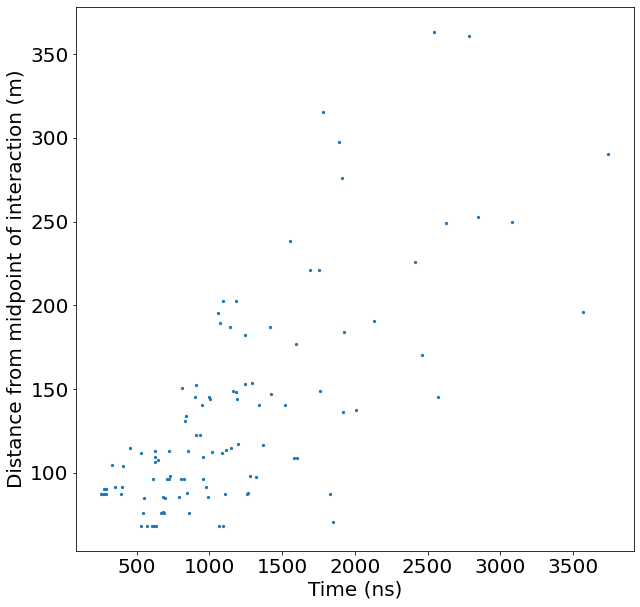

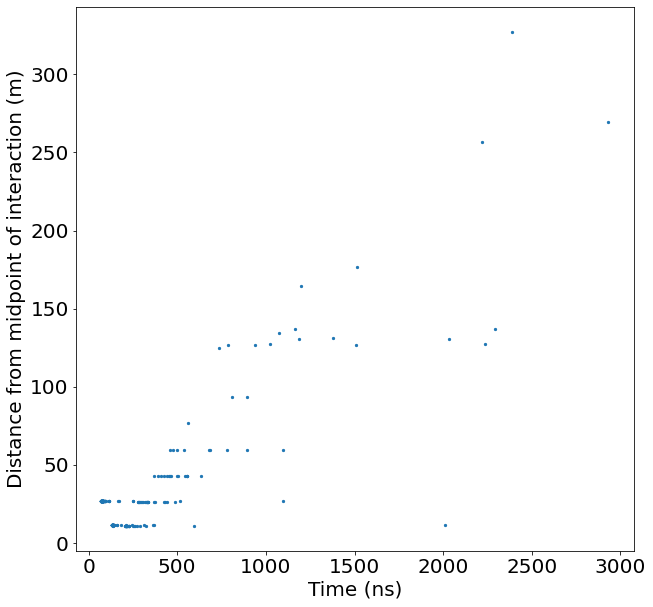

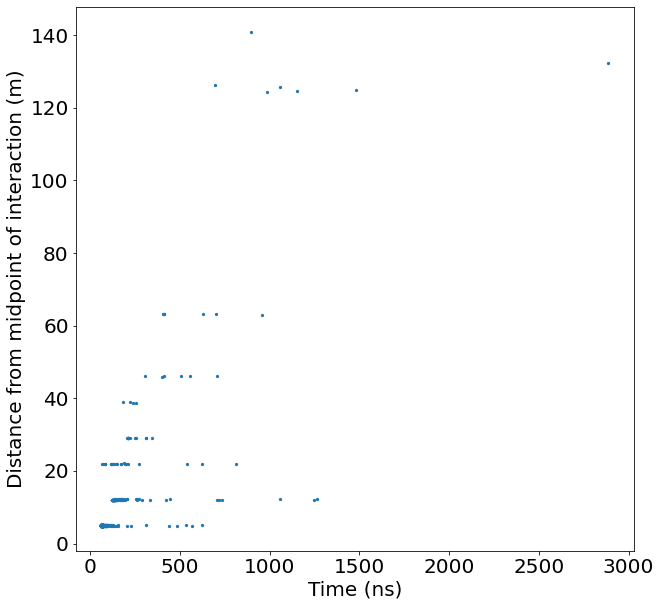

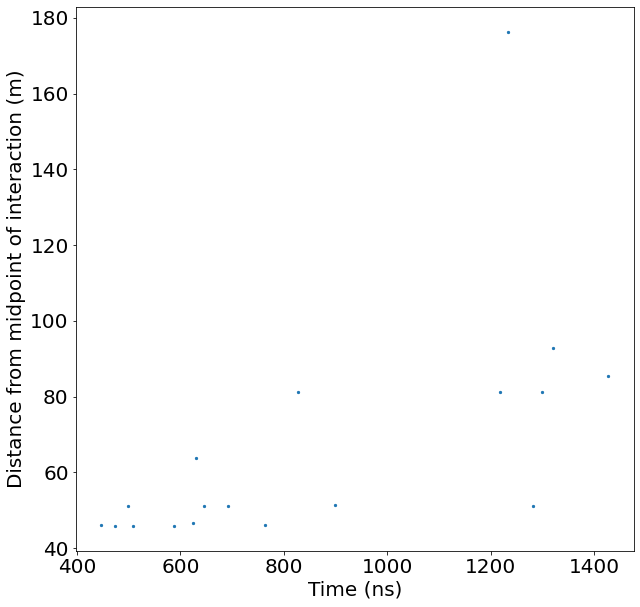

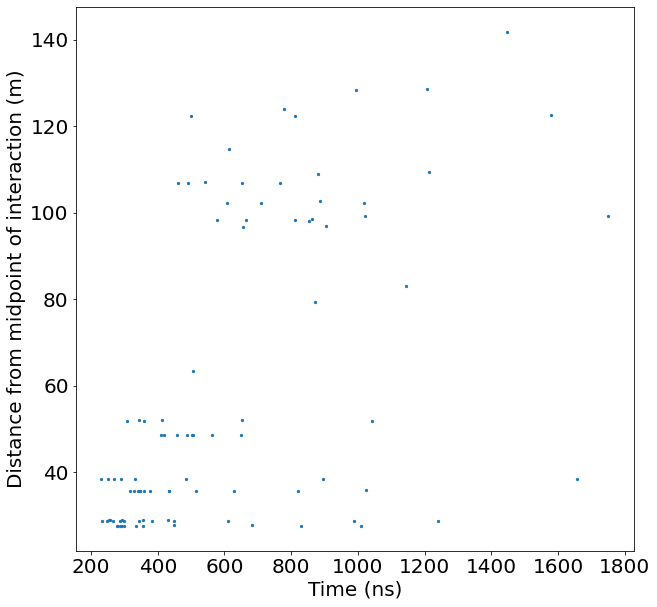

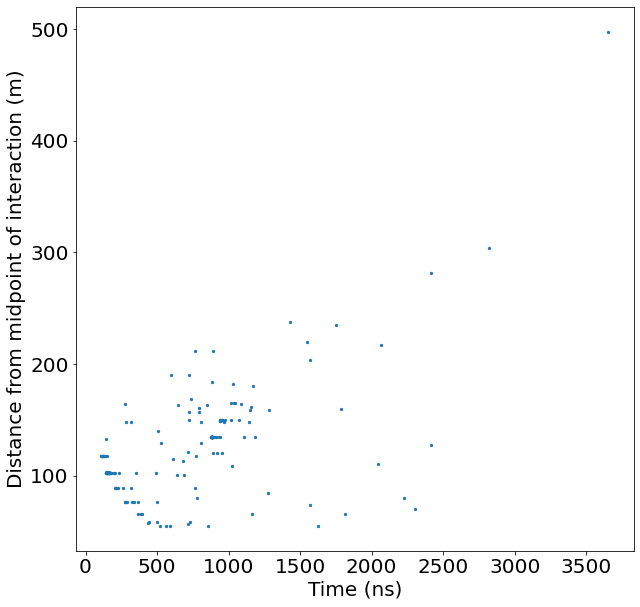

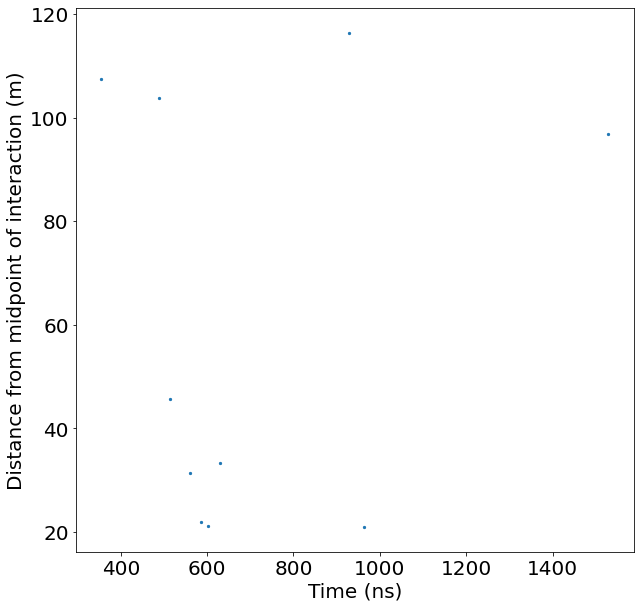

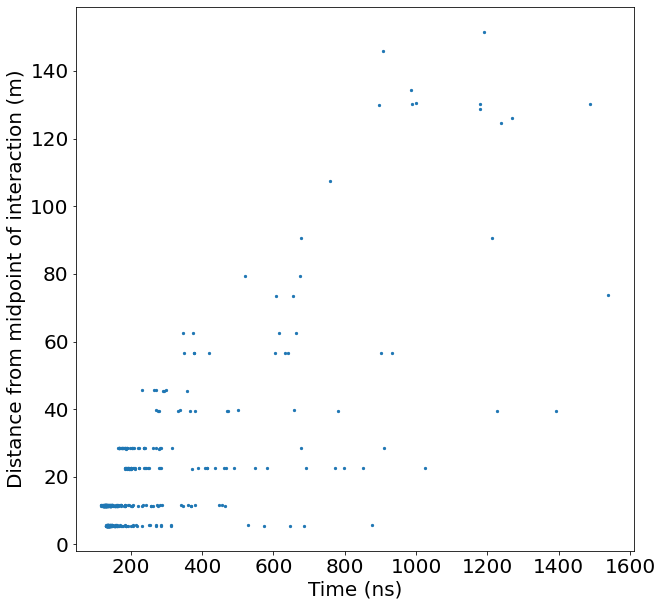

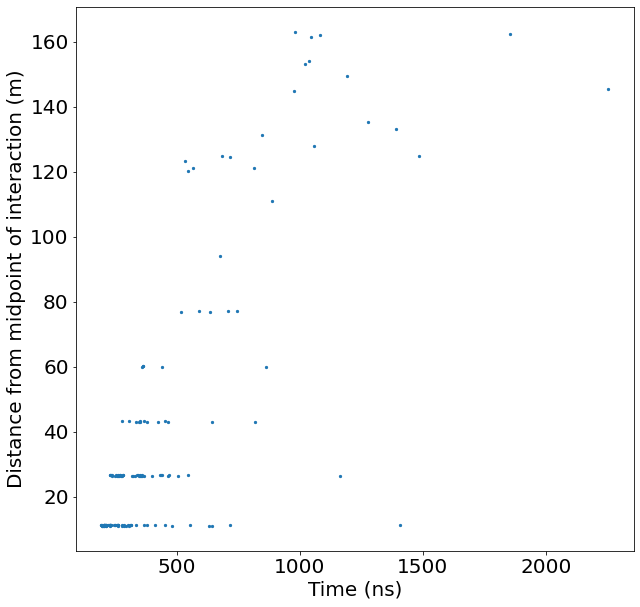

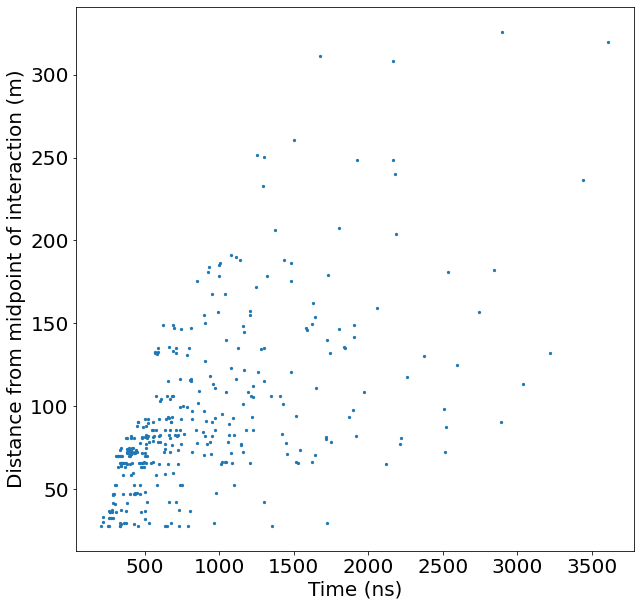

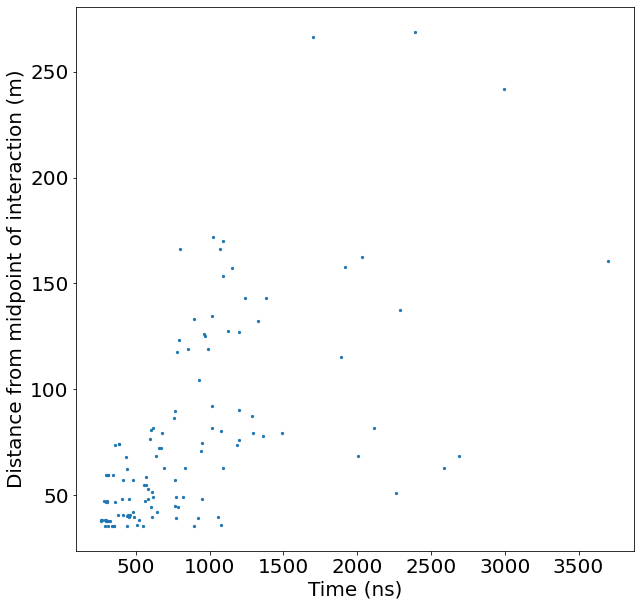

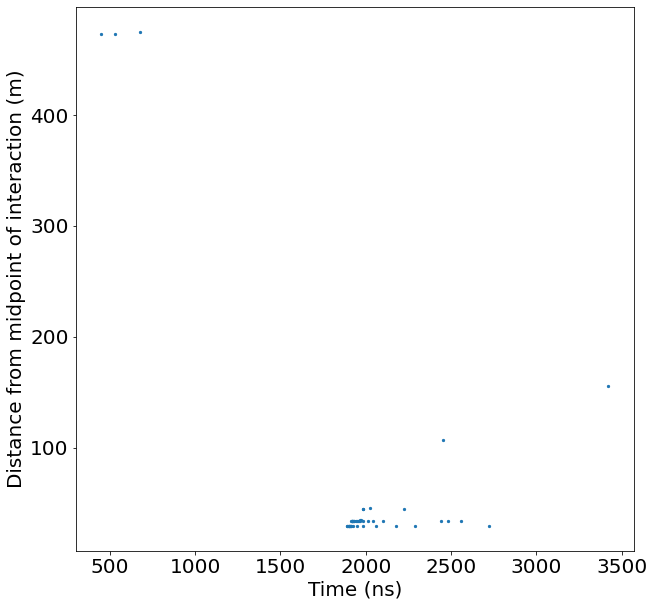

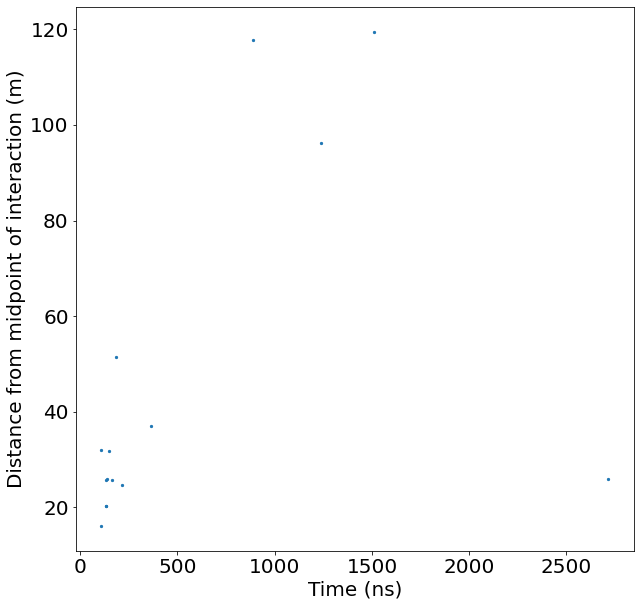

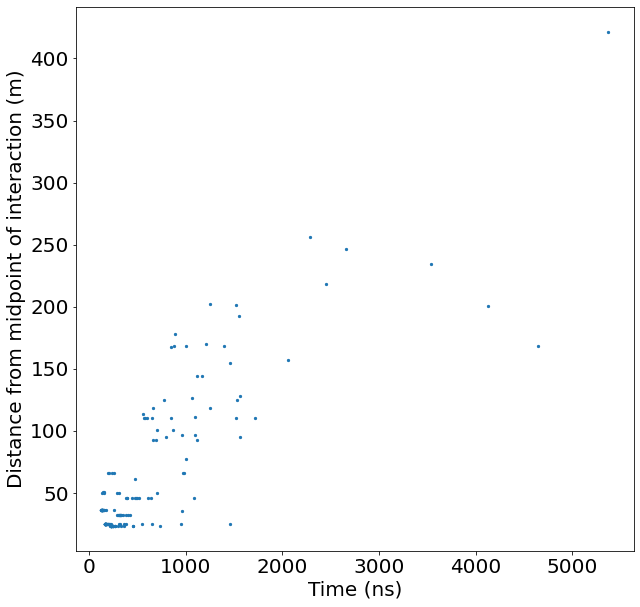

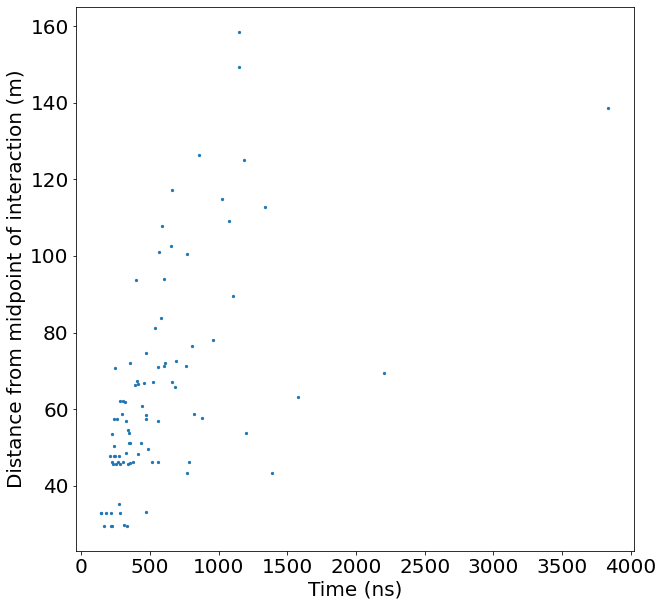

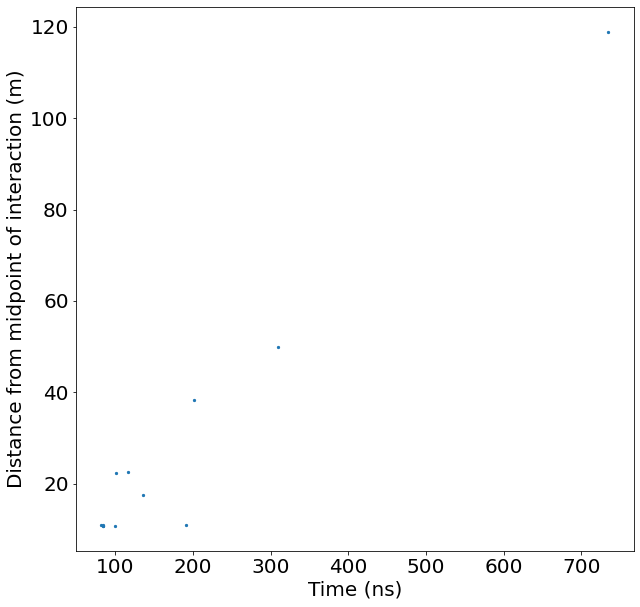

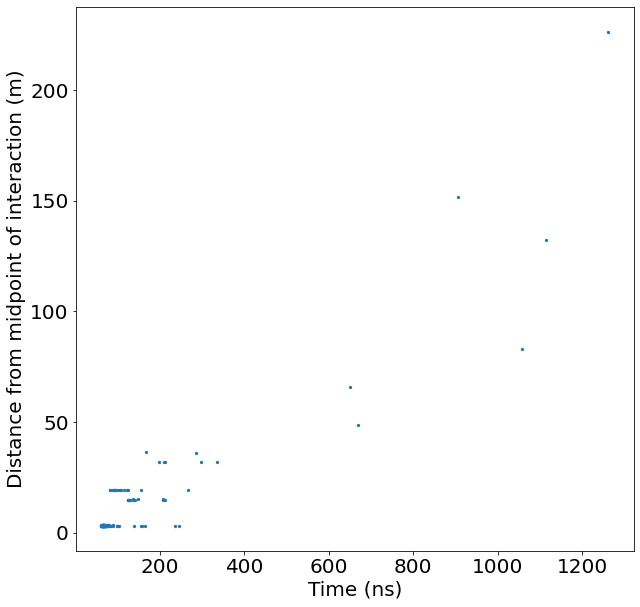

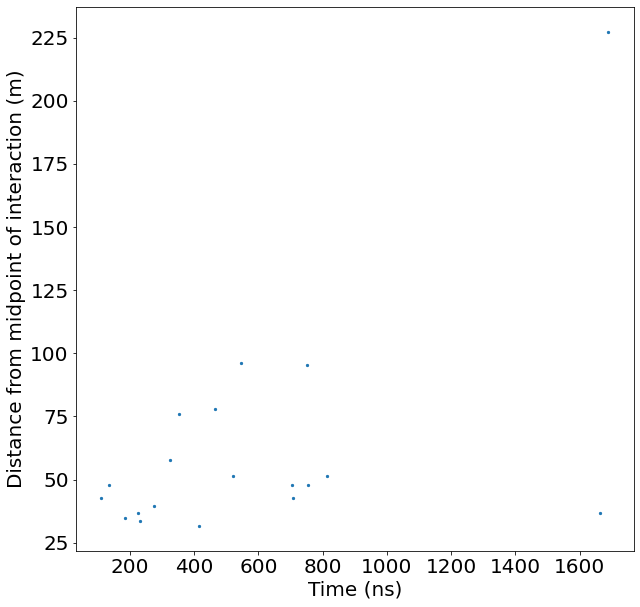

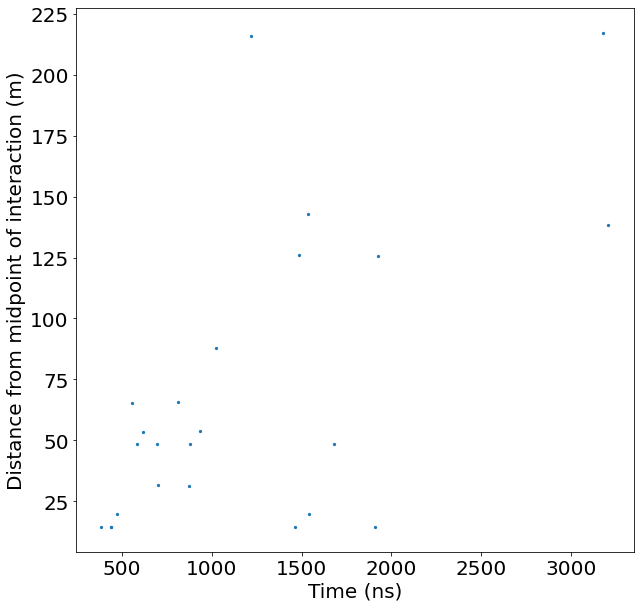

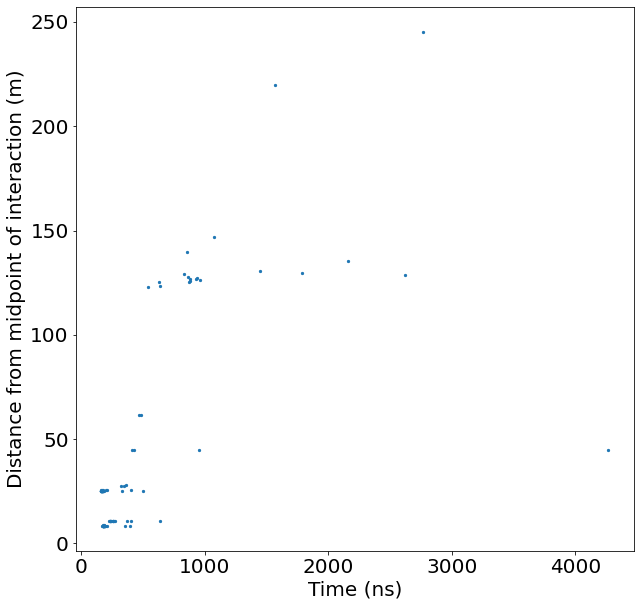

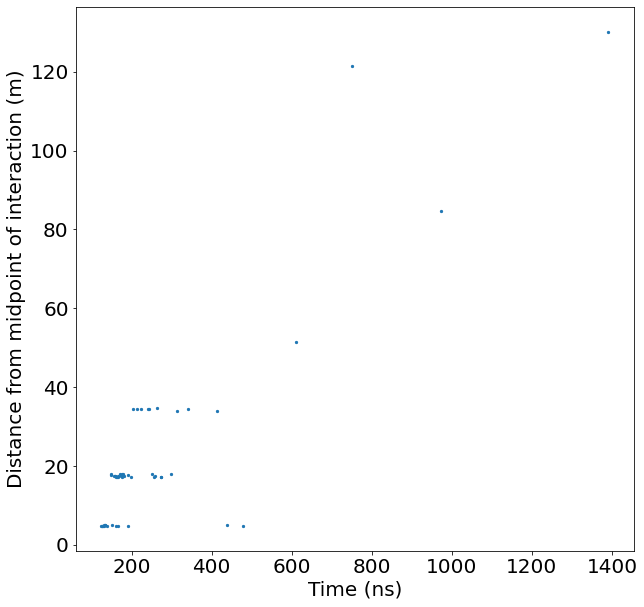

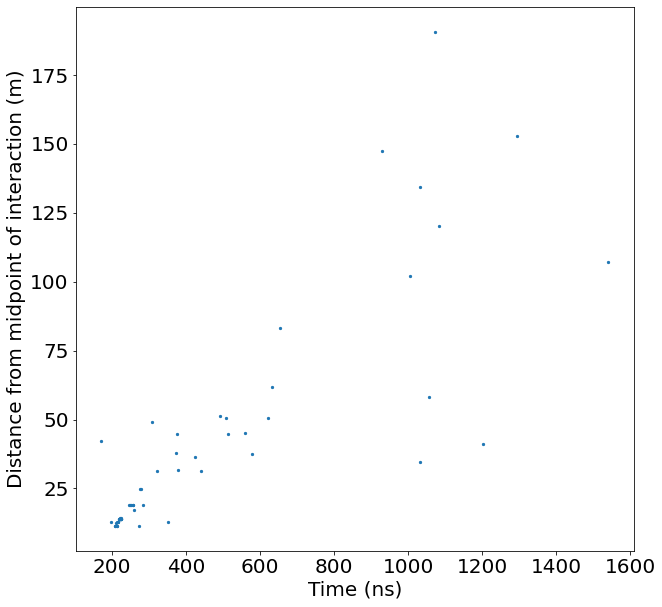

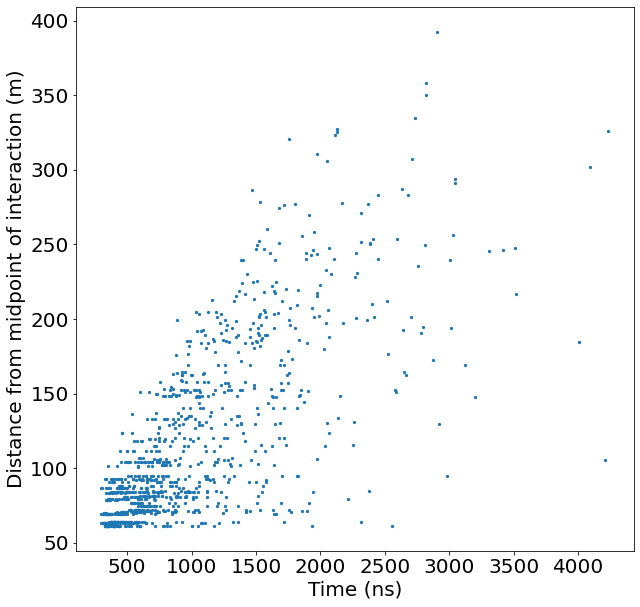

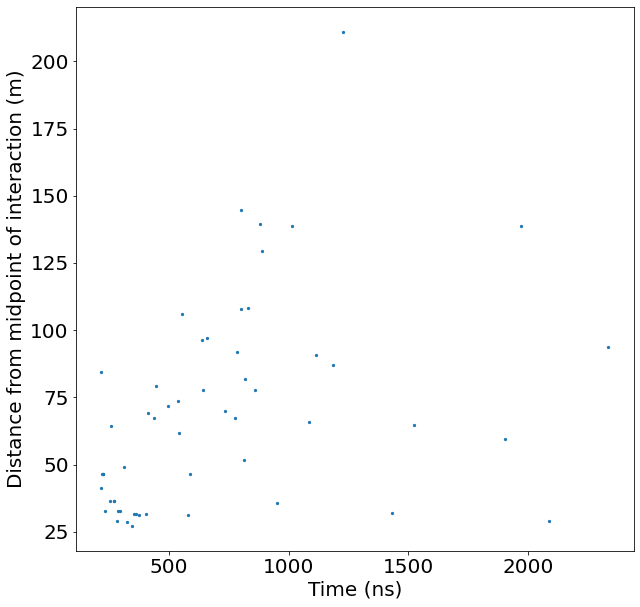

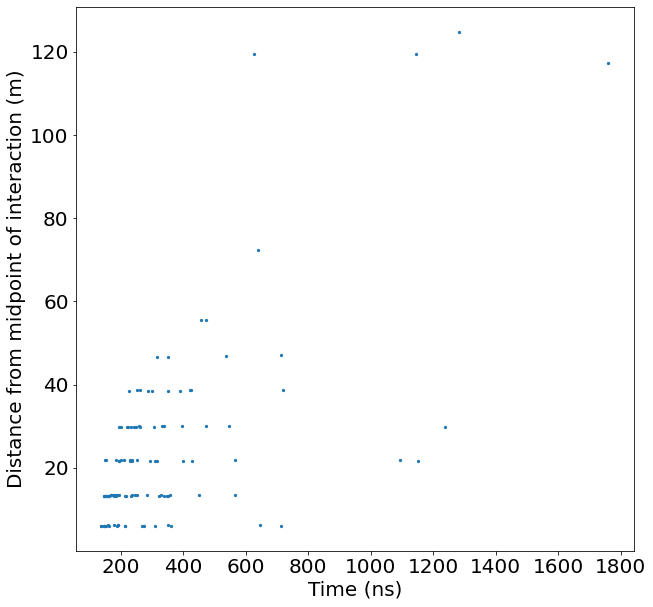

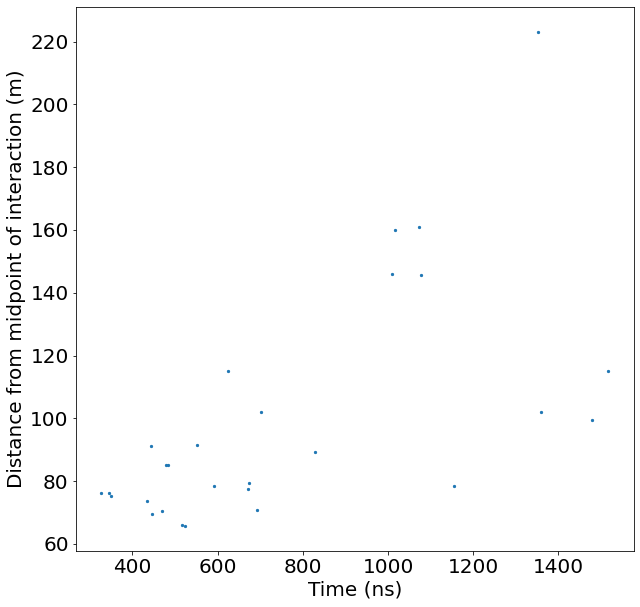

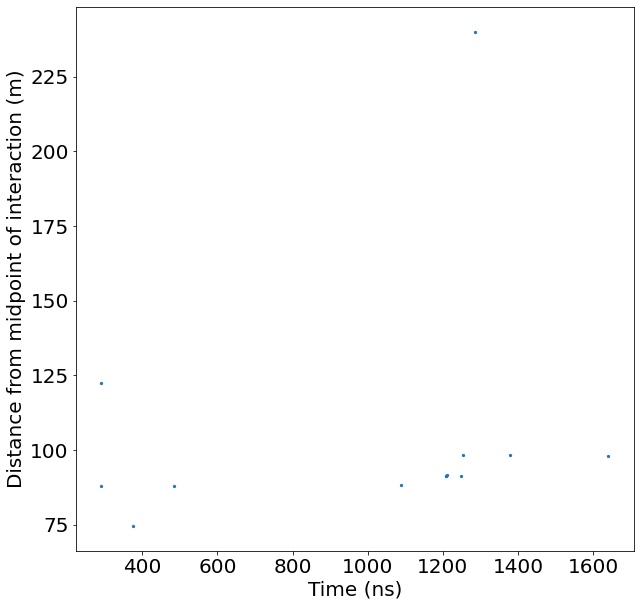

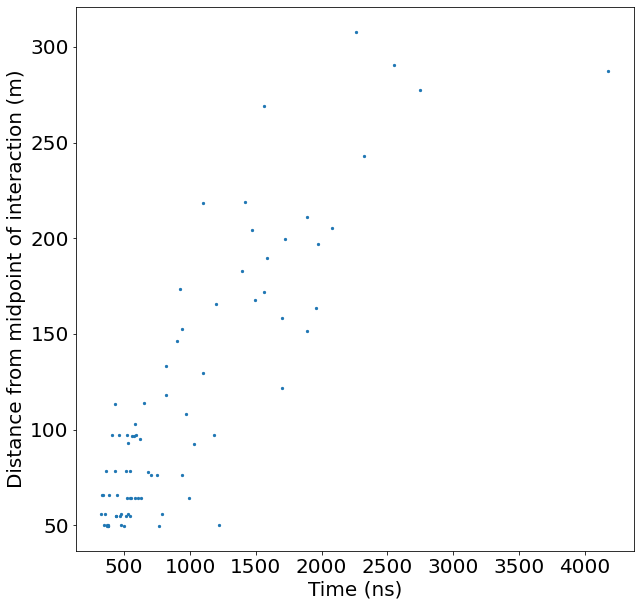

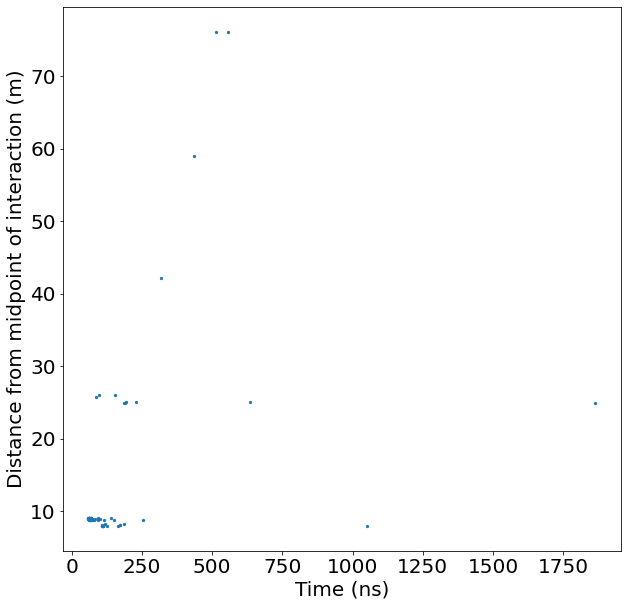

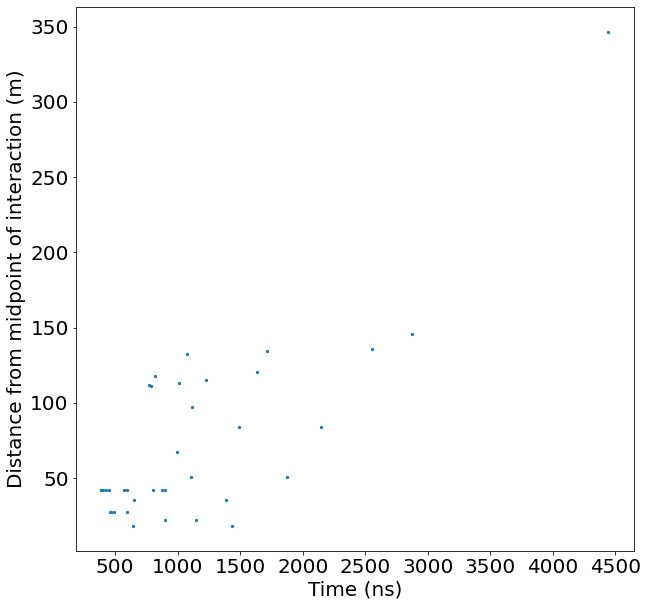

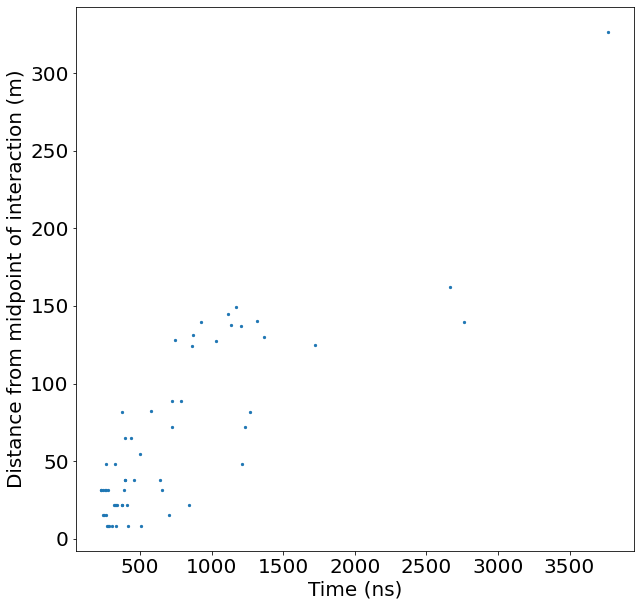

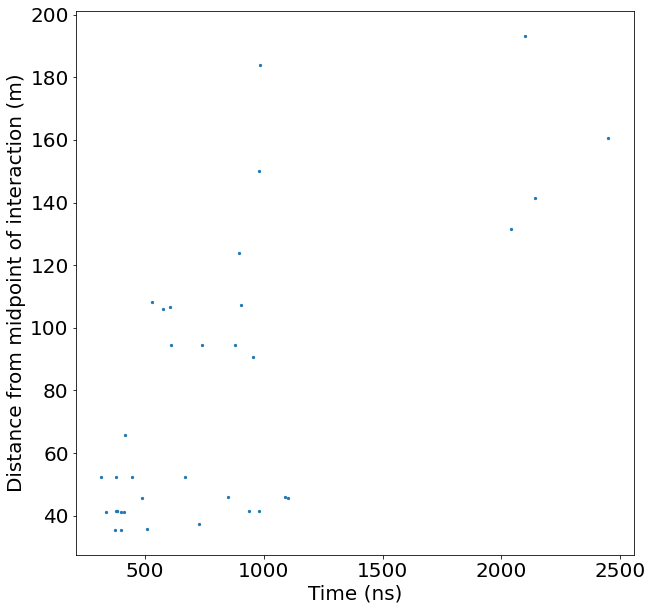

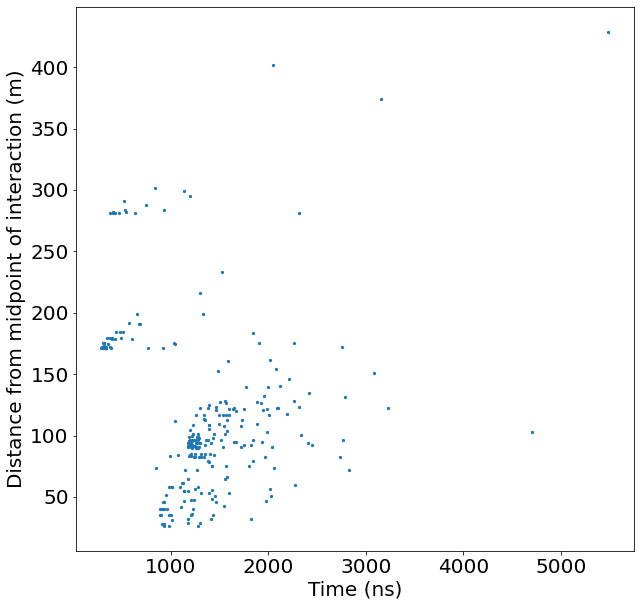

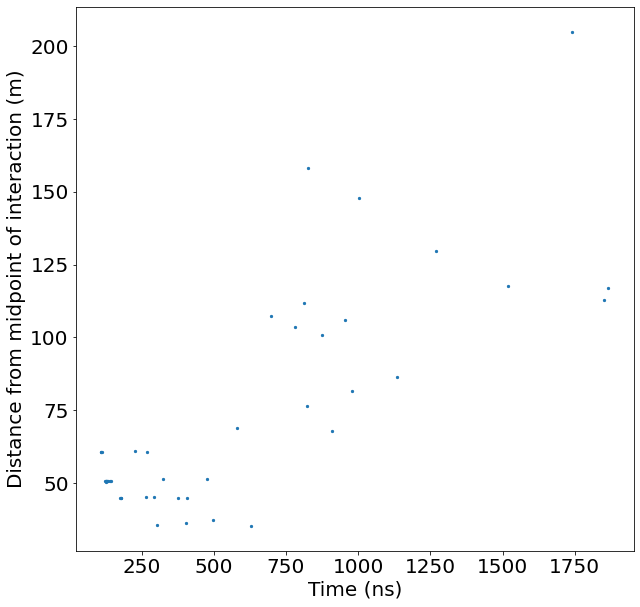

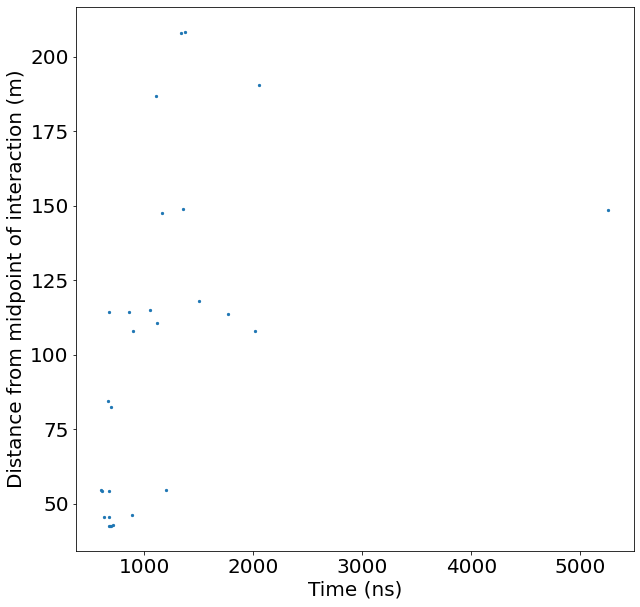

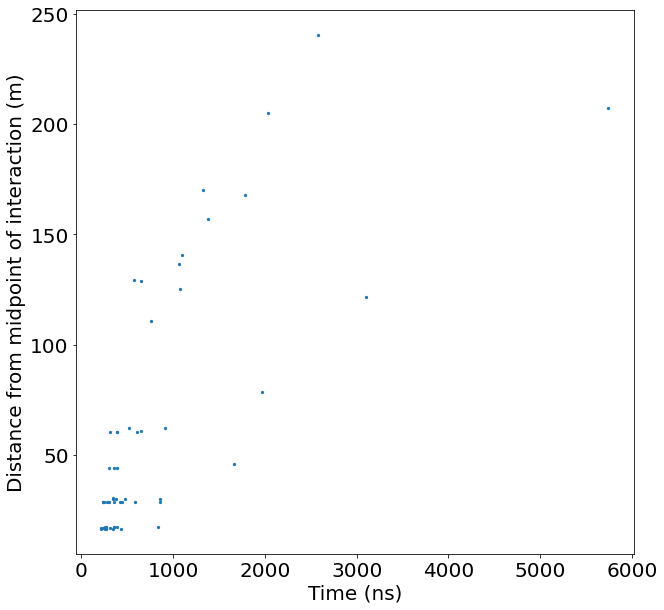

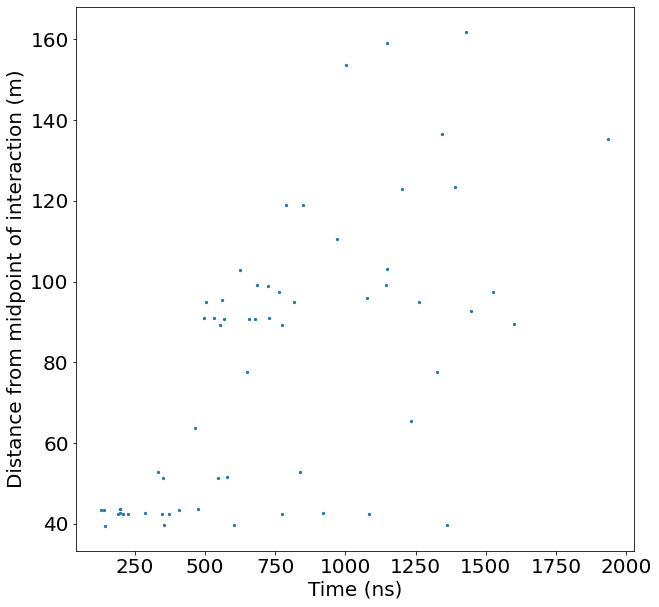

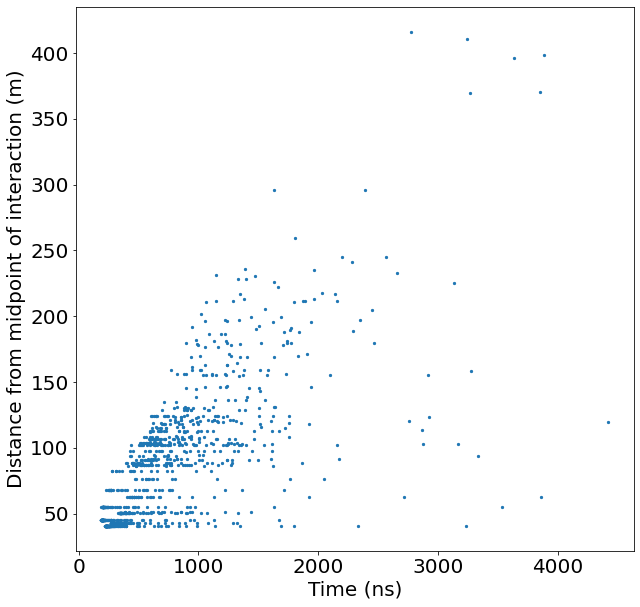

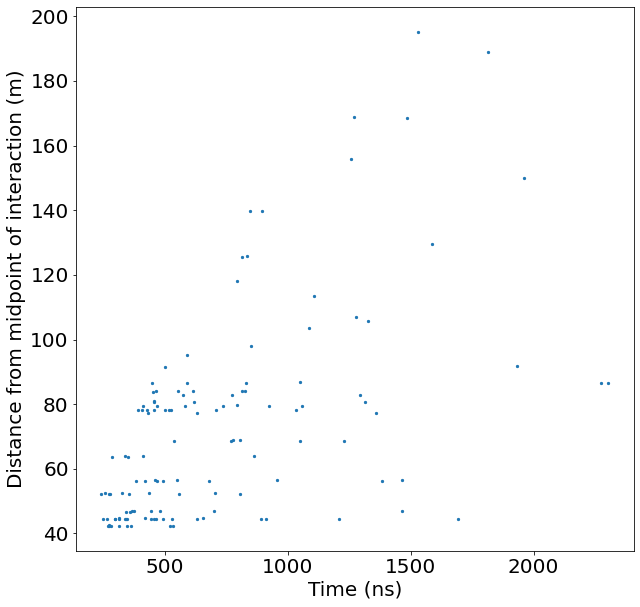

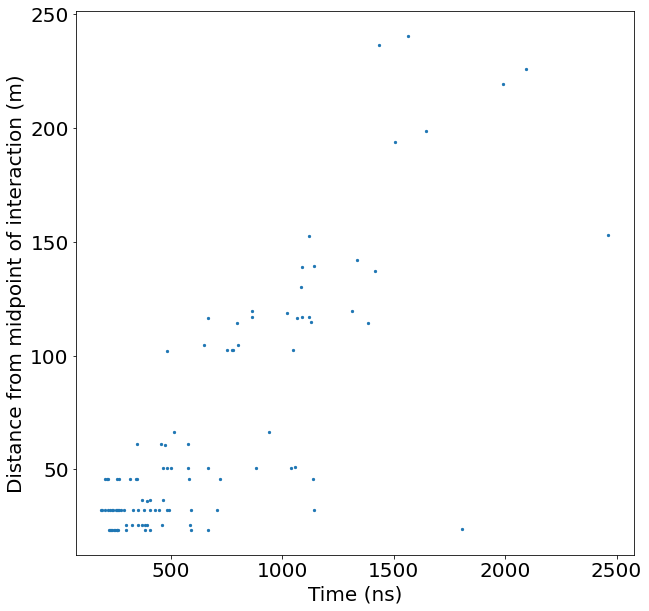

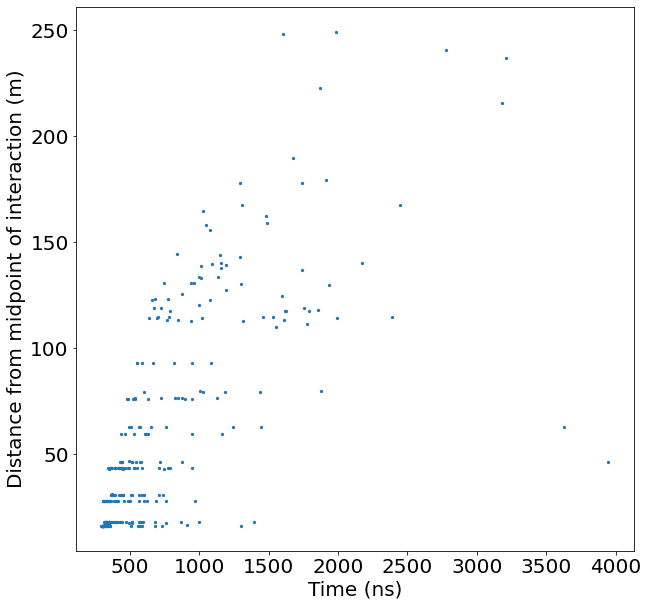

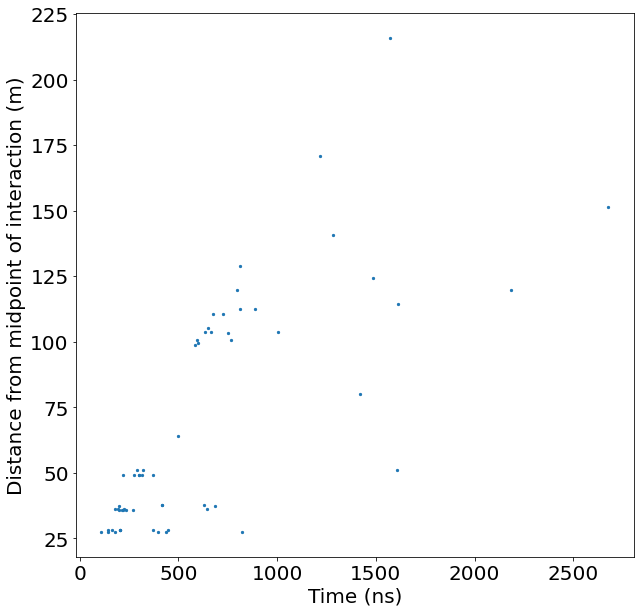

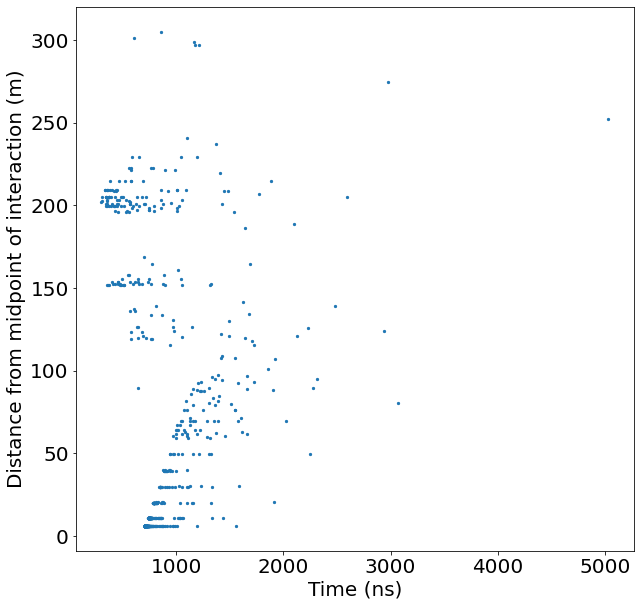

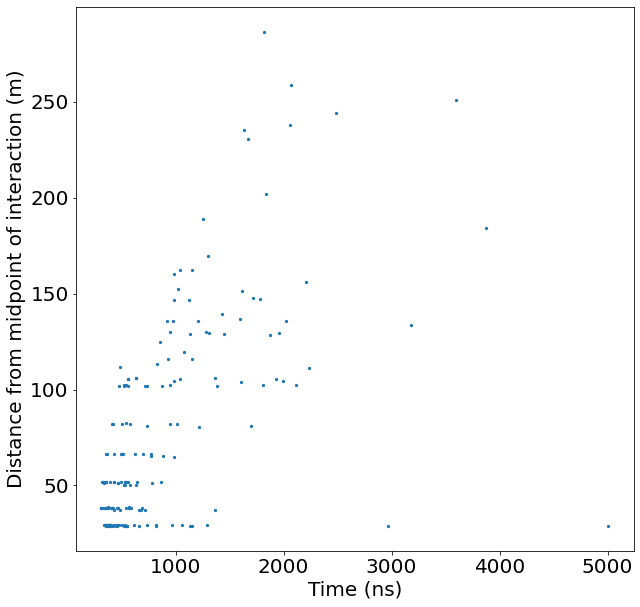

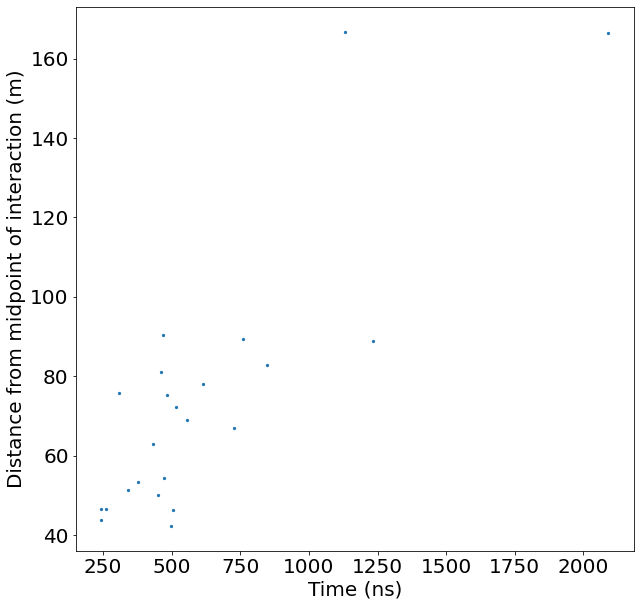

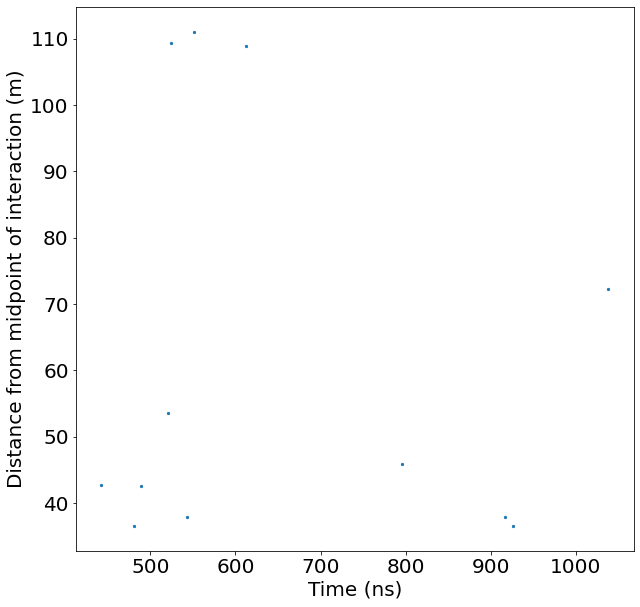

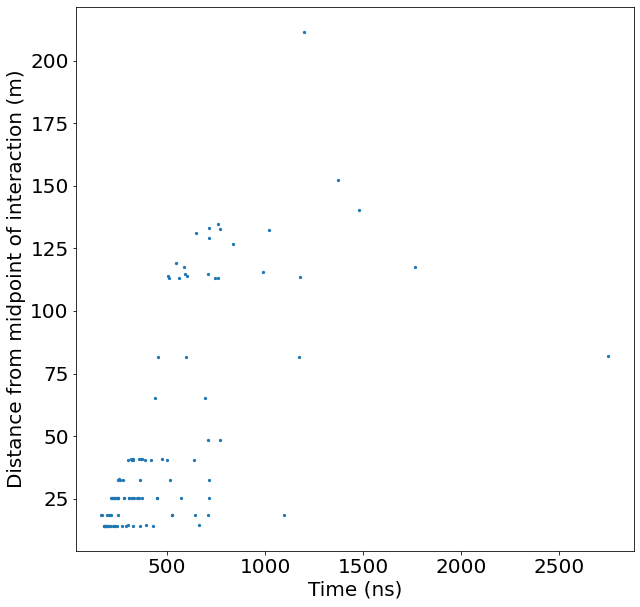

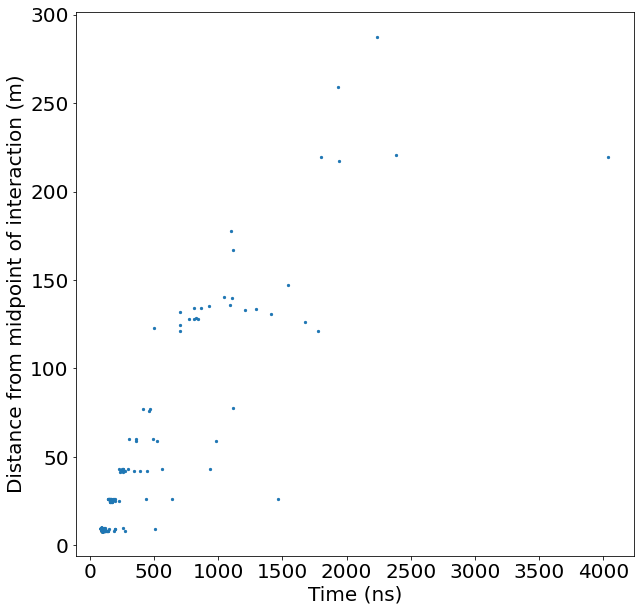

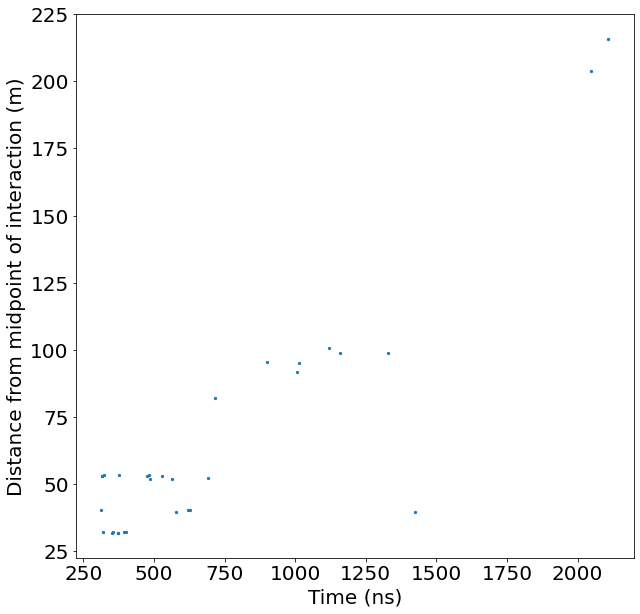

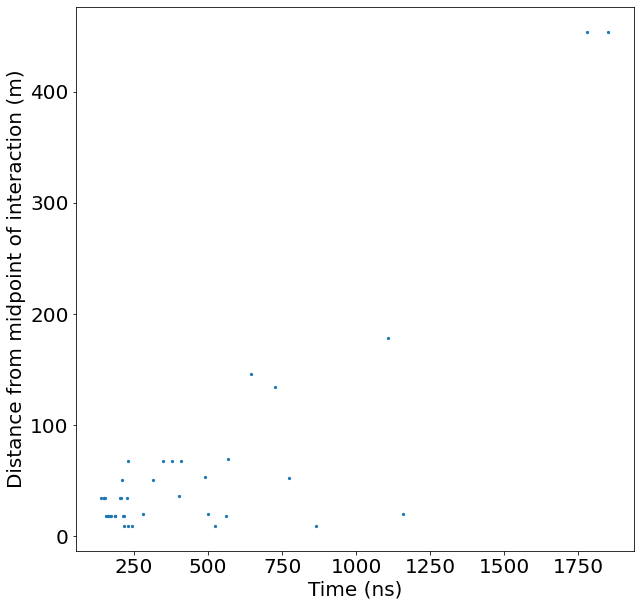

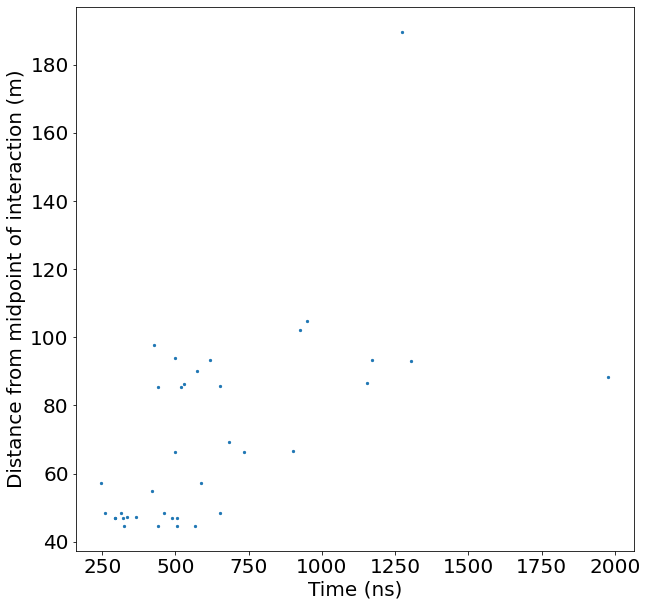

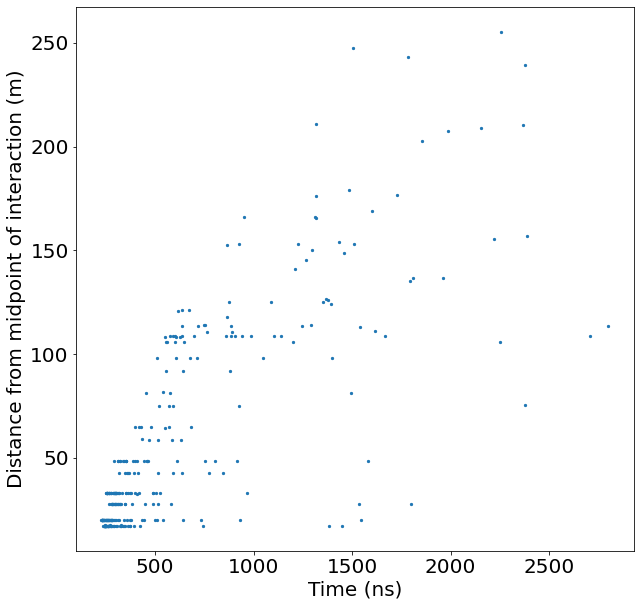

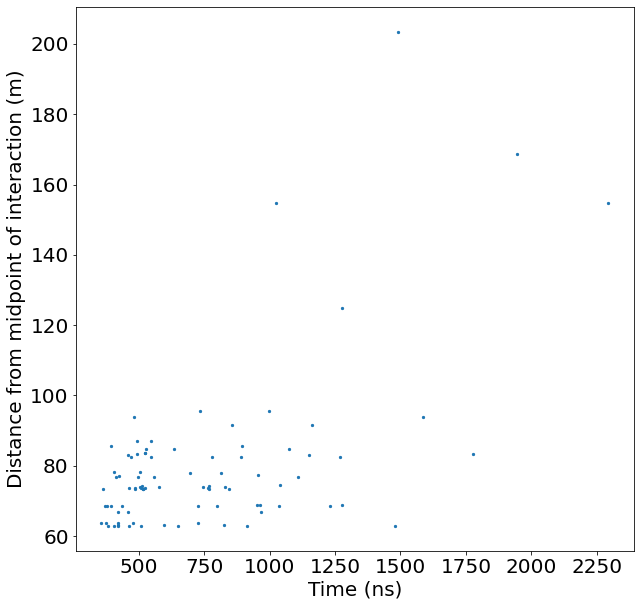

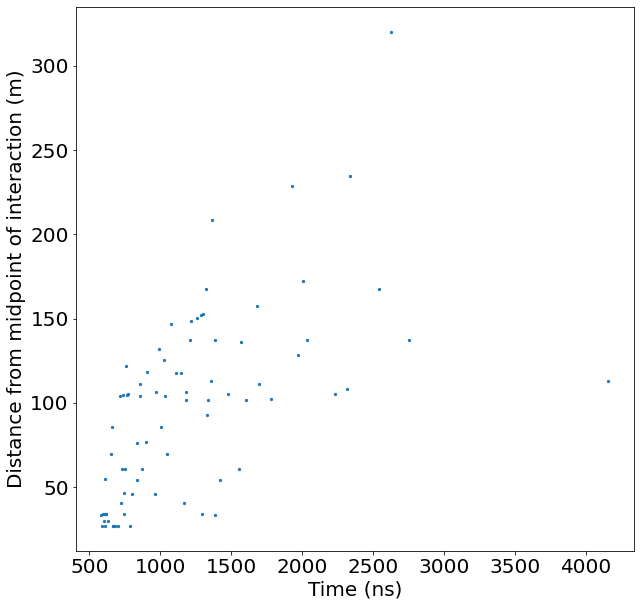

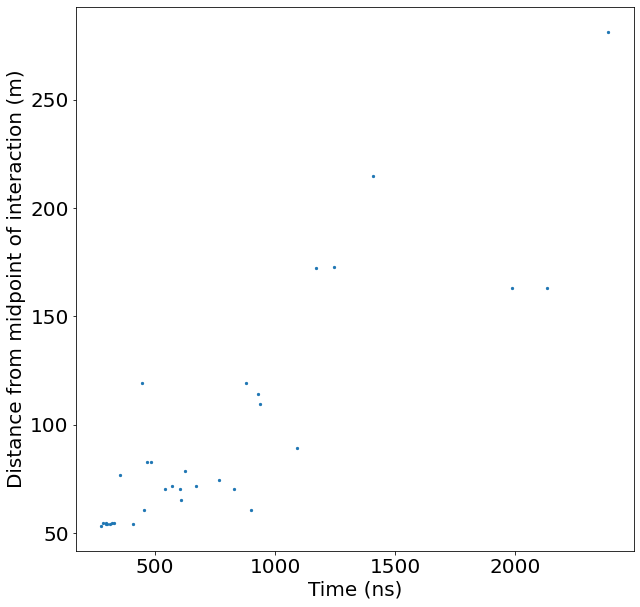

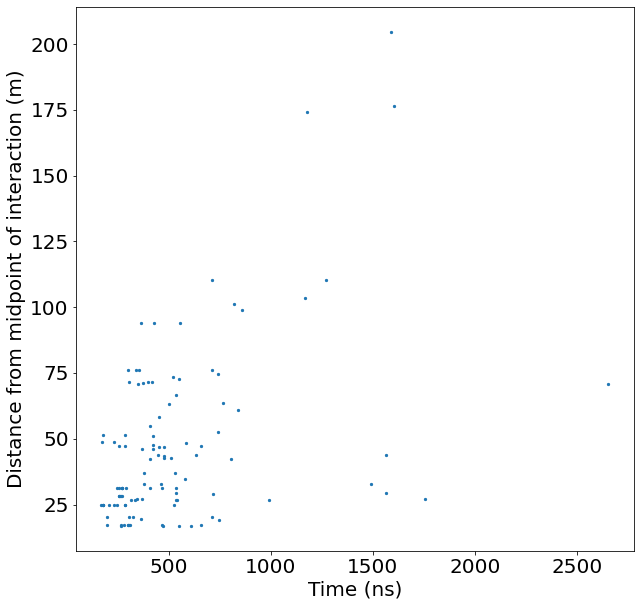

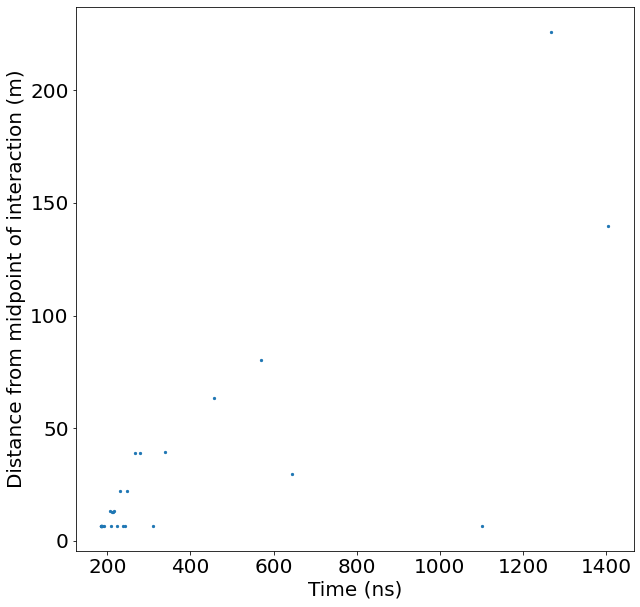

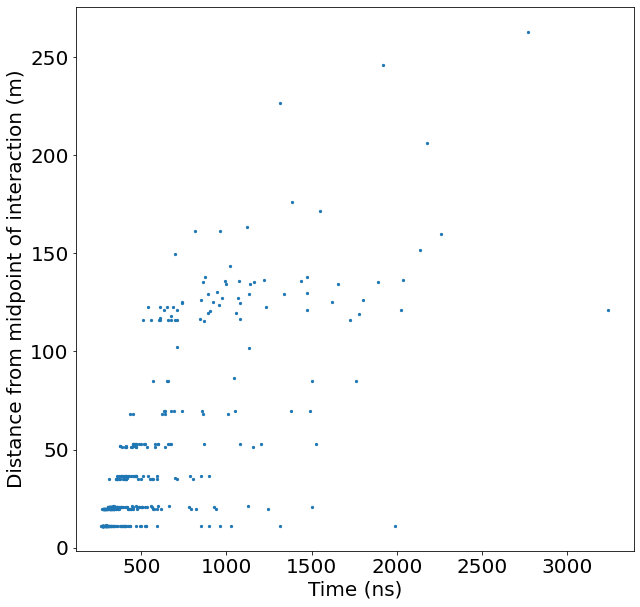

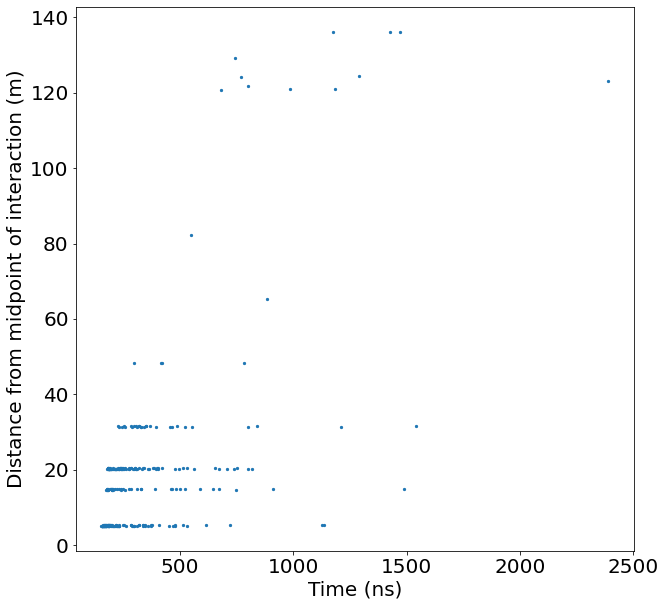

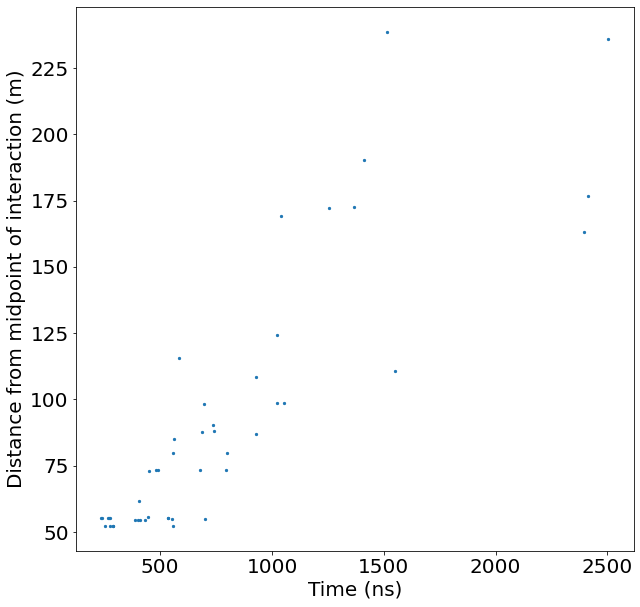

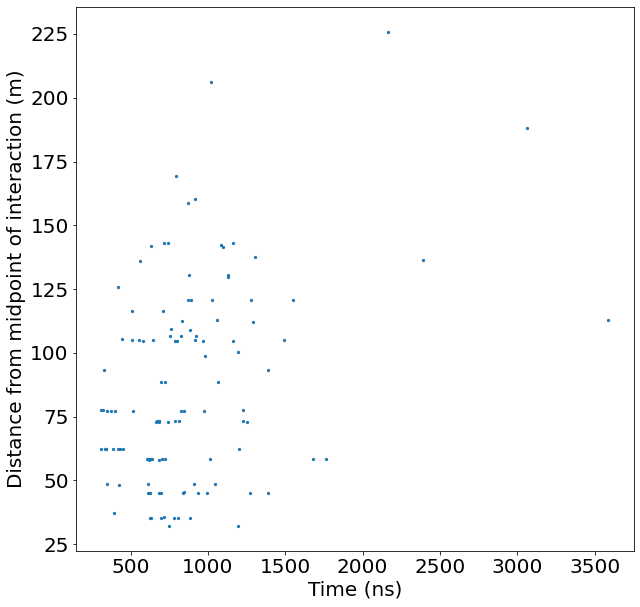

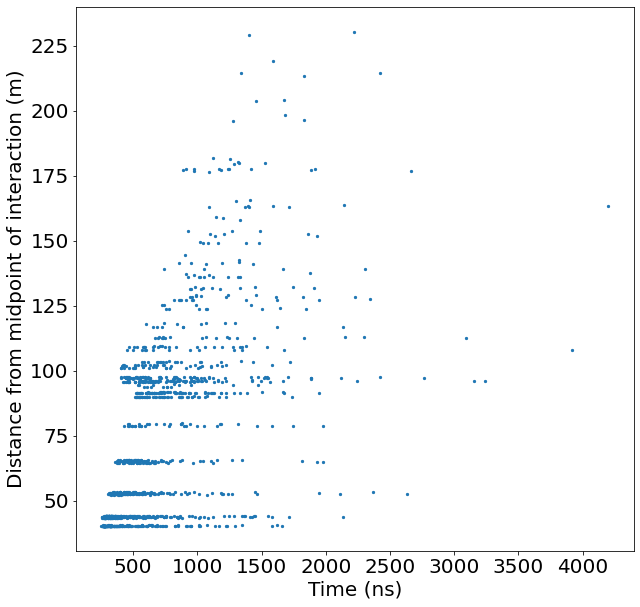

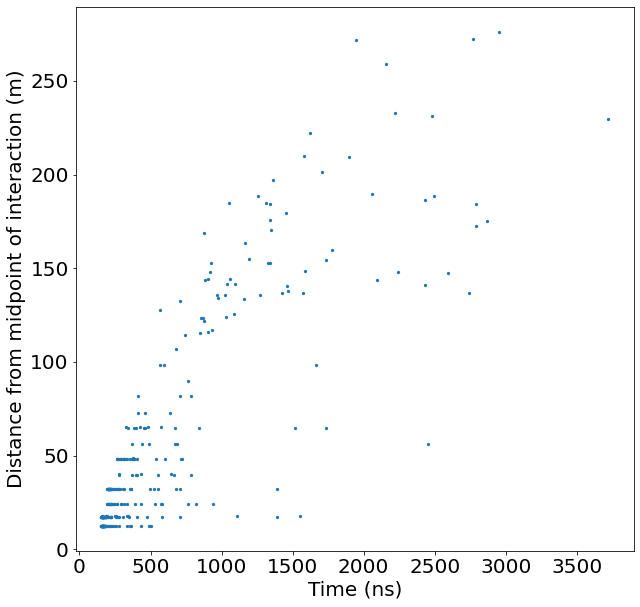

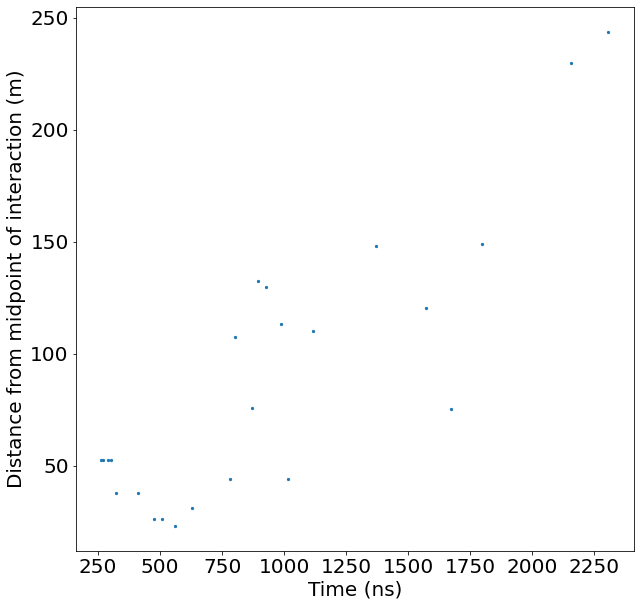

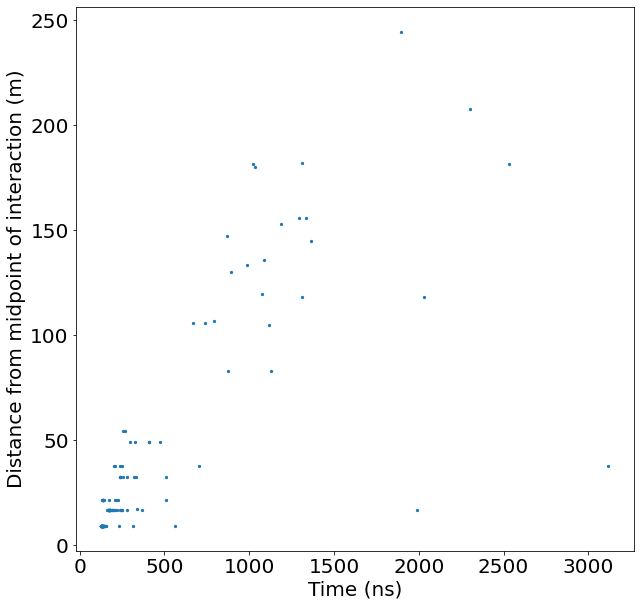

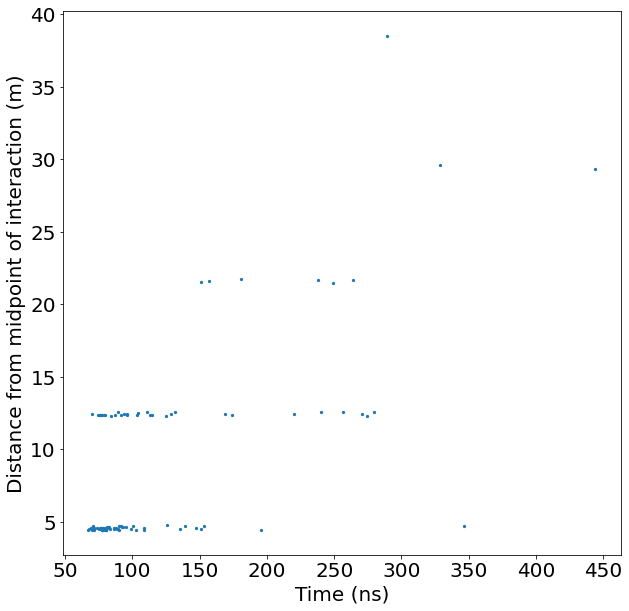

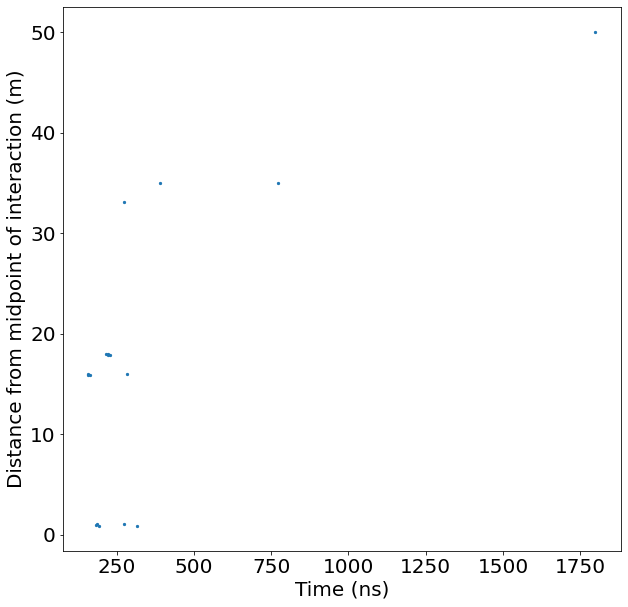

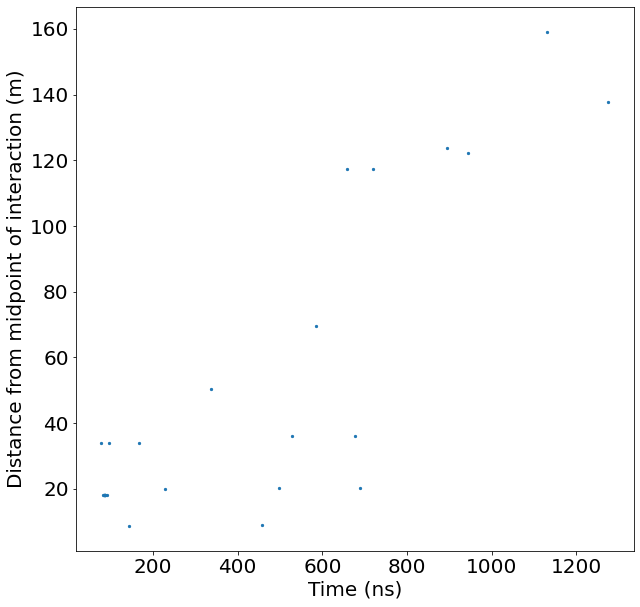

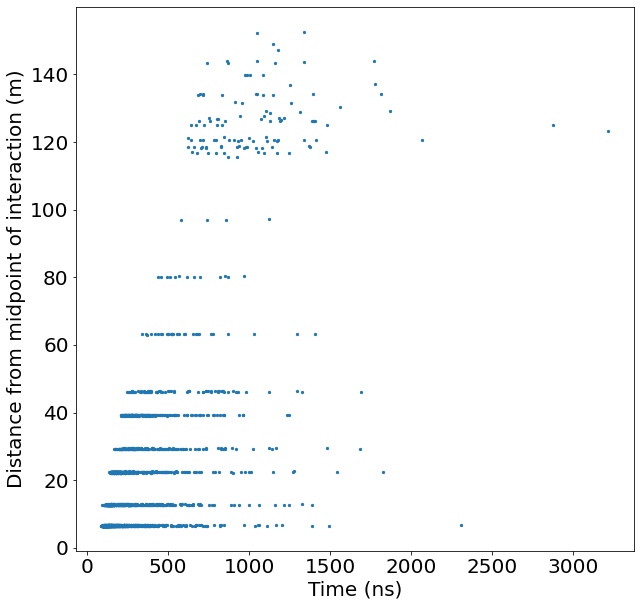

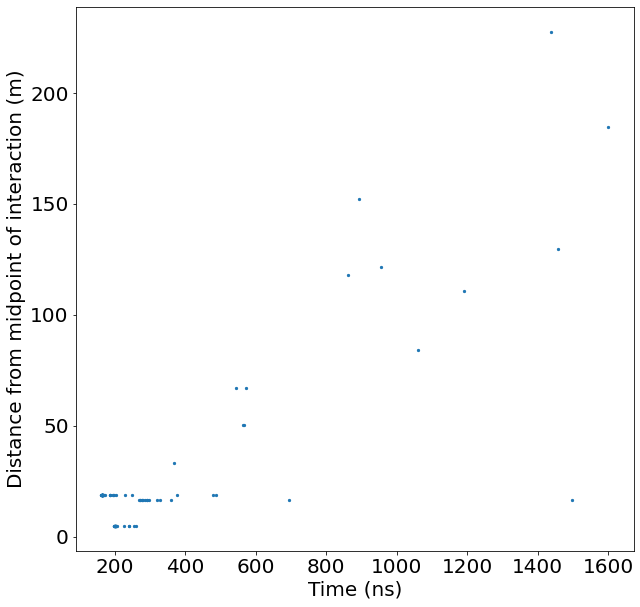

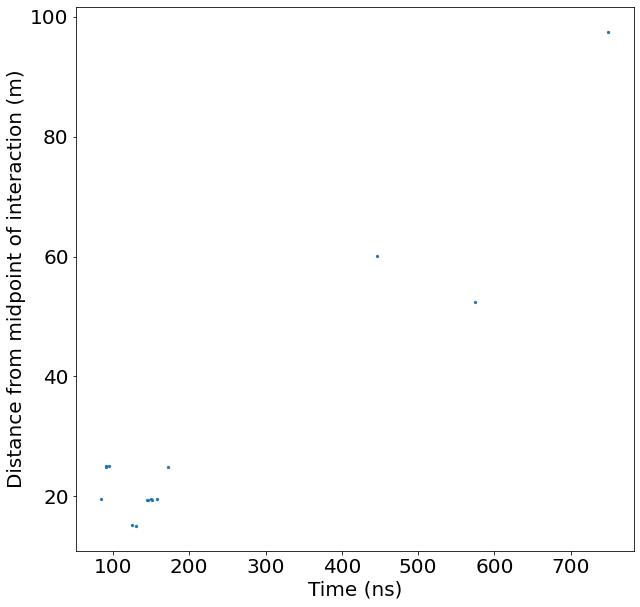

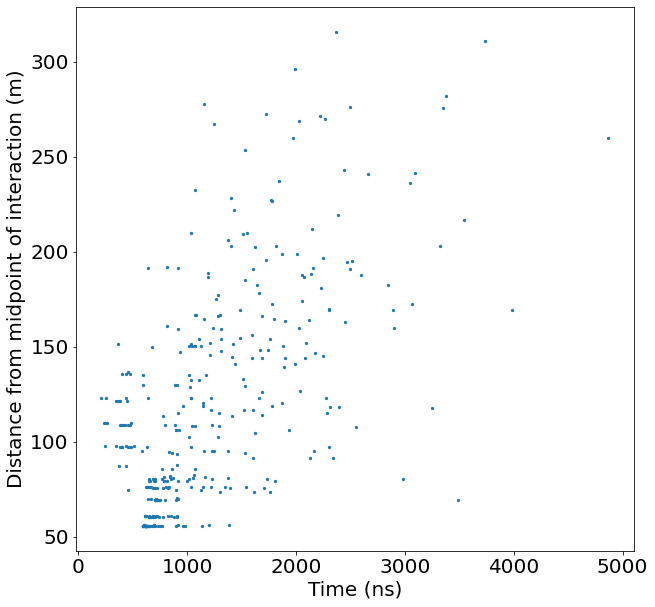

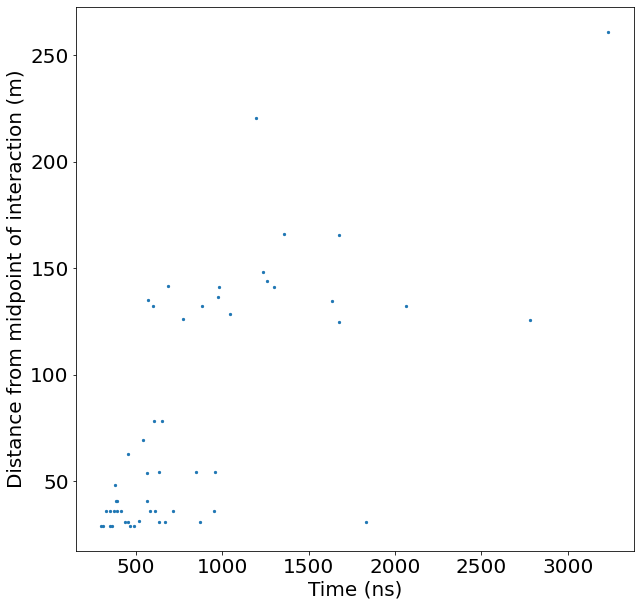

In [128]:
# Distance from center
d={}
for i in range(1,99):
    
    # Loads the position and time
    d["tn{0}".format(i)]=np.loadtxt('/home/mandia/transfer_data/txt/txt'+str(i)+'/time_nop.txt', dtype=float, delimiter=',')
    d["p{0}".format(i)] = []
    with open('/home/mandia/transfer_data/txt/txt'+str(i)+'/position.txt', 'r') as f:
        for line in f:
            d["p{0}".format(i)].extend(literal_eval(line.strip()))
    d["p{0}".format(i)]=np.array(d["p{0}".format(i)])
    
    # Gets x, y, and z from the position array
    d["x{0}".format(i)]=d["p{0}".format(i)][:,0]
    d["y{0}".format(i)]=d["p{0}".format(i)][:,1]
    d["z{0}".format(i)]=d["p{0}".format(i)][:,2]
    
    # Finds the average x, y, and z
    d["avg_x{0}".format(i)]=sum(d["x{0}".format(i)])/len(d["p{0}".format(i)])
    d["avg_y{0}".format(i)]=sum(d["y{0}".format(i)])/len(d["p{0}".format(i)])
    d["avg_z{0}".format(i)]=sum(d["z{0}".format(i)])/len(d["p{0}".format(i)])
    
    # Creates an array of the averages
    d["avg{0}".format(i)]=np.array([(d["avg_x{0}".format(i)],d["avg_y{0}".format(i)],d["avg_z{0}".format(i)])])
    g={}
    d["dis{0}".format(i)]=np.array([])
    
    # Finds the distance of each point from the average
    for x in range(len(d["p{0}".format(i)])):
        g['dist{0}'.format(x)]=distance.euclidean(d["p{0}".format(i)][x,:],d["avg{0}".format(i)])
        g['dist{0}'.format(x)]=float(g['dist{0}'.format(x)])
        d["dis{0}".format(i)]=np.append(d["dis{0}".format(i)],g['dist{0}'.format(x)])
    
    # Creates a graph of the average distance vs time
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(d["tn{0}".format(i)], d['dis{0}'.format(i)], s=5)
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('Distance from midpoint of interaction (m)')
    

/tmp/ipykernel_5355/967597486.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20,5))


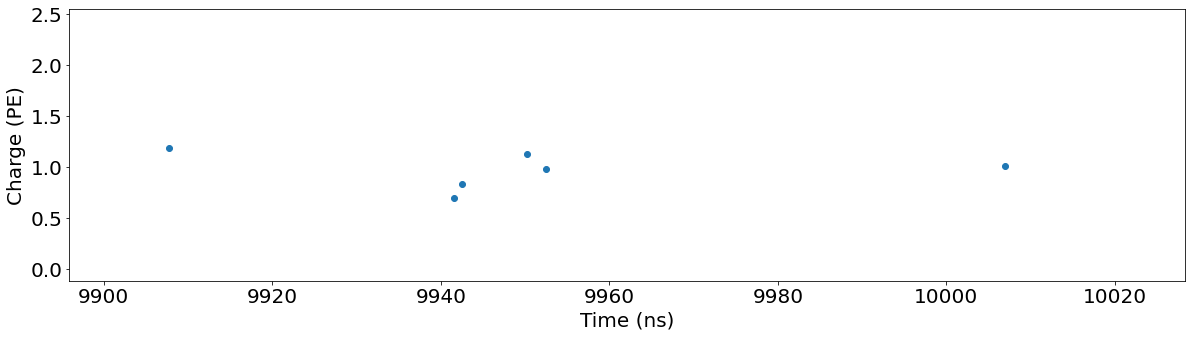

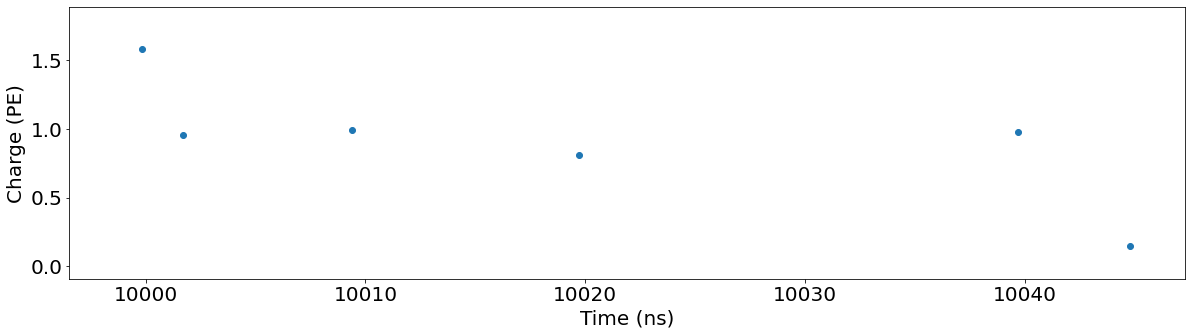

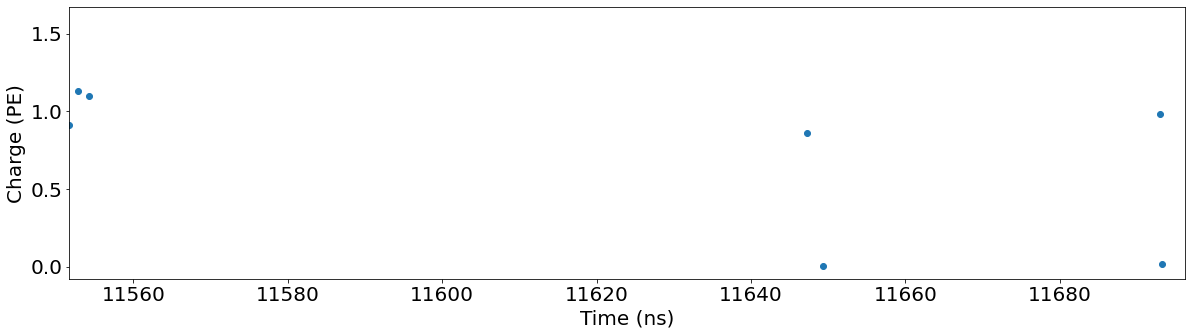

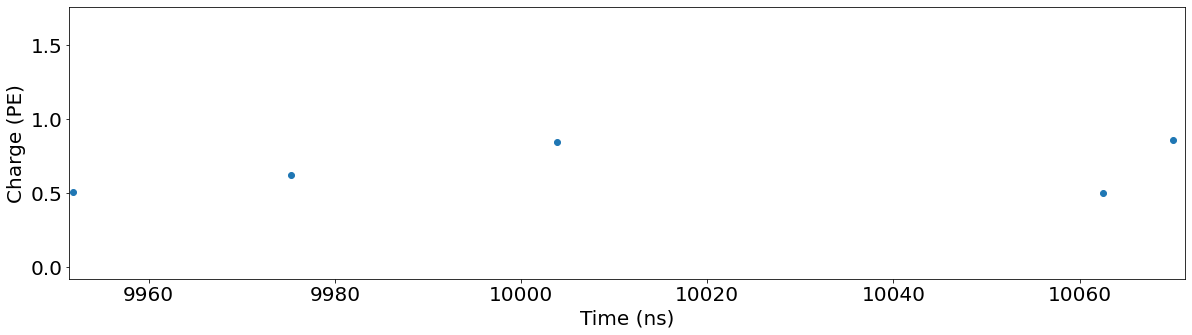

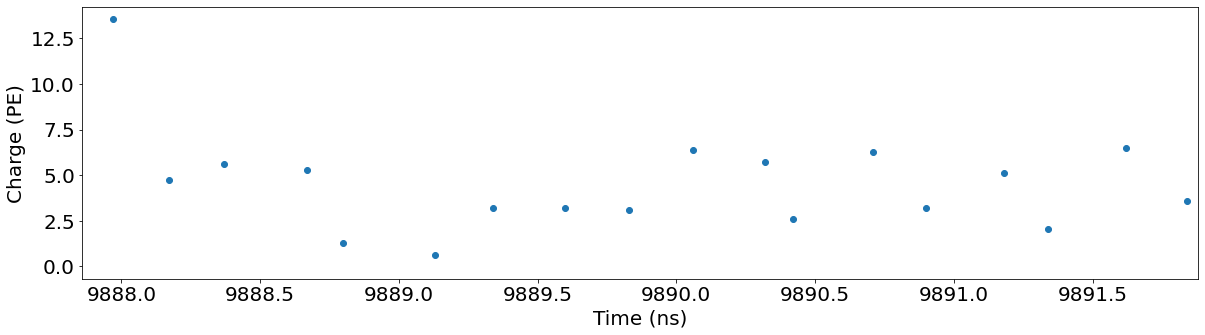

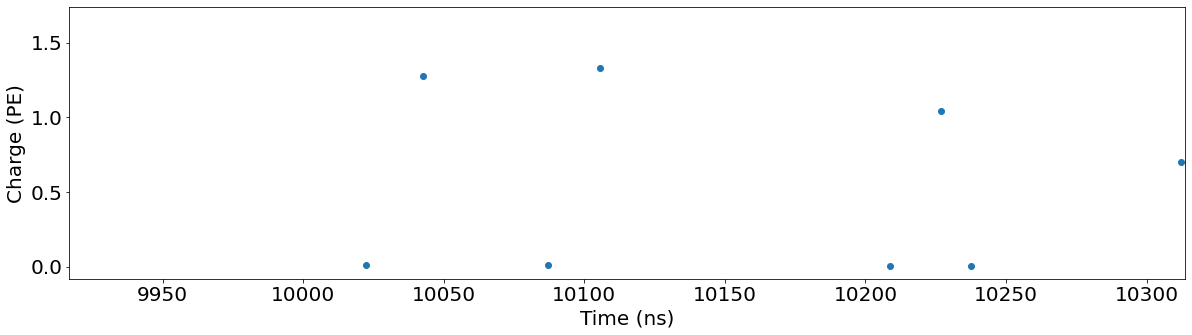

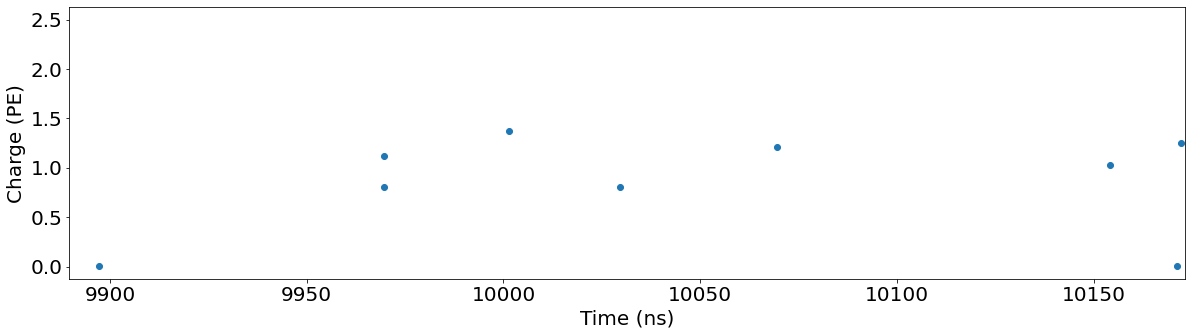

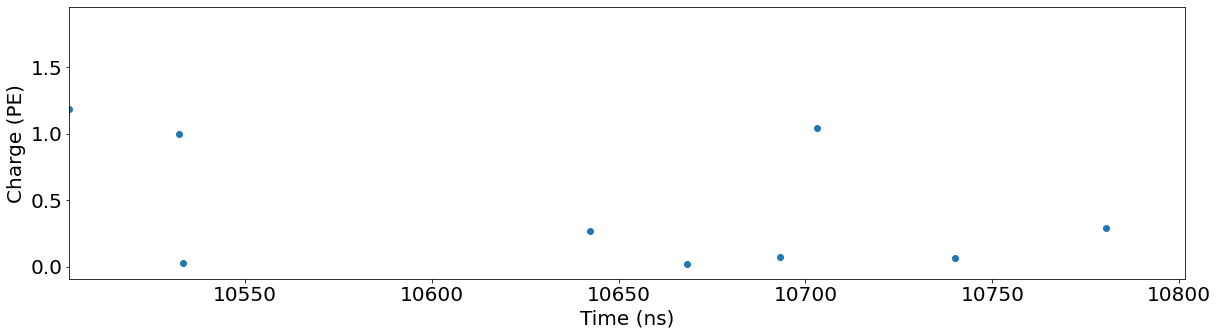

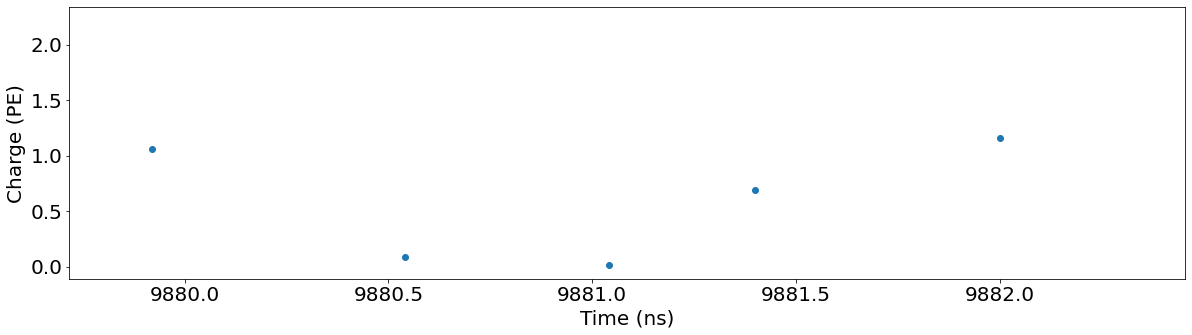

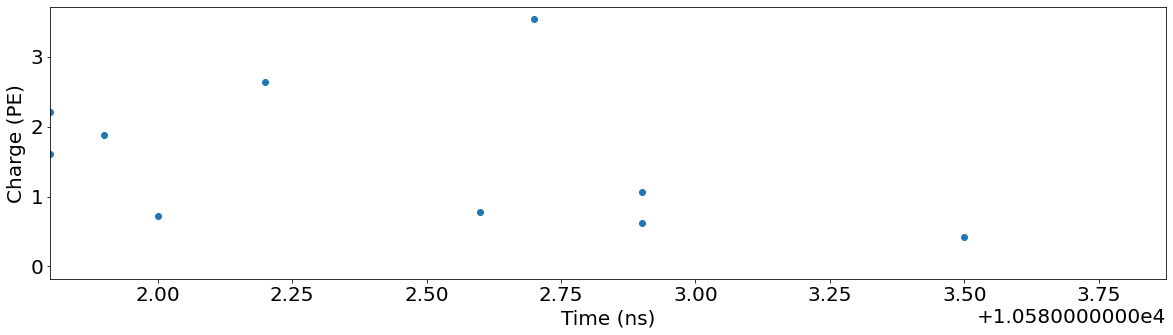

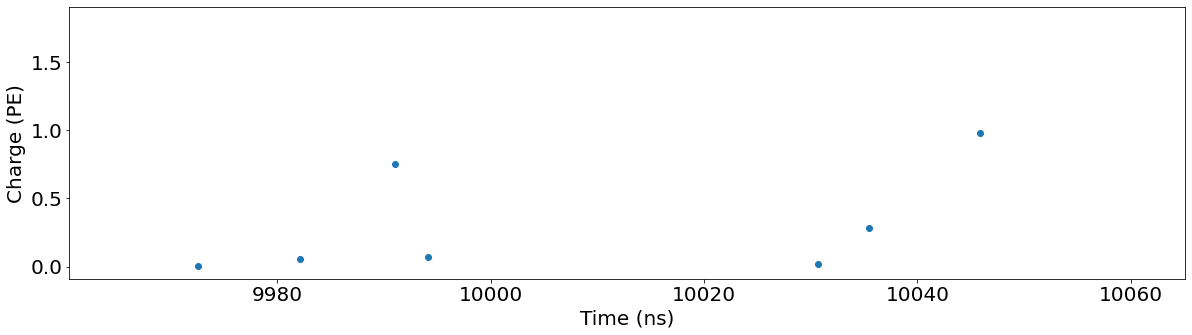

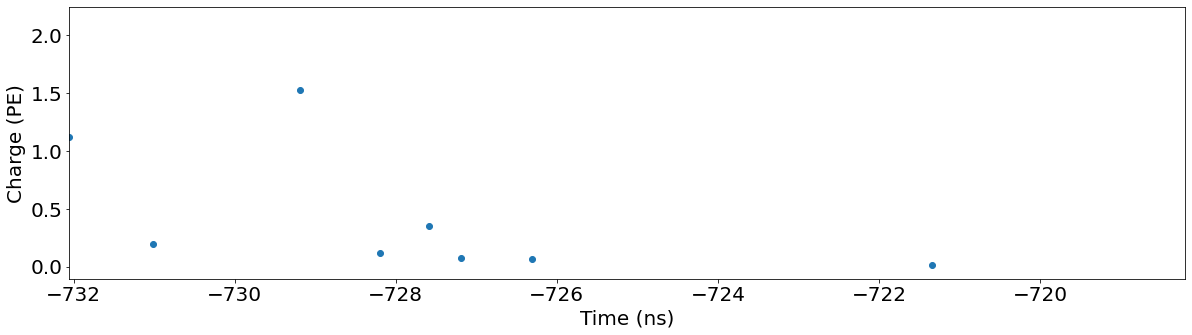

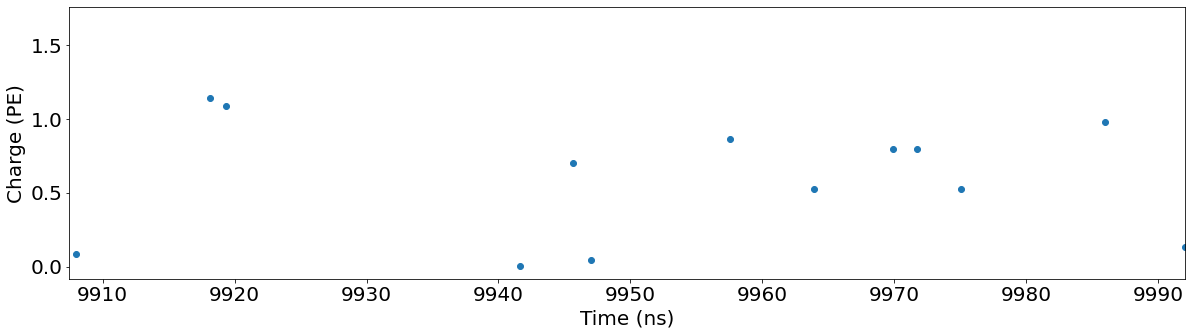

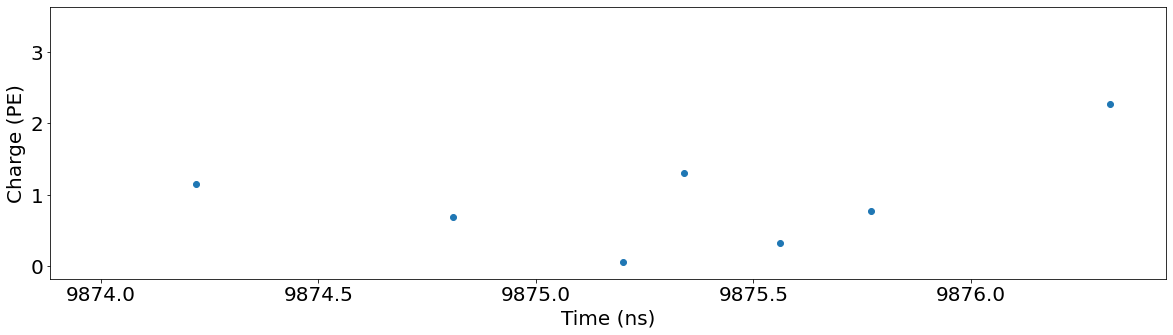

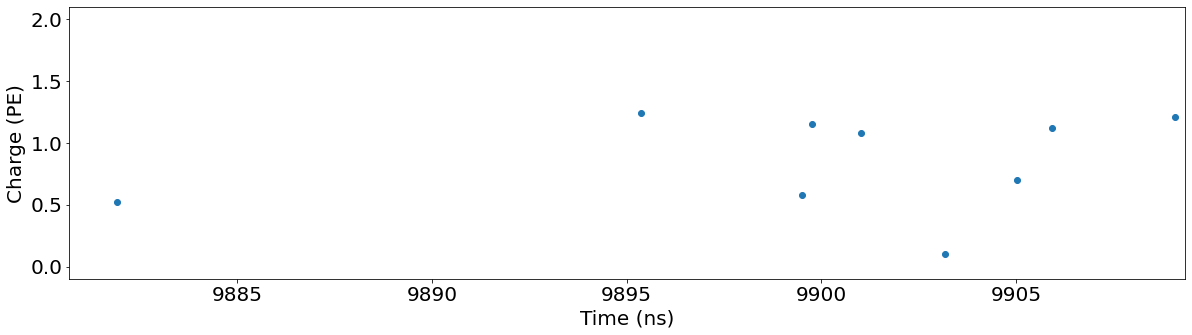

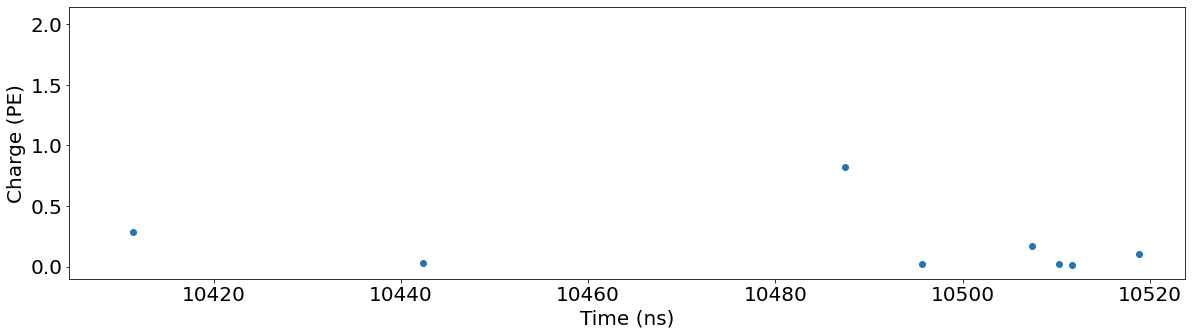

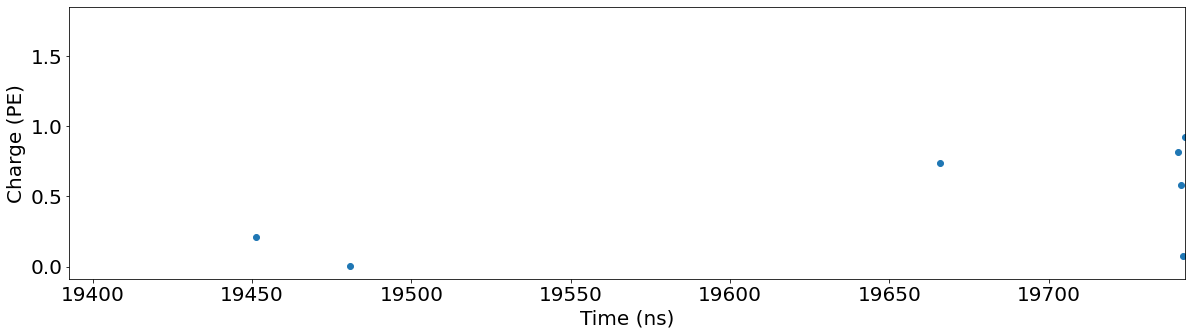

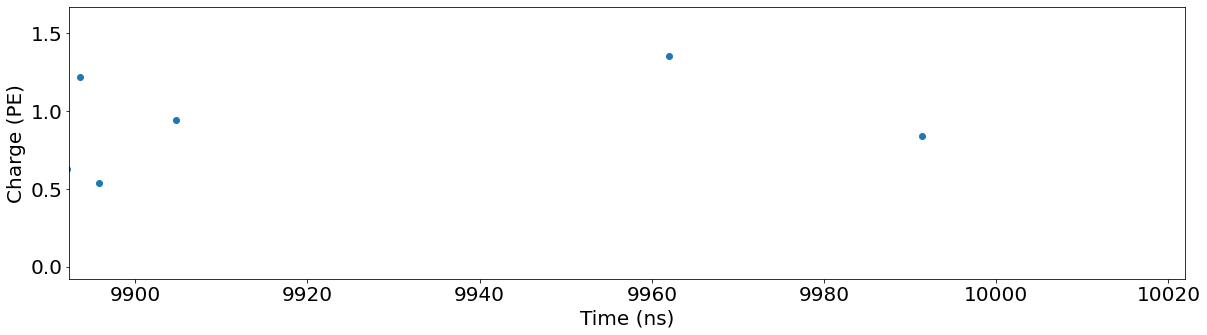

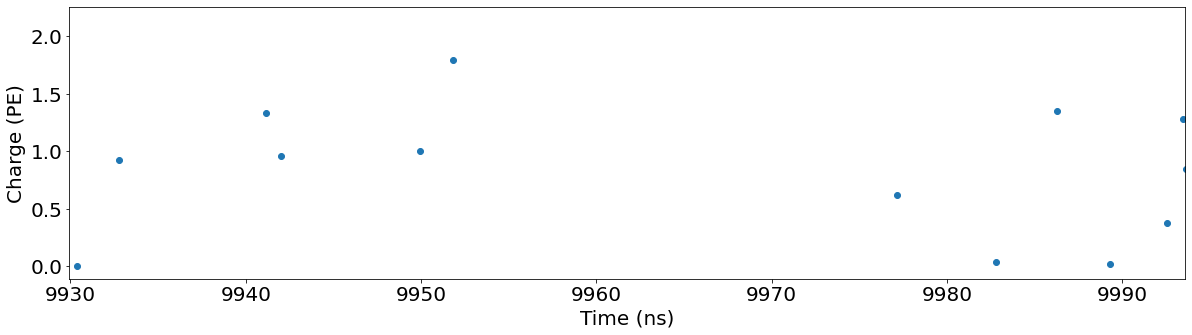

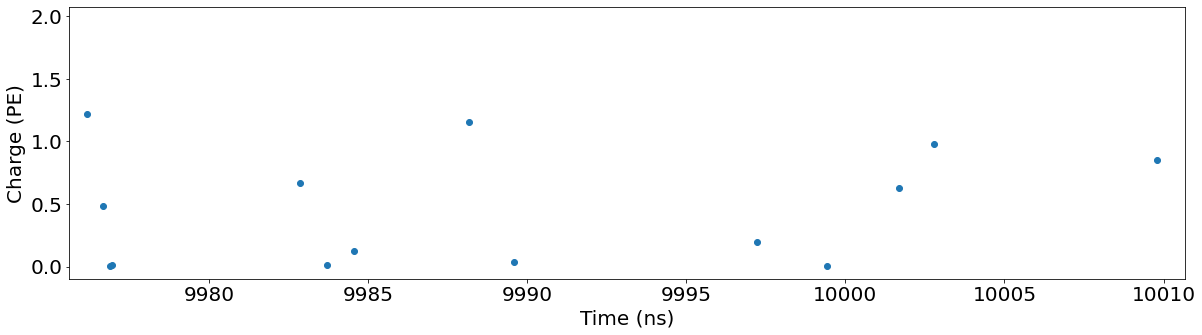

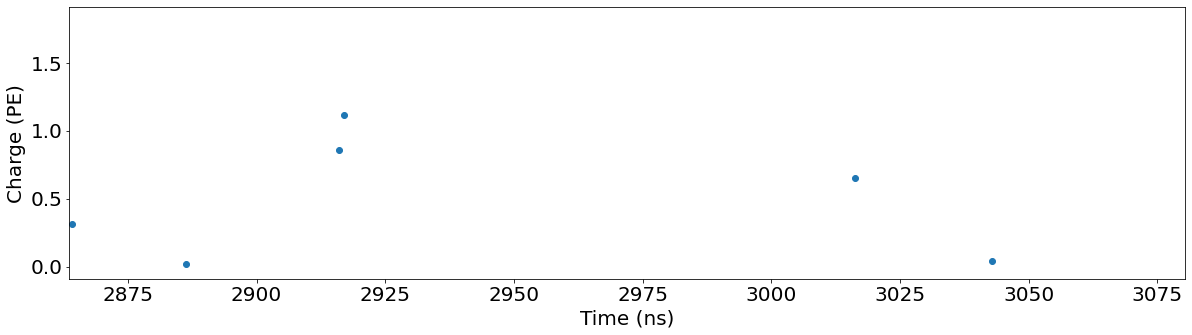

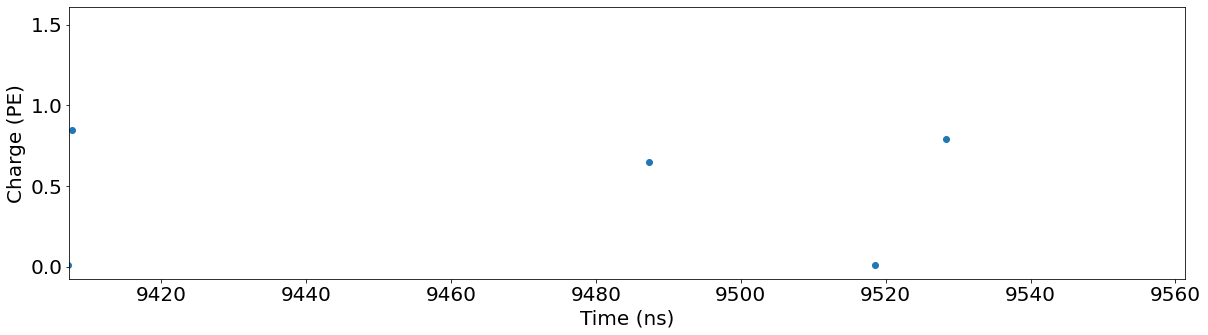

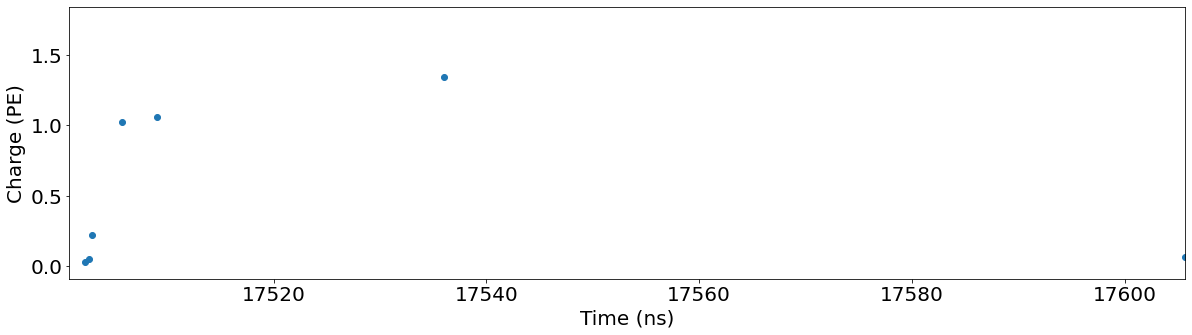

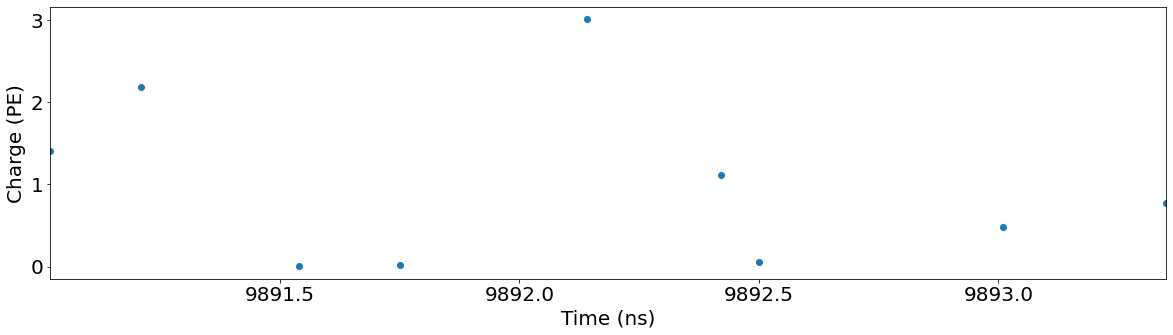

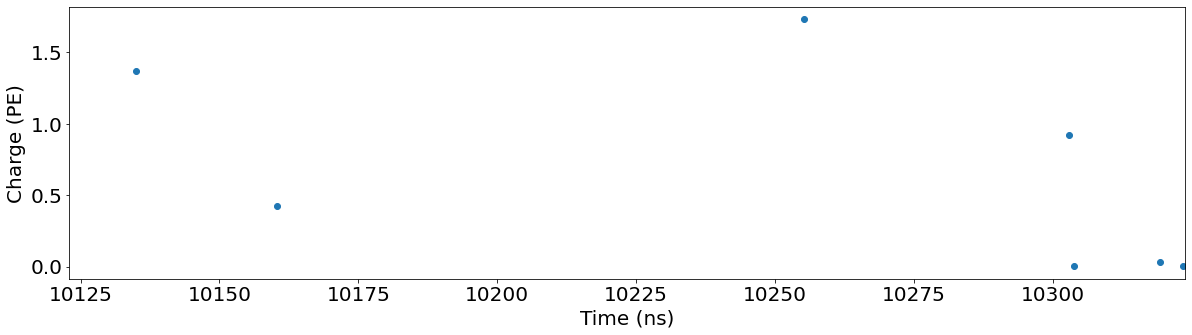

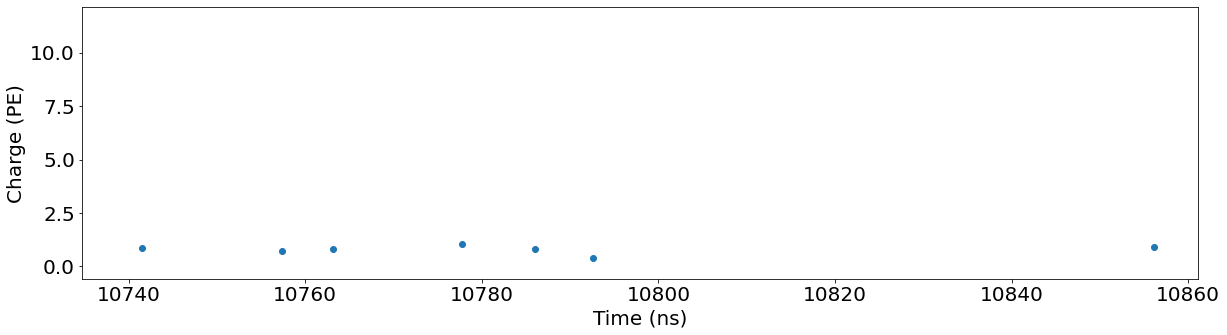

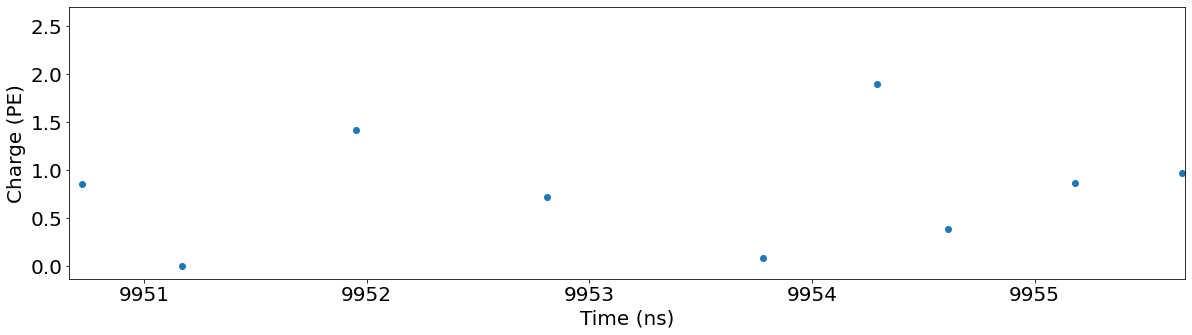

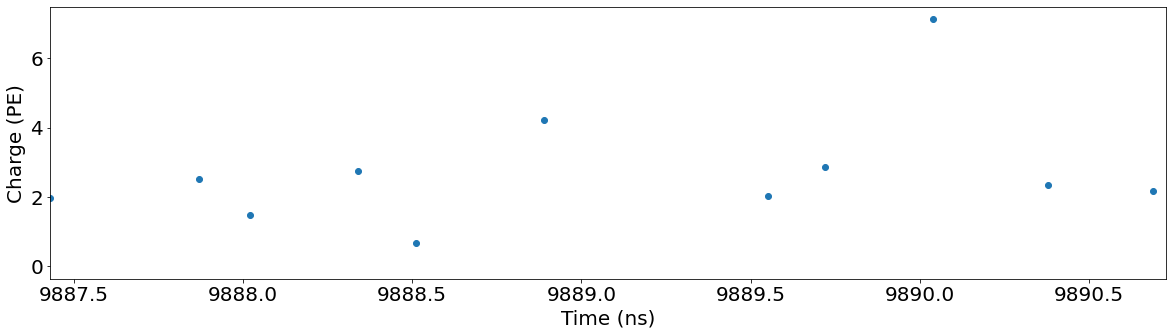

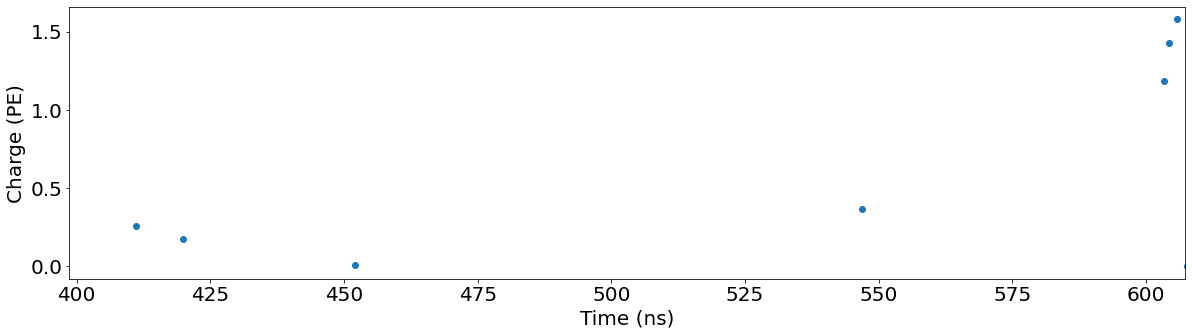

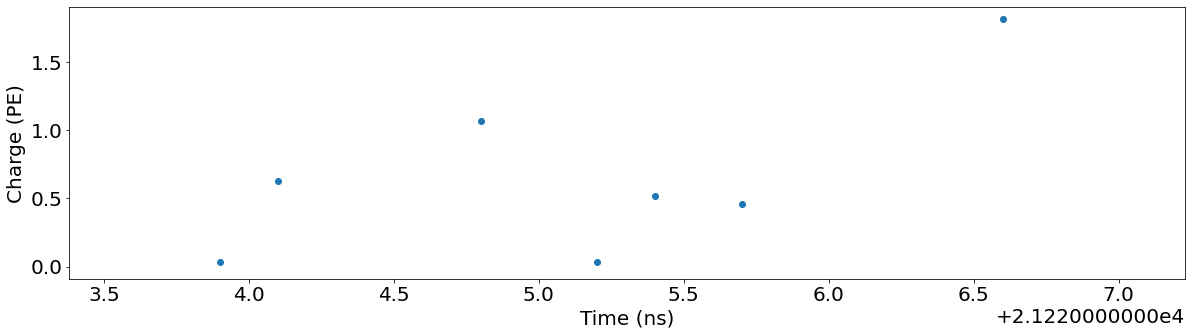

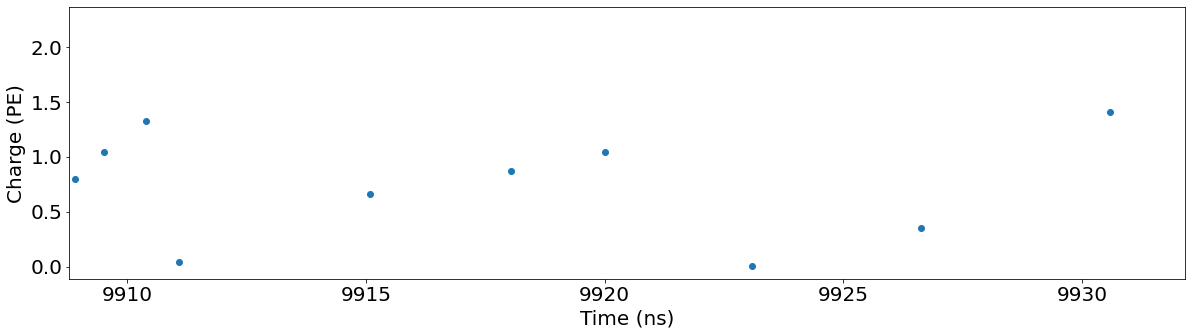

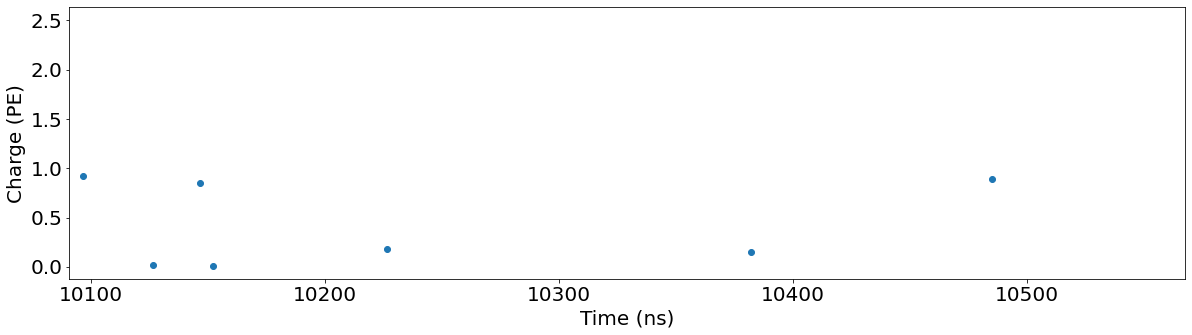

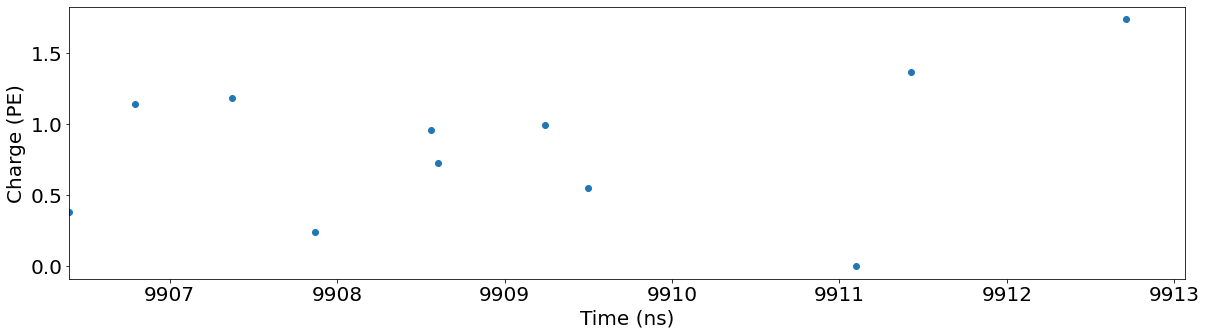

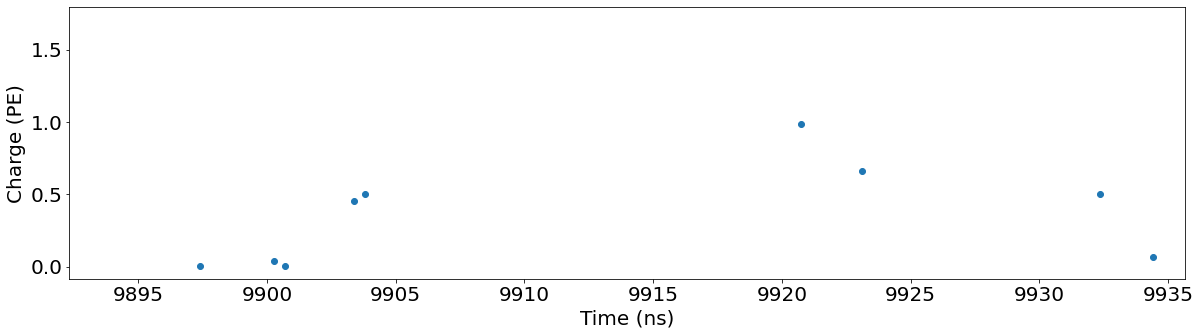

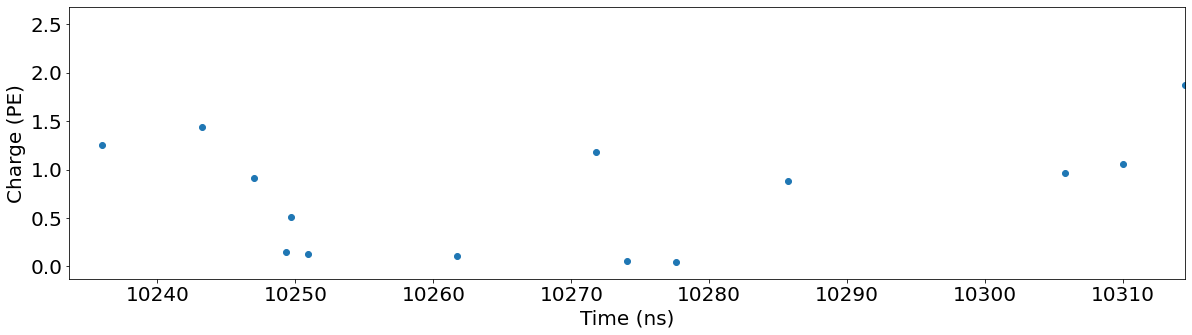

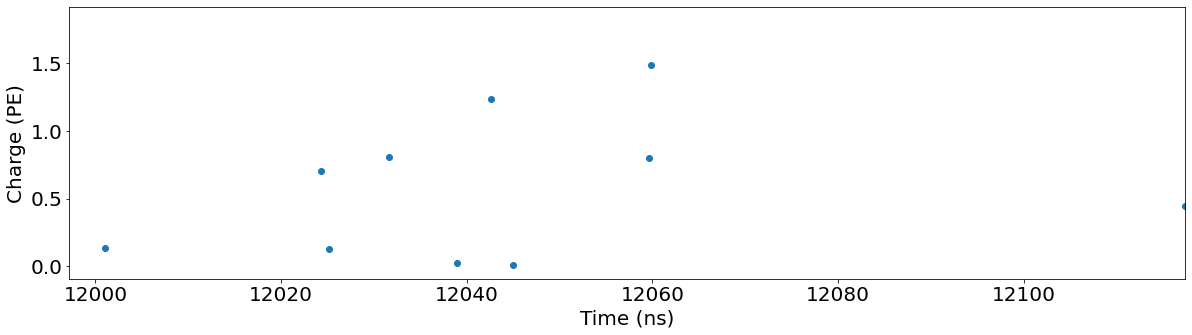

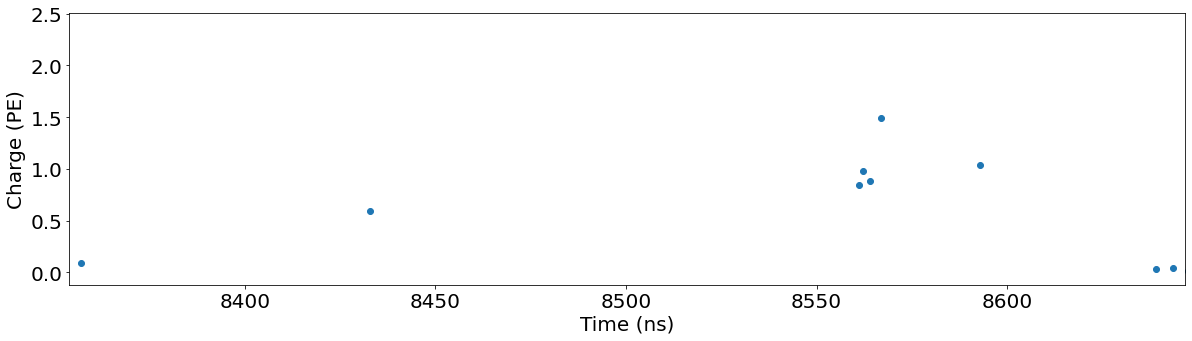

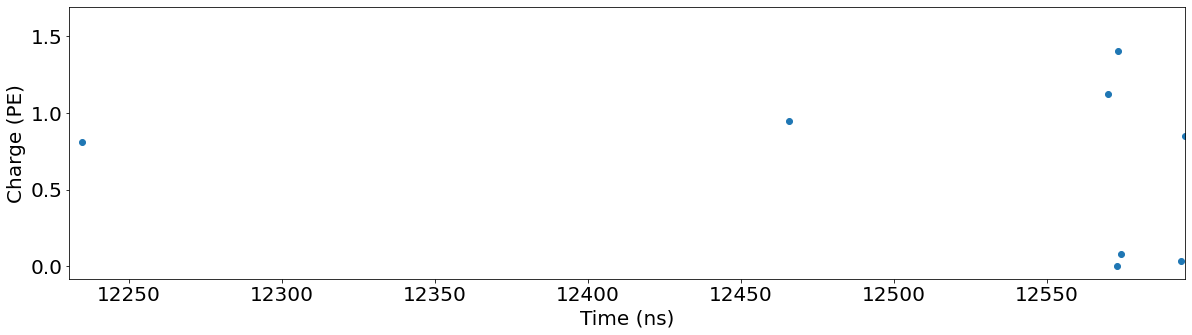

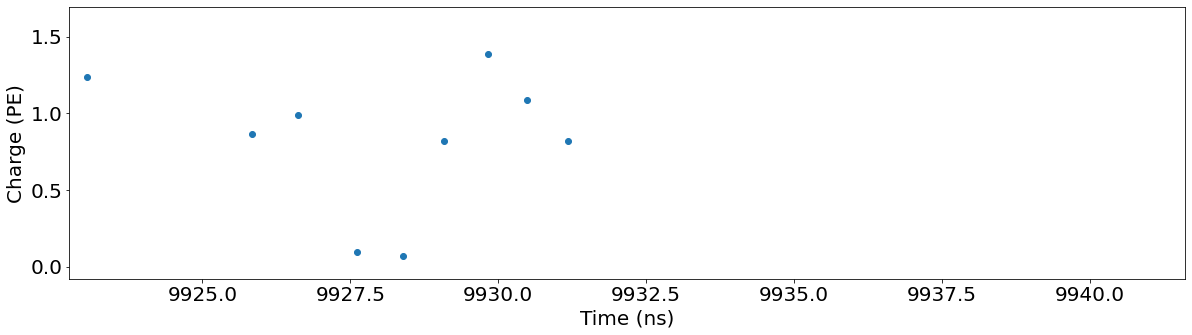

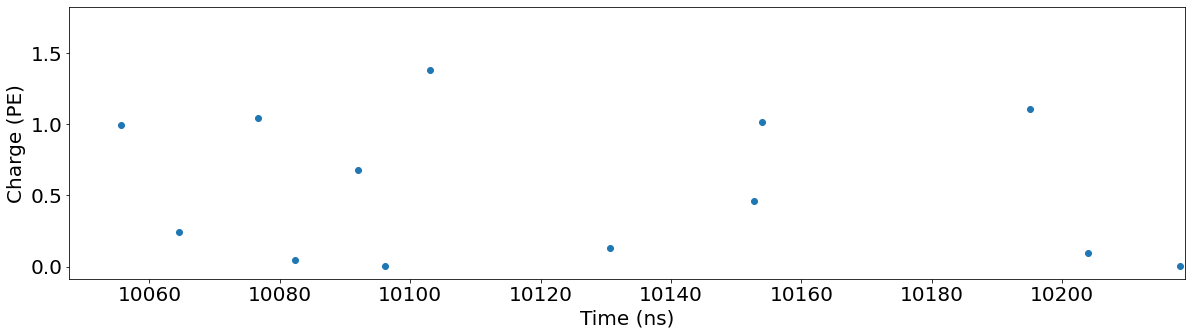

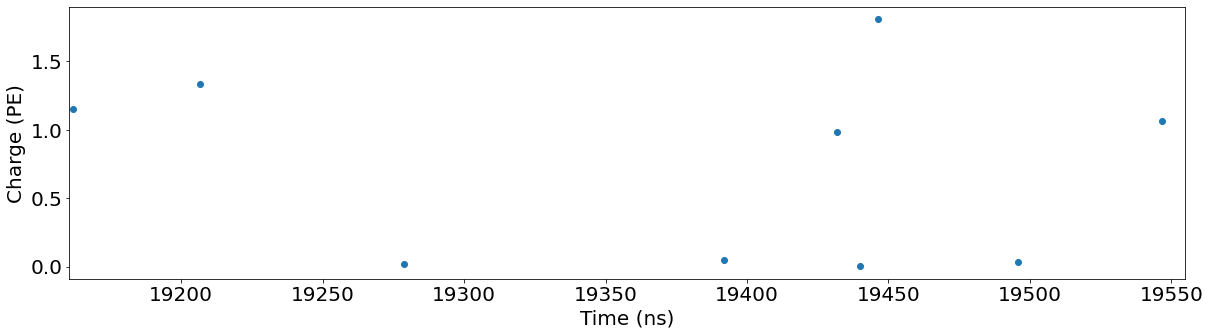

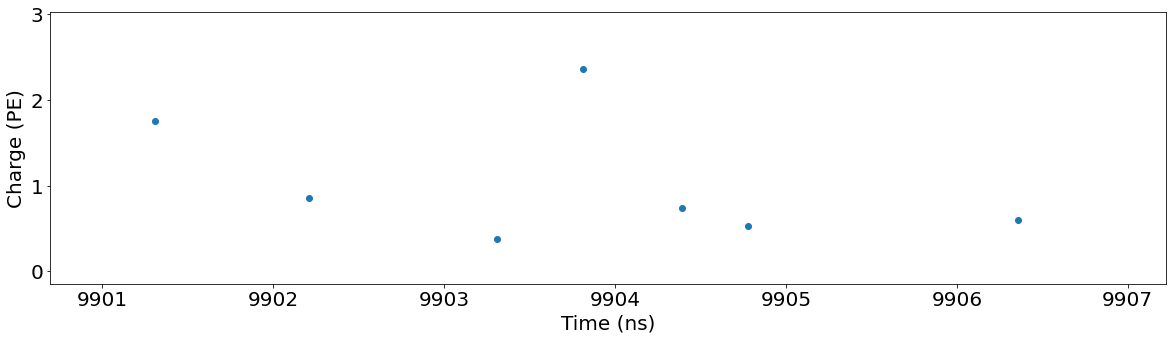

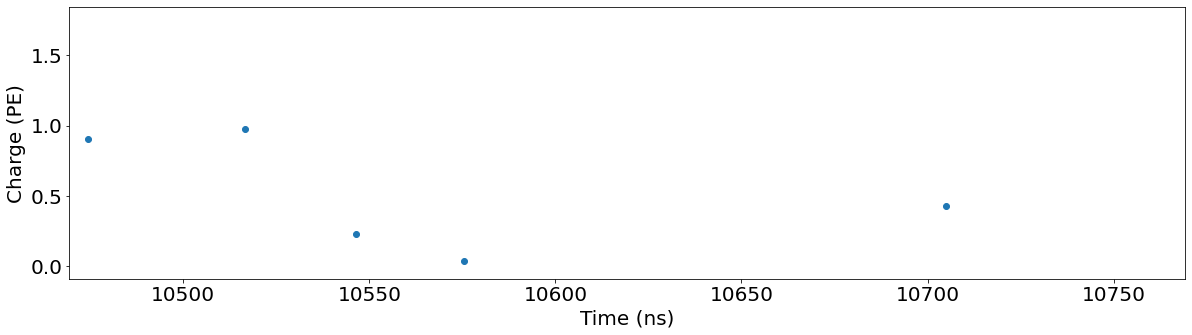

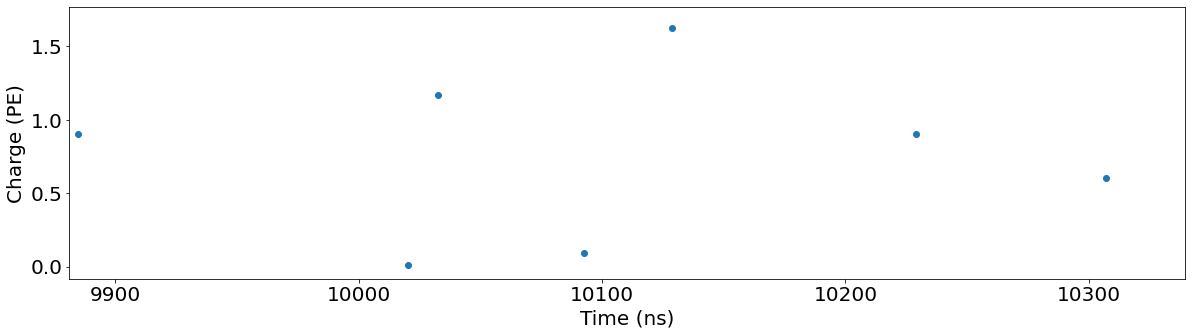

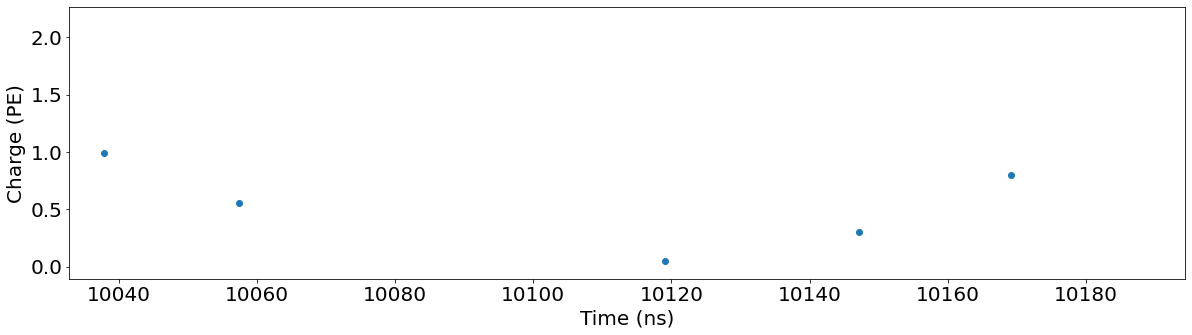

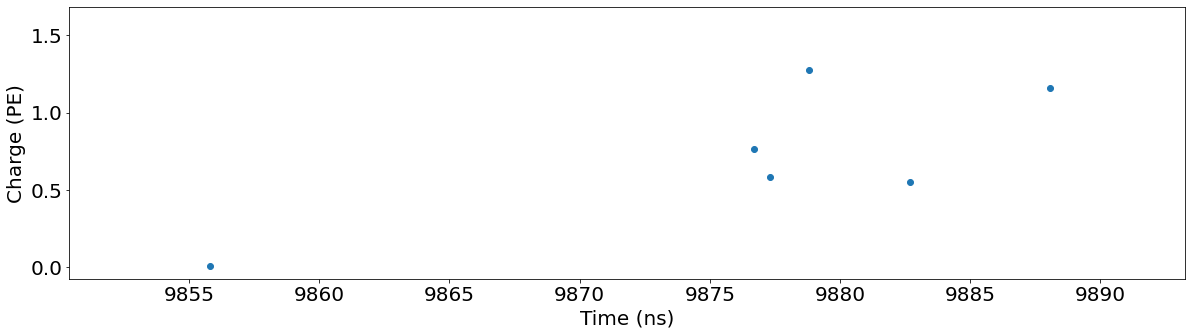

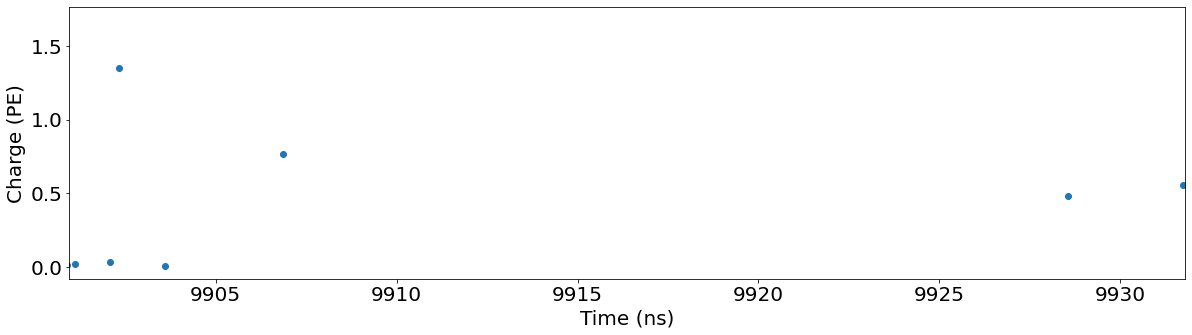

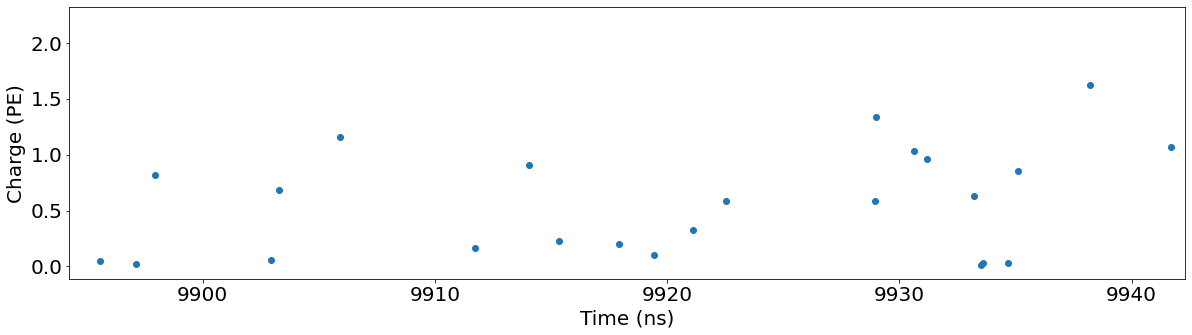

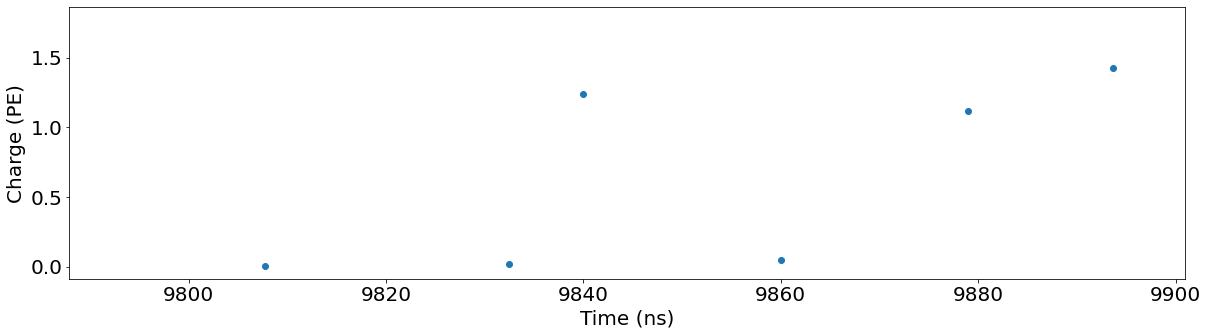

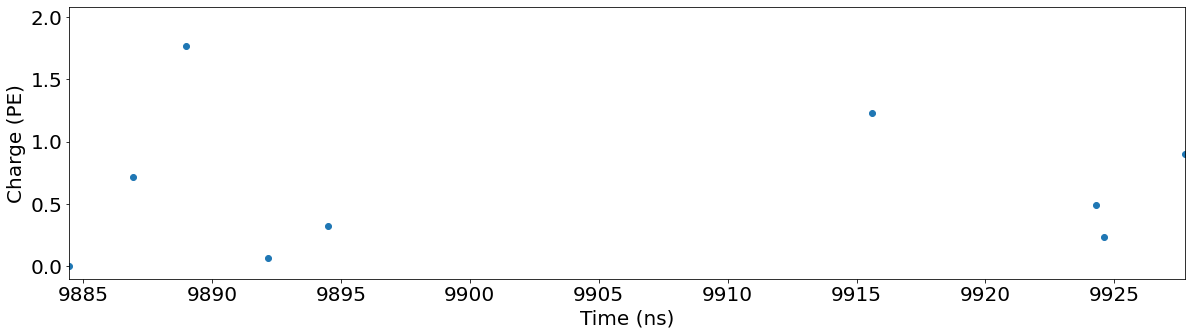

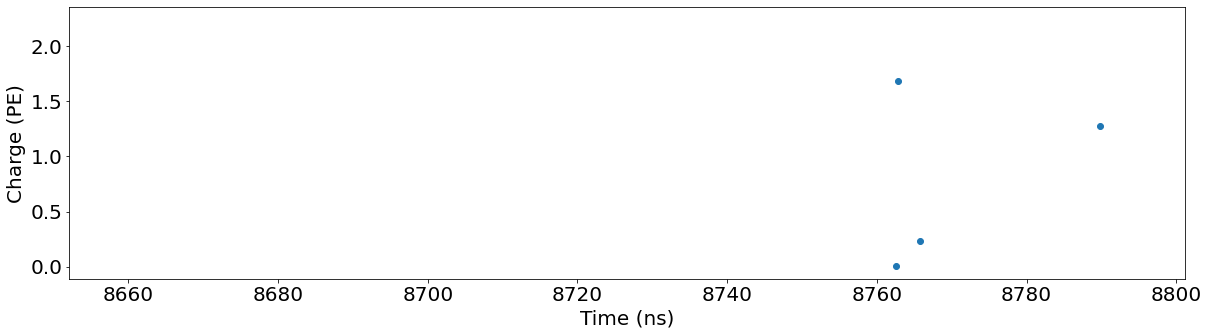

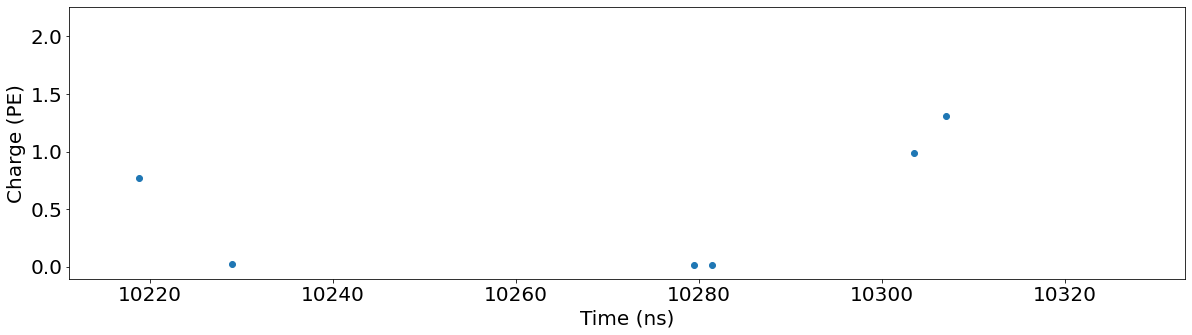

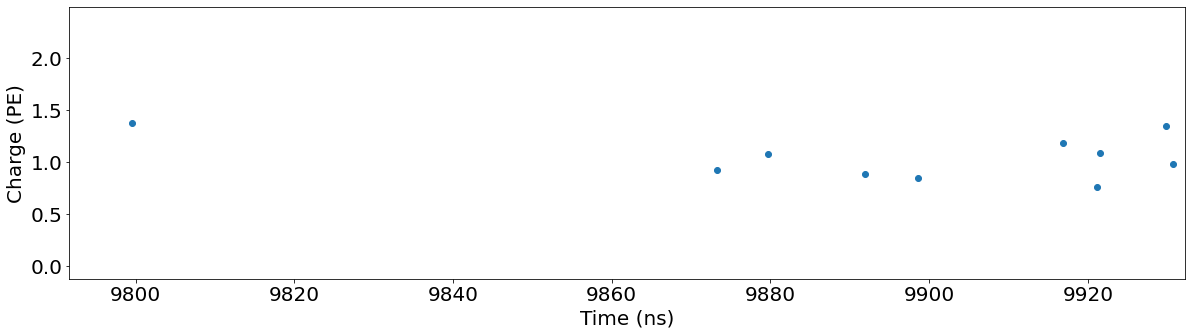

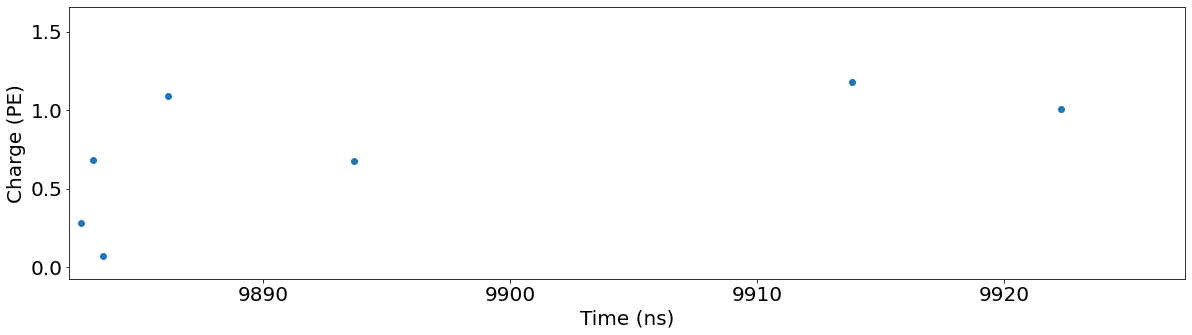

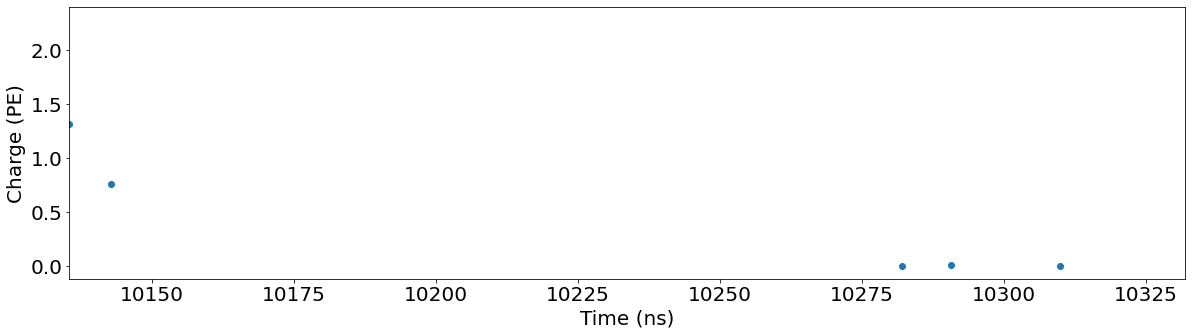

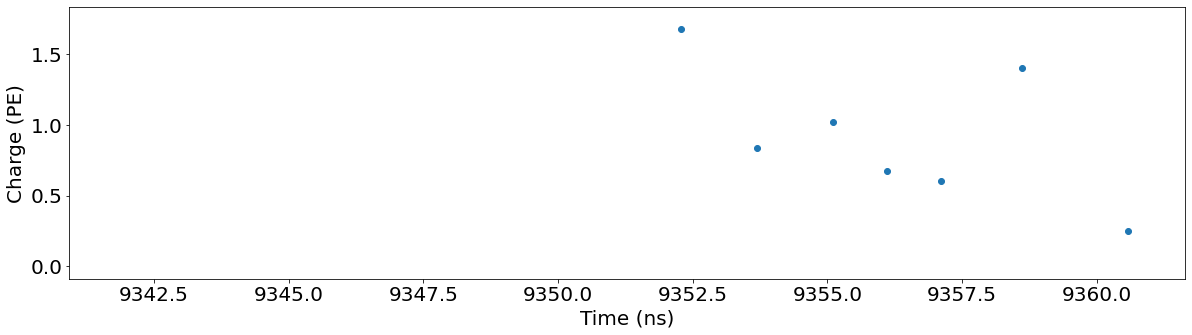

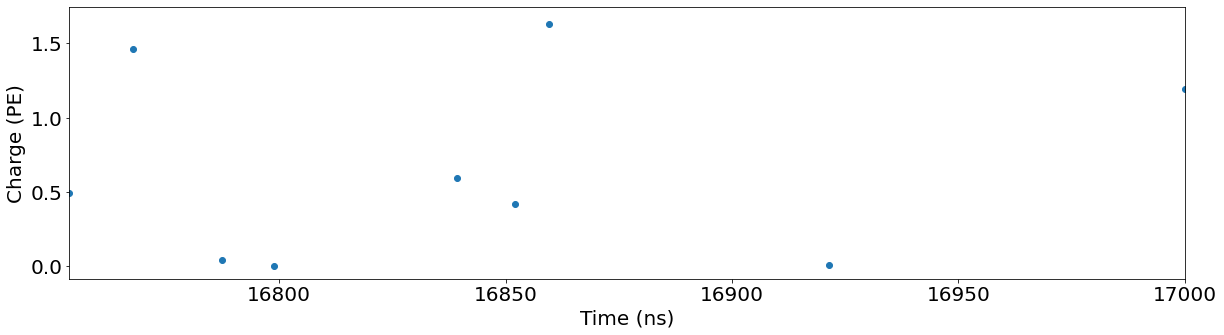

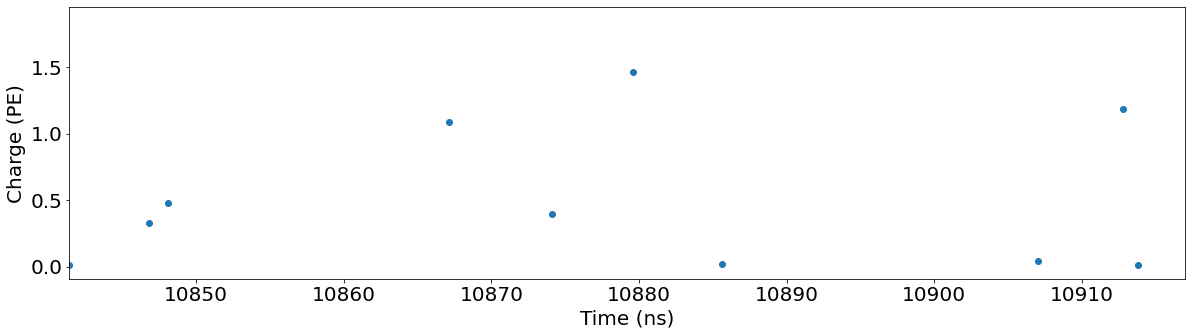

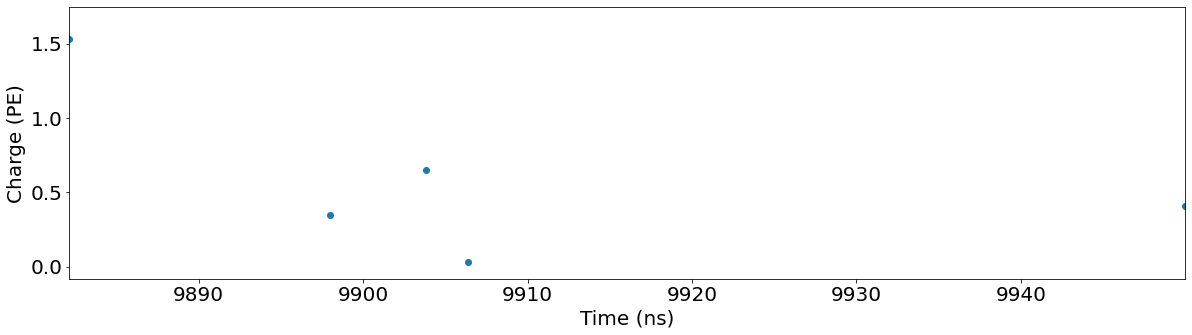

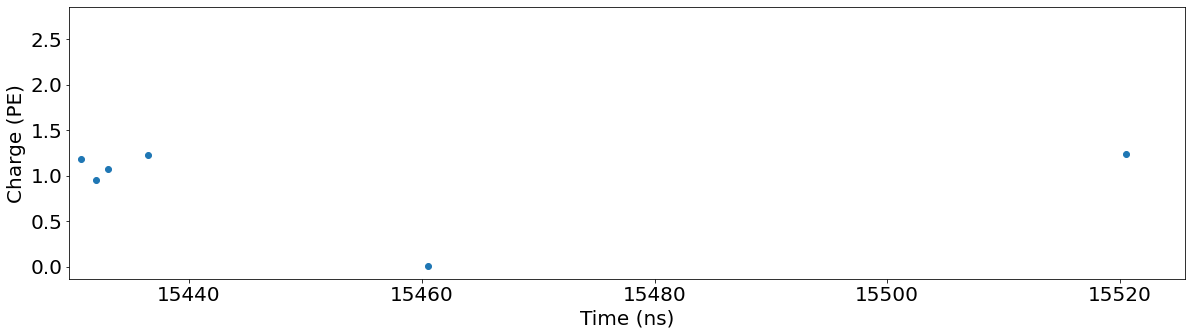

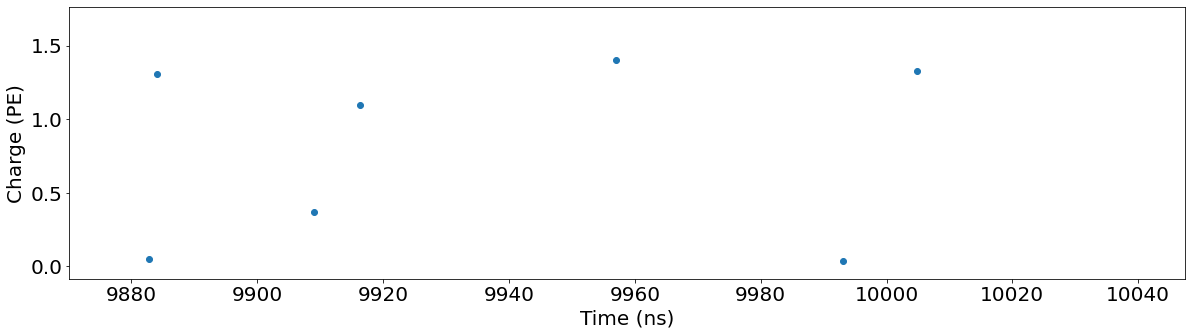

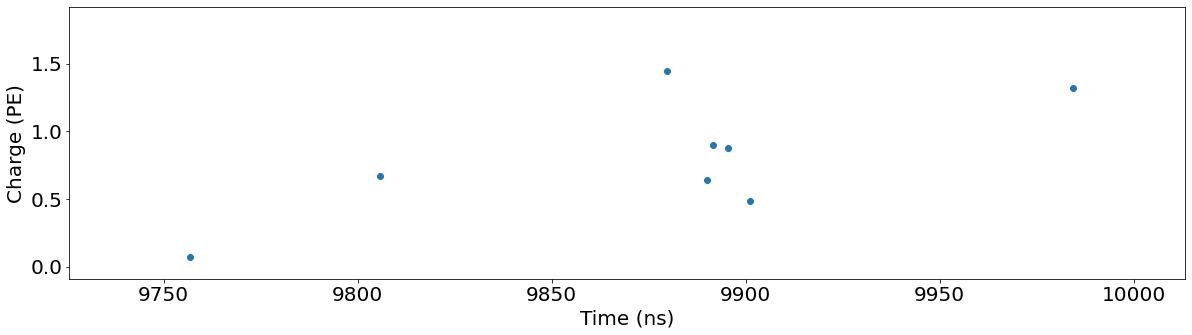

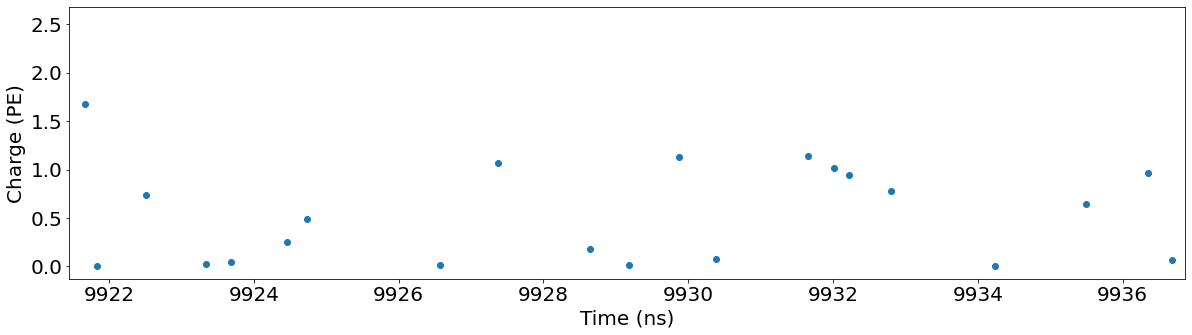

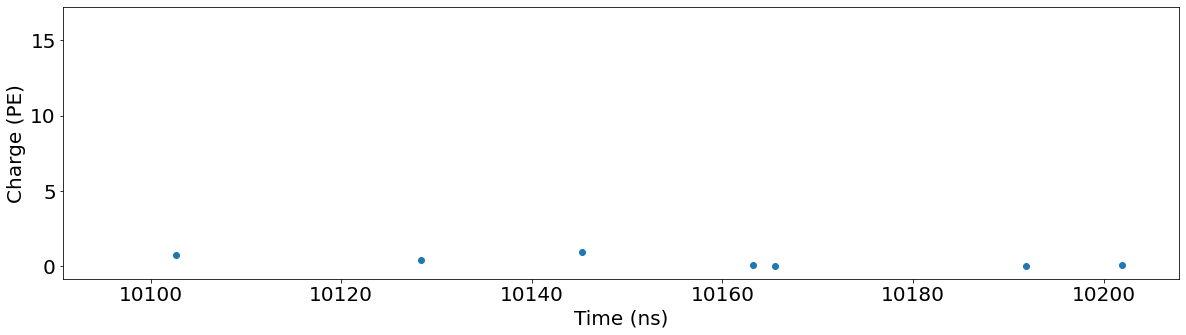

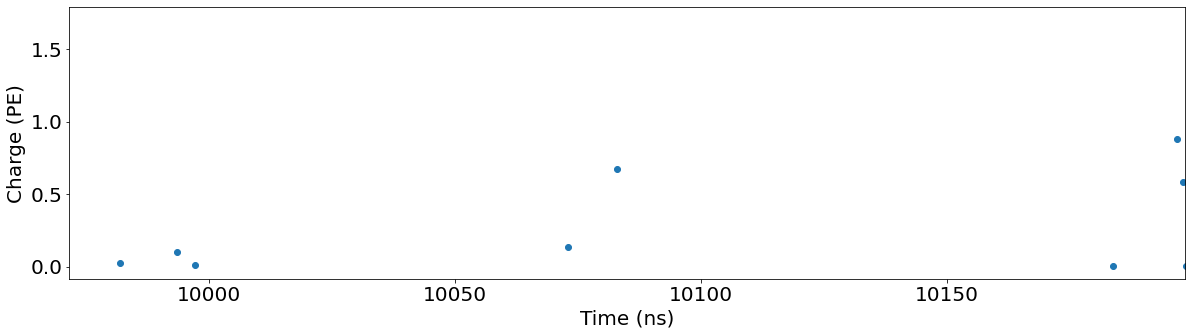

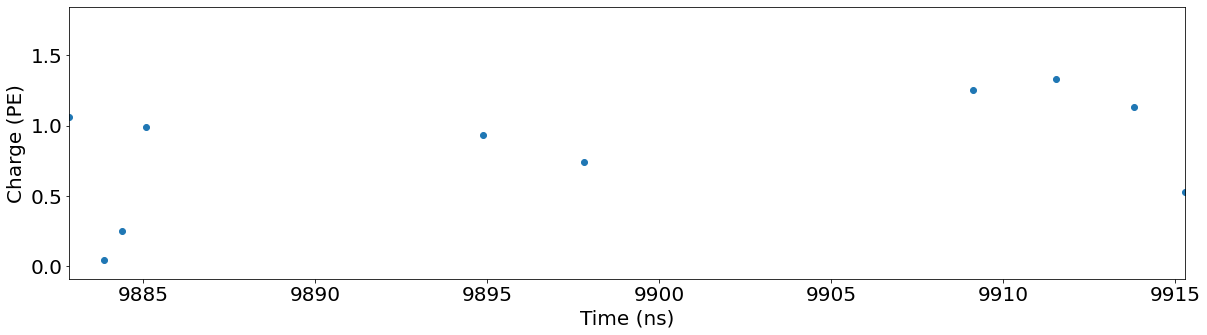

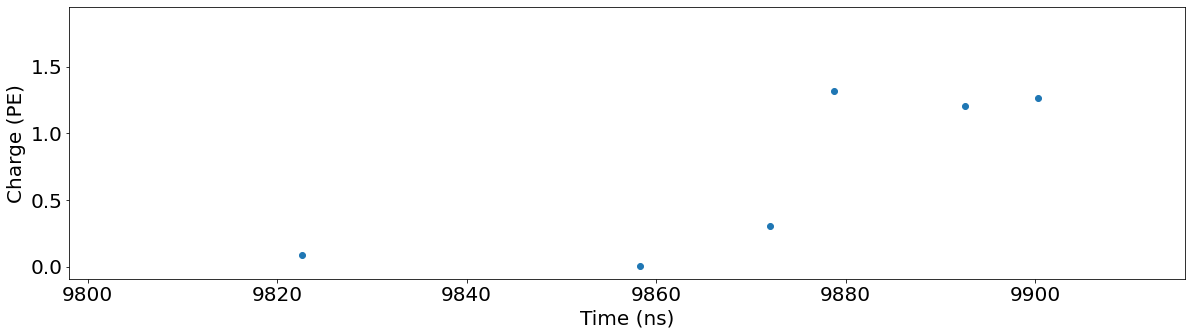

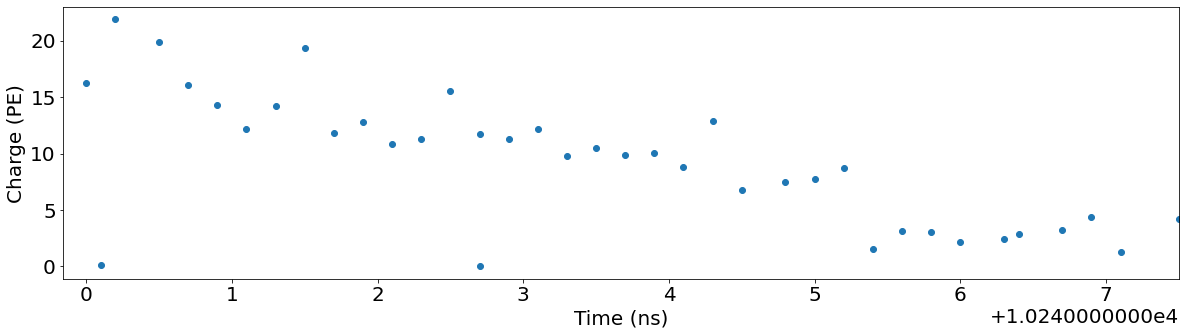

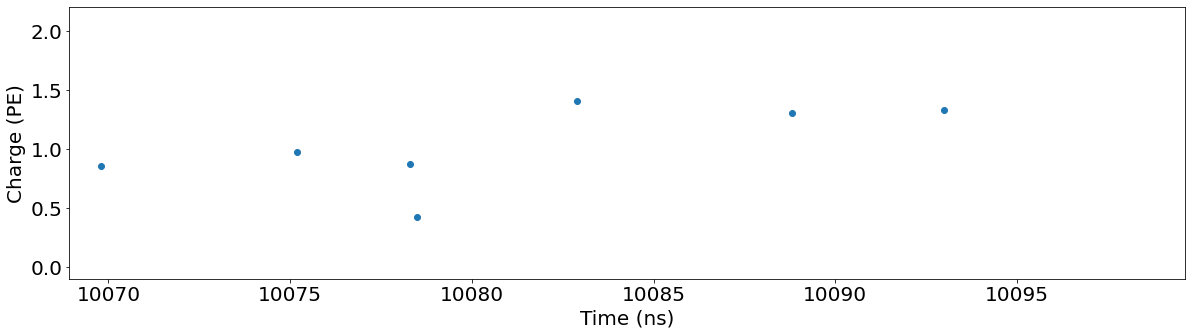

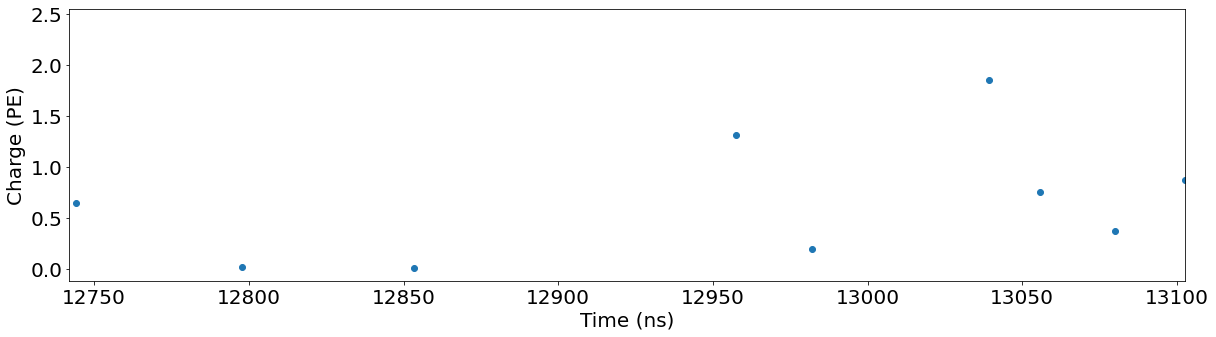

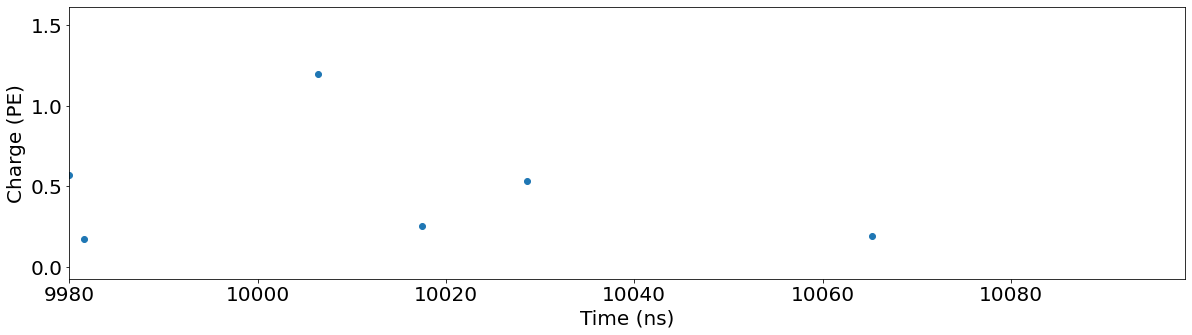

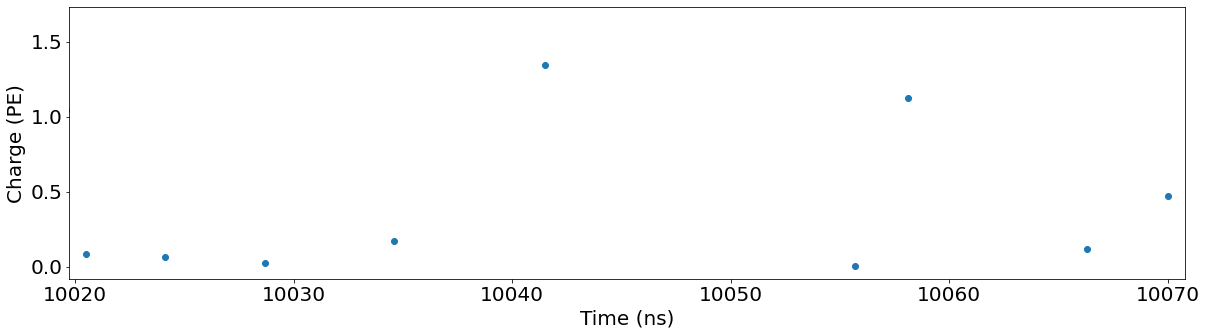

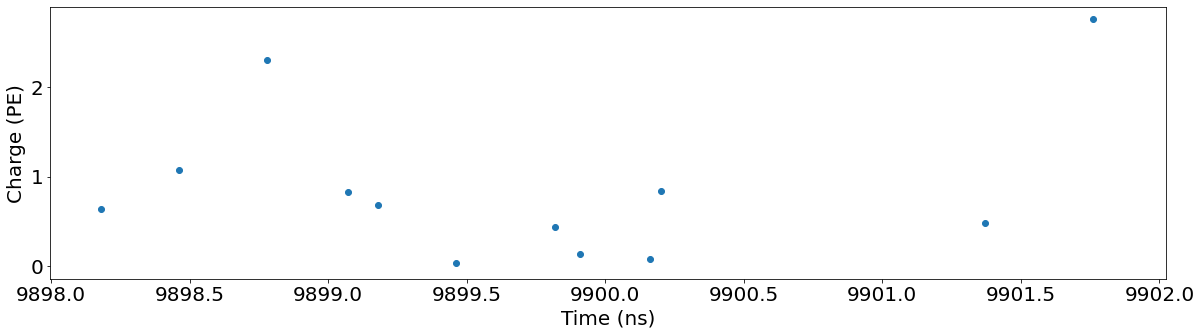

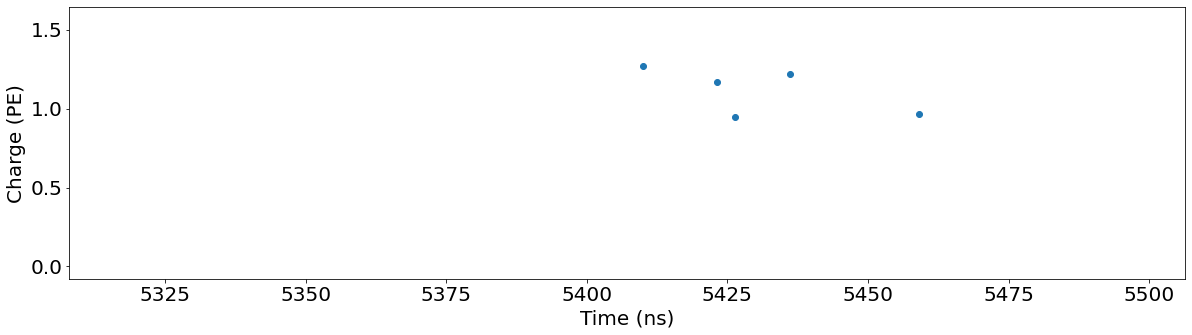

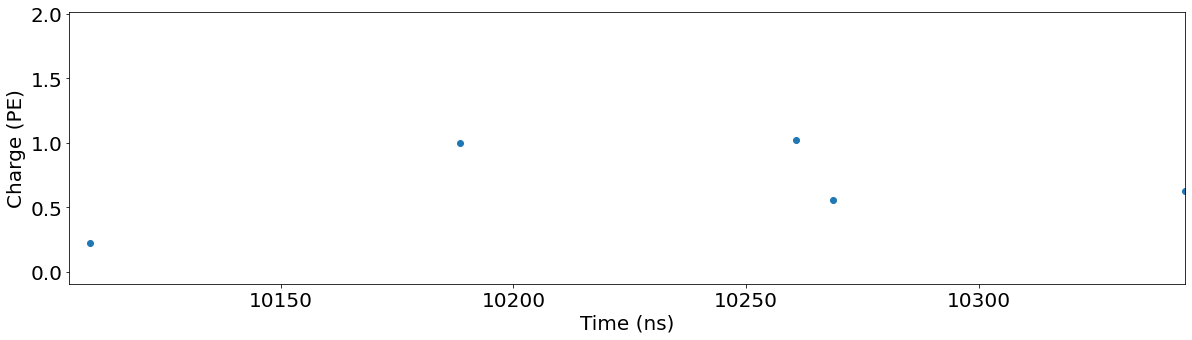

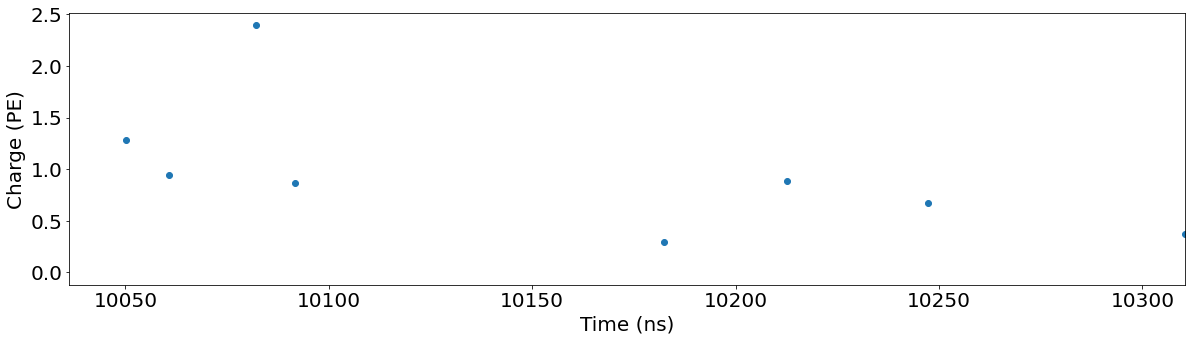

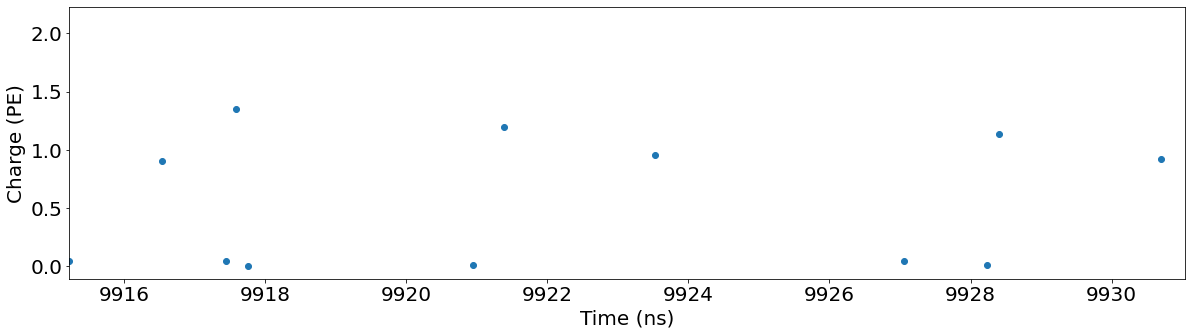

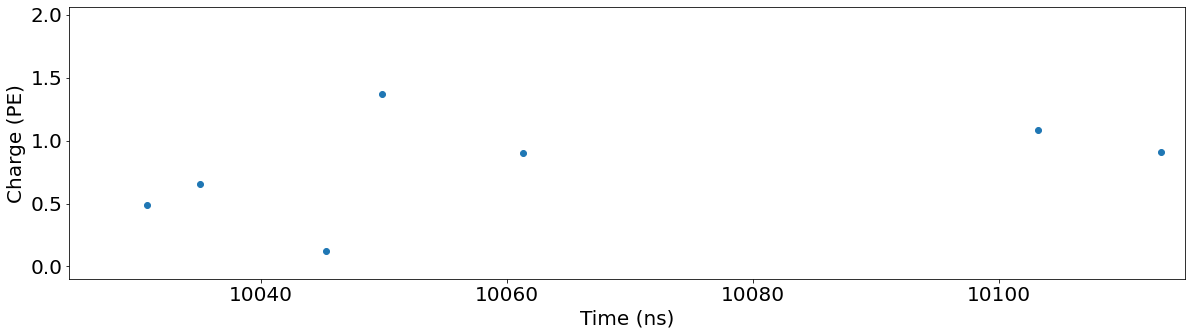

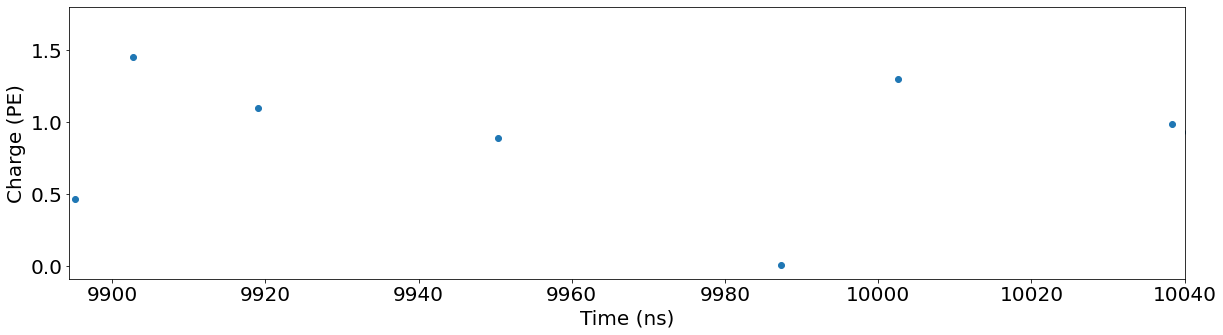

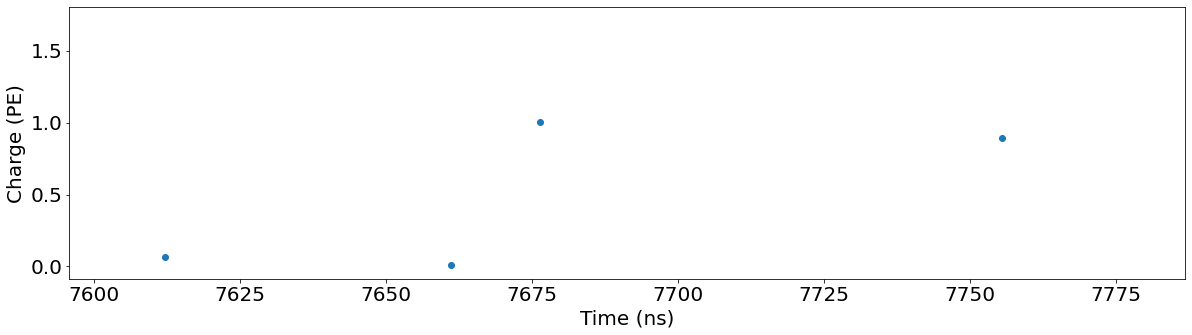

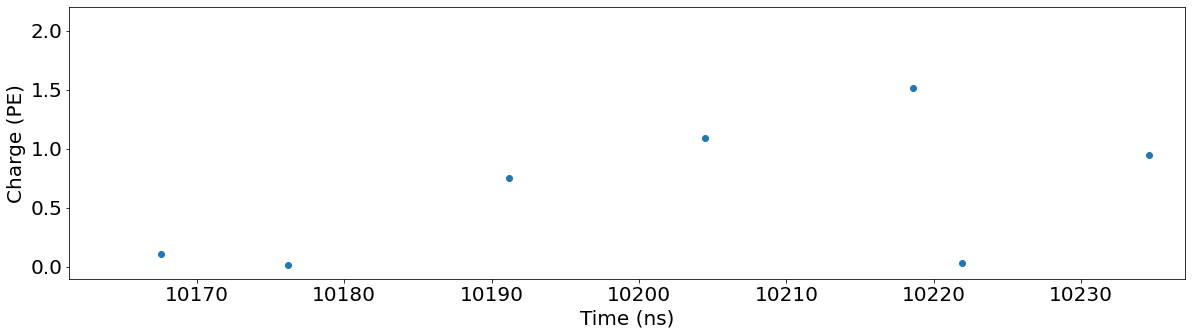

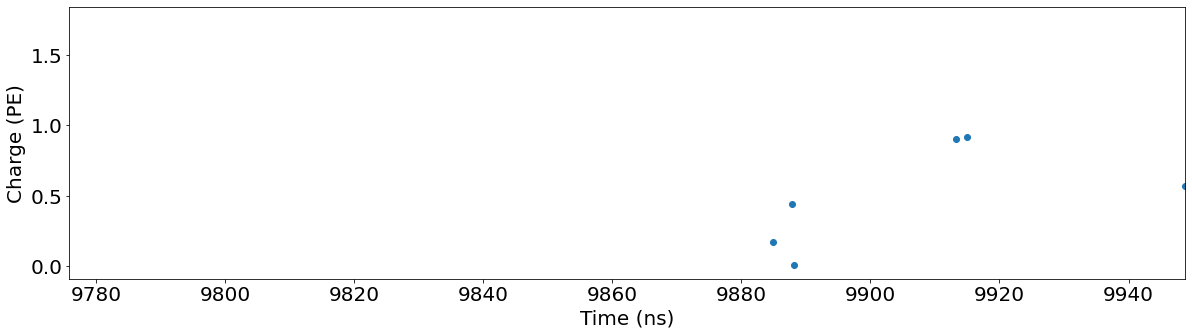

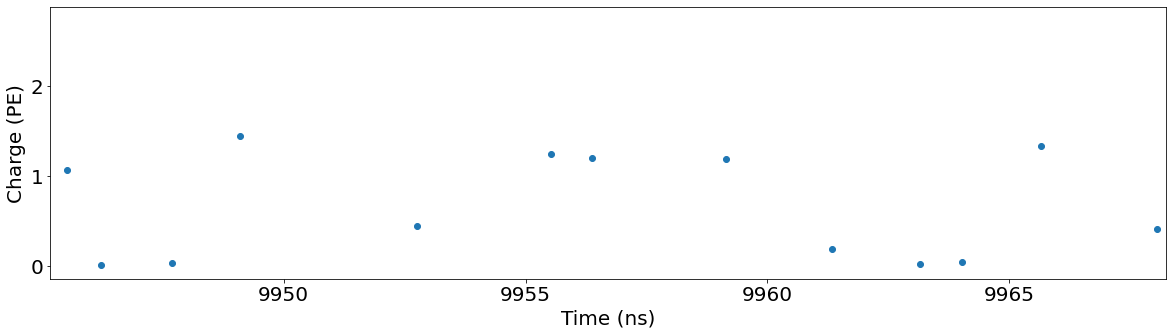

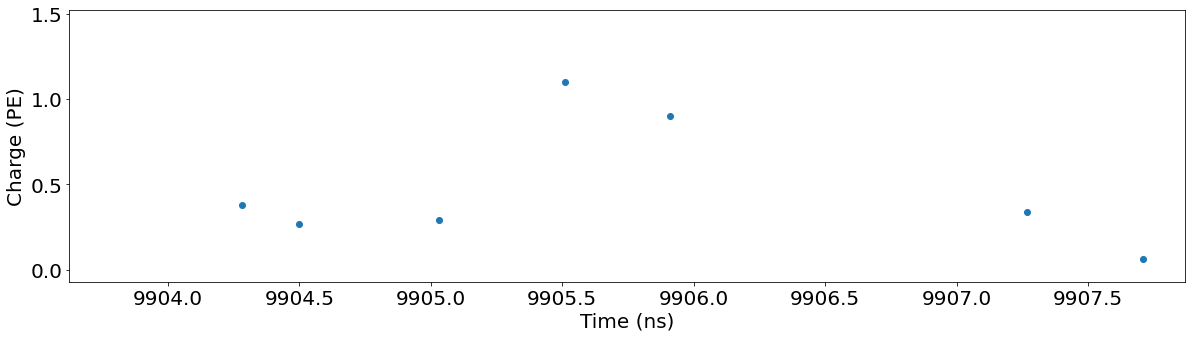

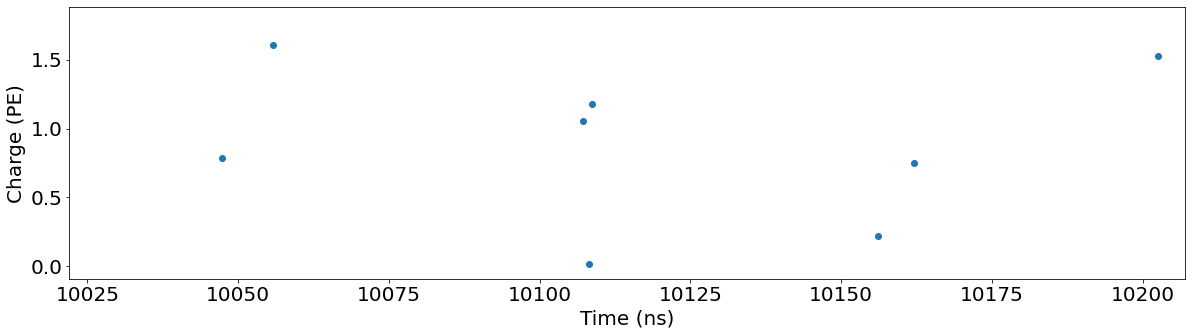

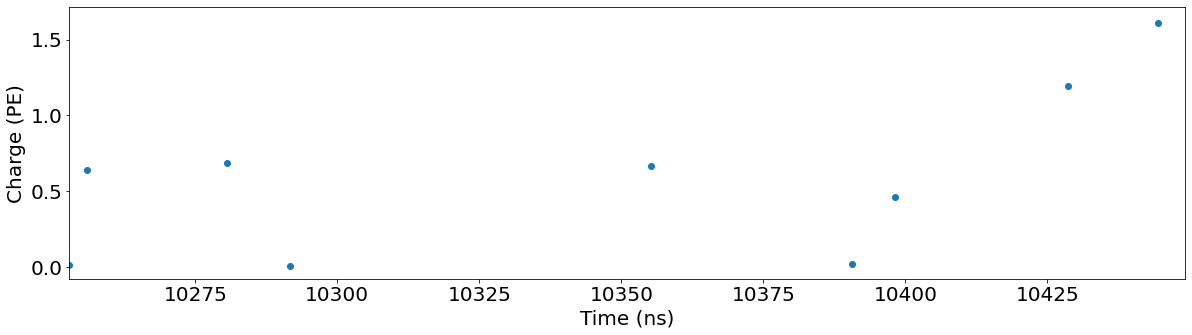

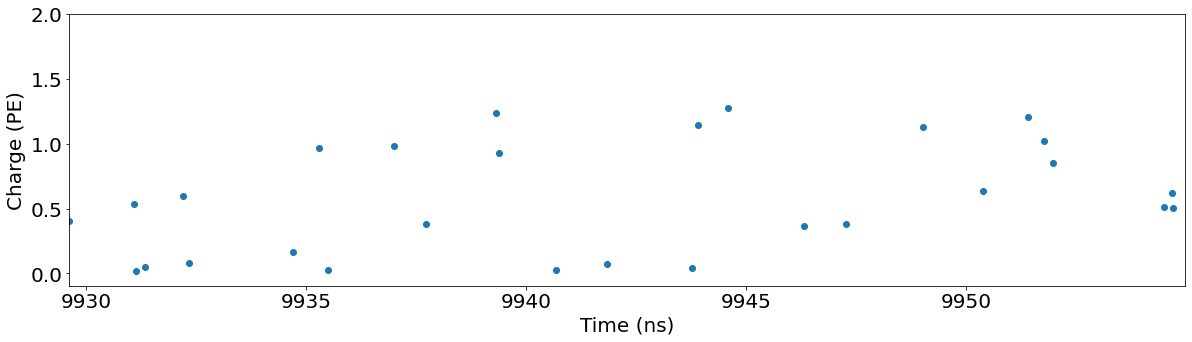

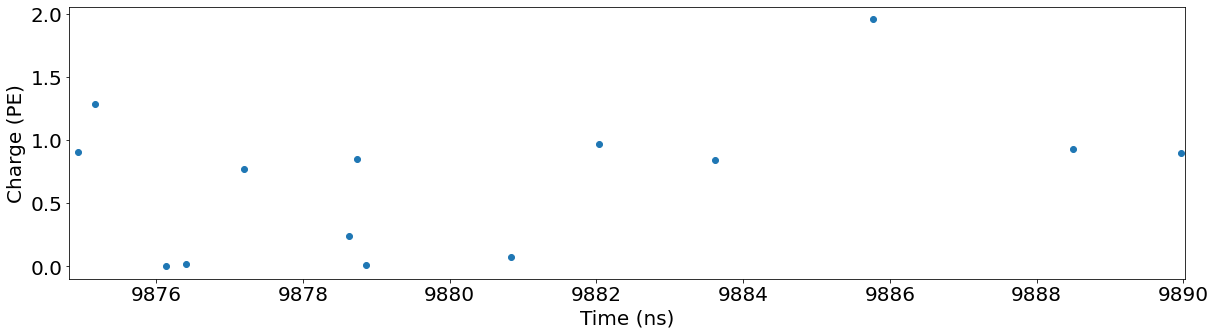

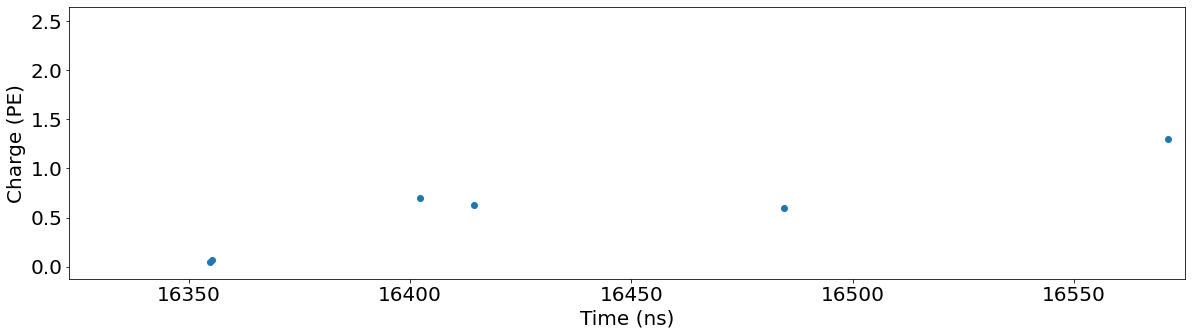

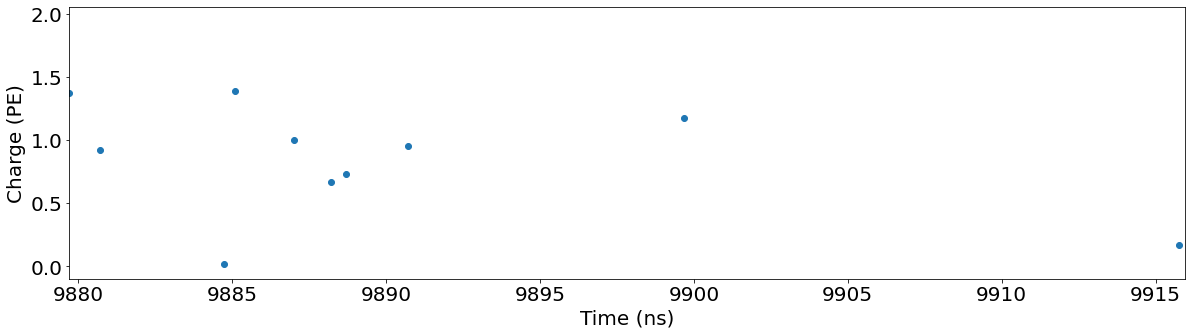

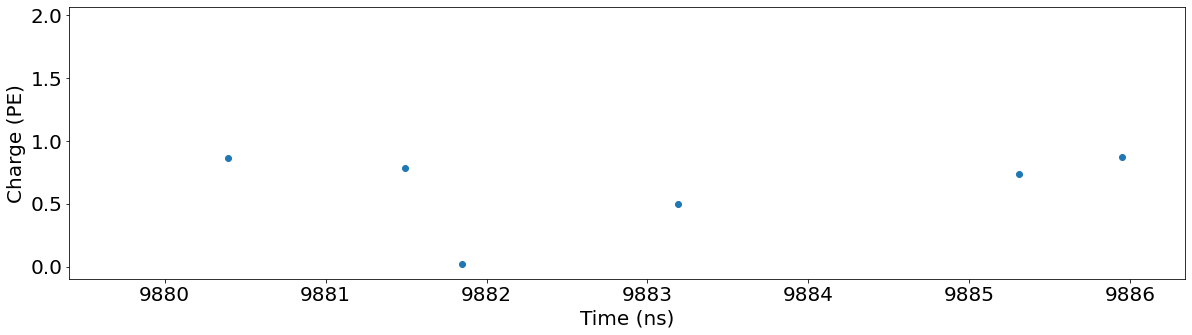

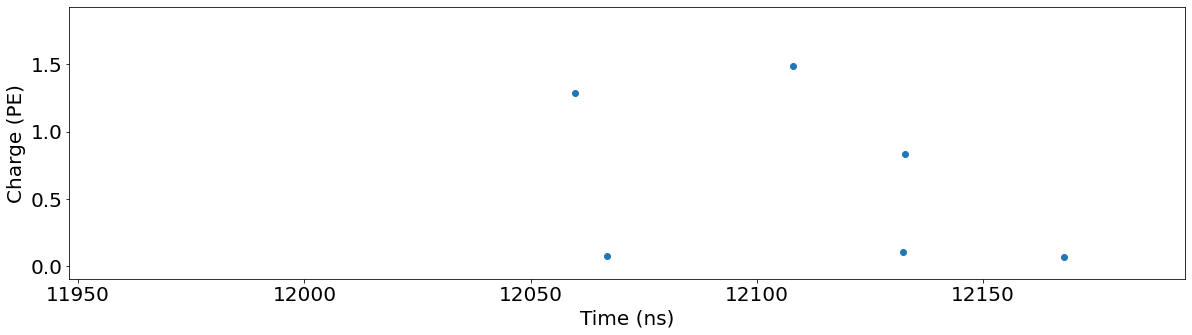

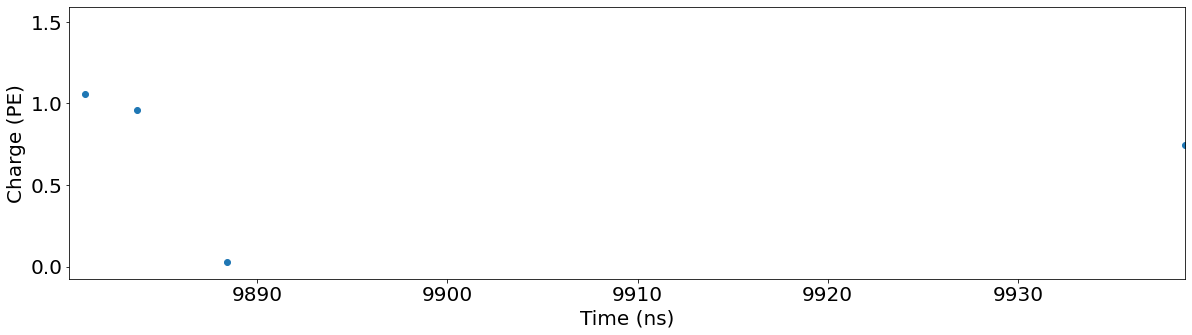

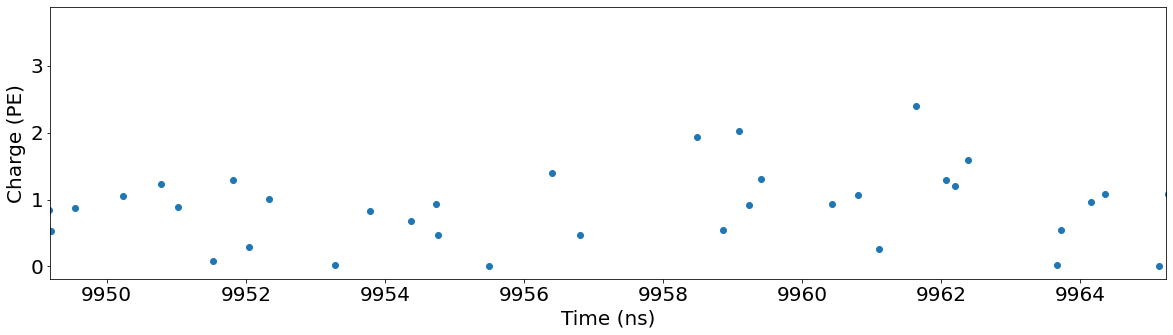

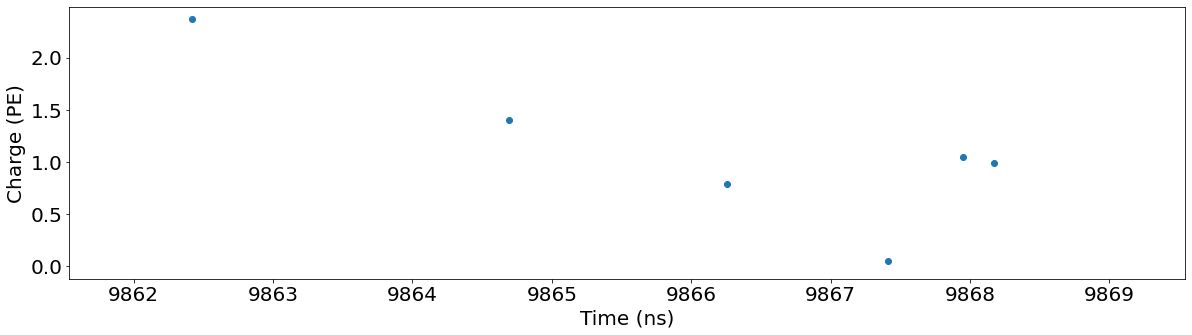

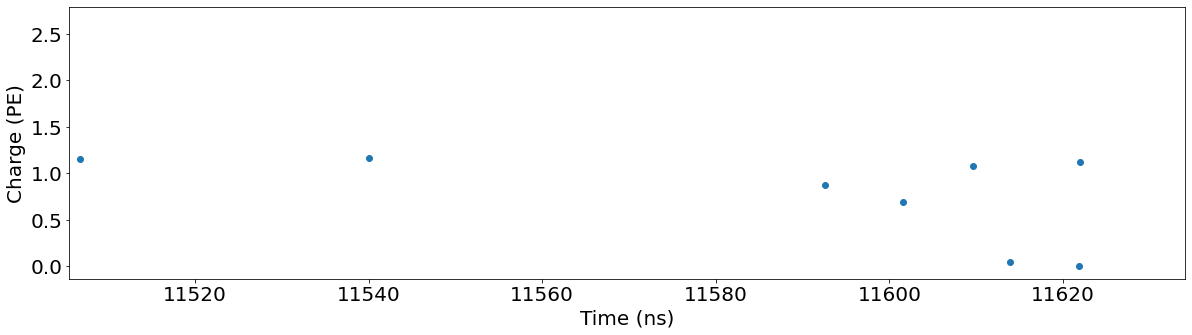

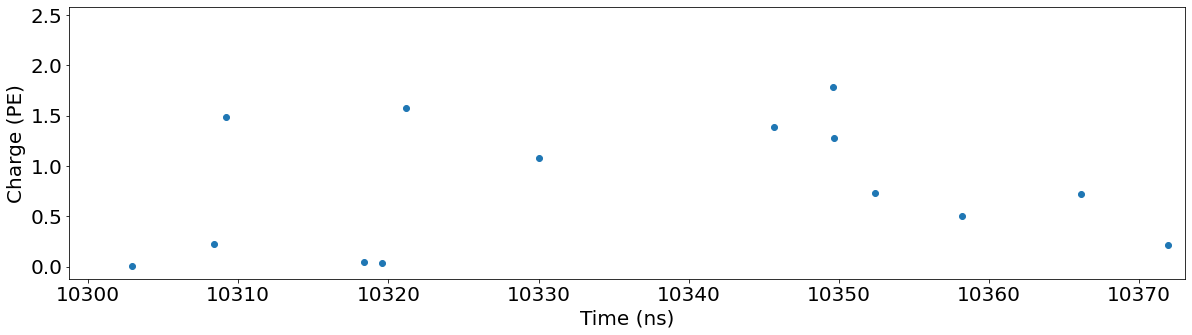

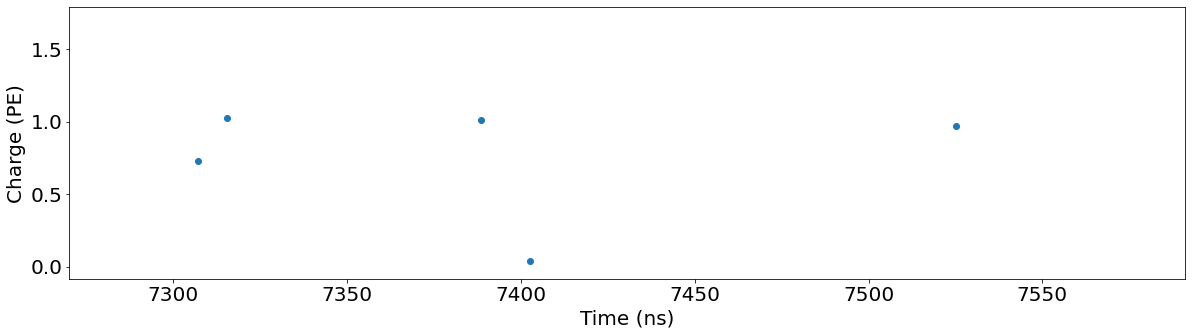

In [290]:
# Waveform

d={}
for i in range(1,99):
    # Loads charge and time
    d["c{0}".format(i)]=np.loadtxt('/home/mandia/transfer_data/txt/txt'+str(i)+'/charge.txt', dtype=float, delimiter=',')
    d["t{0}".format(i)]=np.loadtxt('/home/mandia/transfer_data/txt/txt'+str(i)+'/time.txt', dtype=float, delimiter=',')
    
# Selects time frame (xlim) for double pulse 
    d["weird{0}".format(i)], d["bins{0}".format(i)] = pd.qcut(d["t{0}".format(i)],q=20,retbins=True,)
#         print(d["bins{0}".format(i)])
    d['nbin{0}'.format(i)]=np.array([])
    for x in range(19):
        d['diff{0}'.format(x)] = d["bins{0}".format(i)][x+1:x+2]-d["bins{0}".format(i)][x:x+1]
        d['nbin{0}'.format(i)]=np.append(d['nbin{0}'.format(i)],d['diff{0}'.format(x)])
    d['min{0}'.format(i)]=np.unravel_index(d['nbin{0}'.format(i)].argmin(), d['nbin{0}'.format(i)].shape)

    # Turns index of minimum into an integer
    d['min{0}'.format(i)]=str(d['min{0}'.format(i)]).replace(',','')
    d['min{0}'.format(i)]=str(d['min{0}'.format(i)]).replace('(','')
    d['min{0}'.format(i)]=str(d['min{0}'.format(i)]).replace(')','')
#         print(d['nbin{0}'.format(i)])
#         print(d['nbin{0}'.format(i)][int(d['min{0}'.format(i)]):int(d['min{0}'.format(i)])+1])

    # Makes plot
    fig, ax = plt.subplots(figsize=(20,5))
    ax.scatter(d["t{0}".format(i)],d["c{0}".format(i)])
    ax.set_xlim([d["bins{0}".format(i)][int(d['min{0}'.format(i)]):int(d['min{0}'.format(i)])+1],d["bins{0}".format(i)][int(d['min{0}'.format(i)])+1:int(d['min{0}'.format(i)])+2]])
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('Charge (PE)')
    